# Lecture

In [1]:
import numpy as np

import IPython.display as dp
import matplotlib.pyplot as plt
import seaborn as sns

dp.set_matplotlib_formats("retina")
sns.set(style="whitegrid", font_scale=1.5)
sns.despine()

%matplotlib inline

/var/folders/33/j0cl7y453td68qb96j7bqcj4cf41kc/T/ipykernel_823/4025387531.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  dp.set_matplotlib_formats("retina")


<Figure size 640x480 with 0 Axes>

## Reminder

Suppose that $Z_t$ is a WN with mean zero and variance $\sigma^2_Z$, then:

- $MA(q)$ process is
    $$
    X_t = \beta_0 Z_t + \beta_1 Z_{t-1} + \ldots + \beta_q Z_{t-q},
    $$
    where $\beta$s are constants. Typically, the series is scaled so that $\beta_0 = 1$.

    Using backward shift operator $B^j$ defined as $B^j X_t = X_{t-j}$, as follows:
    $$
    X_t = (\beta_0 + \beta_1 B + \ldots + \beta_q B^q) Z_t = \theta(B) Z_t
    $$
- $MA(q)$ is always stationary, and sometimes **invertible**, when the complex roots of the equation $\theta(x) = 0$ lie outside the unit circles

## ACF and stationarity of MA(1)

Consider $MA(1)$ process with $\beta_0 = 1, \beta_1 = \theta$:
$$
X_t = Z_t + \theta Z_{t-1}
$$

The ACF of $MA(q)$ is given by:
$$
\rho(k) = \begin{cases}
1, & k = 0, \\
\sum\limits_{i=0}^{q-k} \beta_i \beta_{i+k} \big/\sum\limits_{i=0}^{q} \beta_i^2 , & 1 \leqslant k \leqslant q, \\
0, & k > q, \\
\gamma(-k), & k < 0
\end{cases}
$$

The ACF of our $MA(1)$ is then given by:
$$
\rho(k) = \begin{cases}
1, & k = 0, \\
\theta \big/ (1 + \theta^2), & k = \pm 1, \\
0, & \text{else}
\end{cases}
$$

Check ACF for $\tilde{\theta} = \frac1\theta$.

The process expressed with backward shift operator is:
$$
X_t = (\beta_0 + \beta_1 B + \ldots + \beta_q B^q) Z_t = \theta(B) Z_t
$$

Then the polynomial for our $MA(1)$ is:
$$
\theta(B) = 1 + \theta B
$$

Its root is $ - \frac1\theta$, and it lies outside unit circle if $|\theta| < 1$. So $MA(1)$ is invertible if $|\theta| < 1$.

## Reminder

- $AR(p)$ process is
    $$
    X_t = \alpha_1 X_{t-1} + \ldots + \alpha_p X_{t-p} + Z_t
    $$

    Using backward shift operator $B^j$:
    $$
    (1 - \alpha_1 B - \ldots - \alpha_p B^p) X_t = \phi(B) X_t = (1 + \beta_1 B + \beta_2 B^2 + \ldots)^{-1} Z_t = f(B) Z_t
    $$
- $AR(p)$ is not always stationary! There are two ways to verify stationarity:
  1. Verify that ACVF/ACF only depends on $t_2 - t_1$
  2. Verify that the complex roots of $\phi(x) = 0$ lie outside of the unit circle

## ACF and stationarity of AR(1)

Consider $AR(1)$ process:
$$
X_t = \alpha X_{t-1} + Z_t
$$

With backward shift operator, we get
$$
Z_t = (1 - \alpha B) X_t
$$
or
$$
X_t = (1 - \alpha B)^{-1} Z_t = (1 + \alpha B + \alpha^2 B + \ldots) Z_t
$$

From this representation:
$$
\begin{aligned}
\mathbb{E}[X_t] & = 0, \\
\operatorname{Var}(X_t) & = \sigma^2_Z (1 + \alpha^2 + \alpha^4 + \ldots) = \sigma^2_Z / (1 - \alpha^2)
\end{aligned}
$$

ACVF is given by:
$$
\gamma(k) = \mathbb{E}[X_t X_{t+k}] = \mathbb{E}\left[ \left( \sum_{i=0}^\infty \alpha^i Z_{t-i} \right) \left( \sum_{j=0}^\infty \alpha^j Z_{t+k-j} \right) \right] = \sigma^2_Z \sum_{i=0}^\infty \alpha^i \alpha^{k+i} = \sigma^2_Z \alpha^k \sum_{i=0}^\infty \alpha^{2i} = \sigma^2_Z \alpha^k \big/ (1 - \alpha^2) = \alpha^k \sigma^2_X
$$

ACF is then given by
$$
\rho(k) = \gamma(k) / \sigma^2_X = \alpha^k
$$

The process is stationary provided that $|\alpha| < 1$.

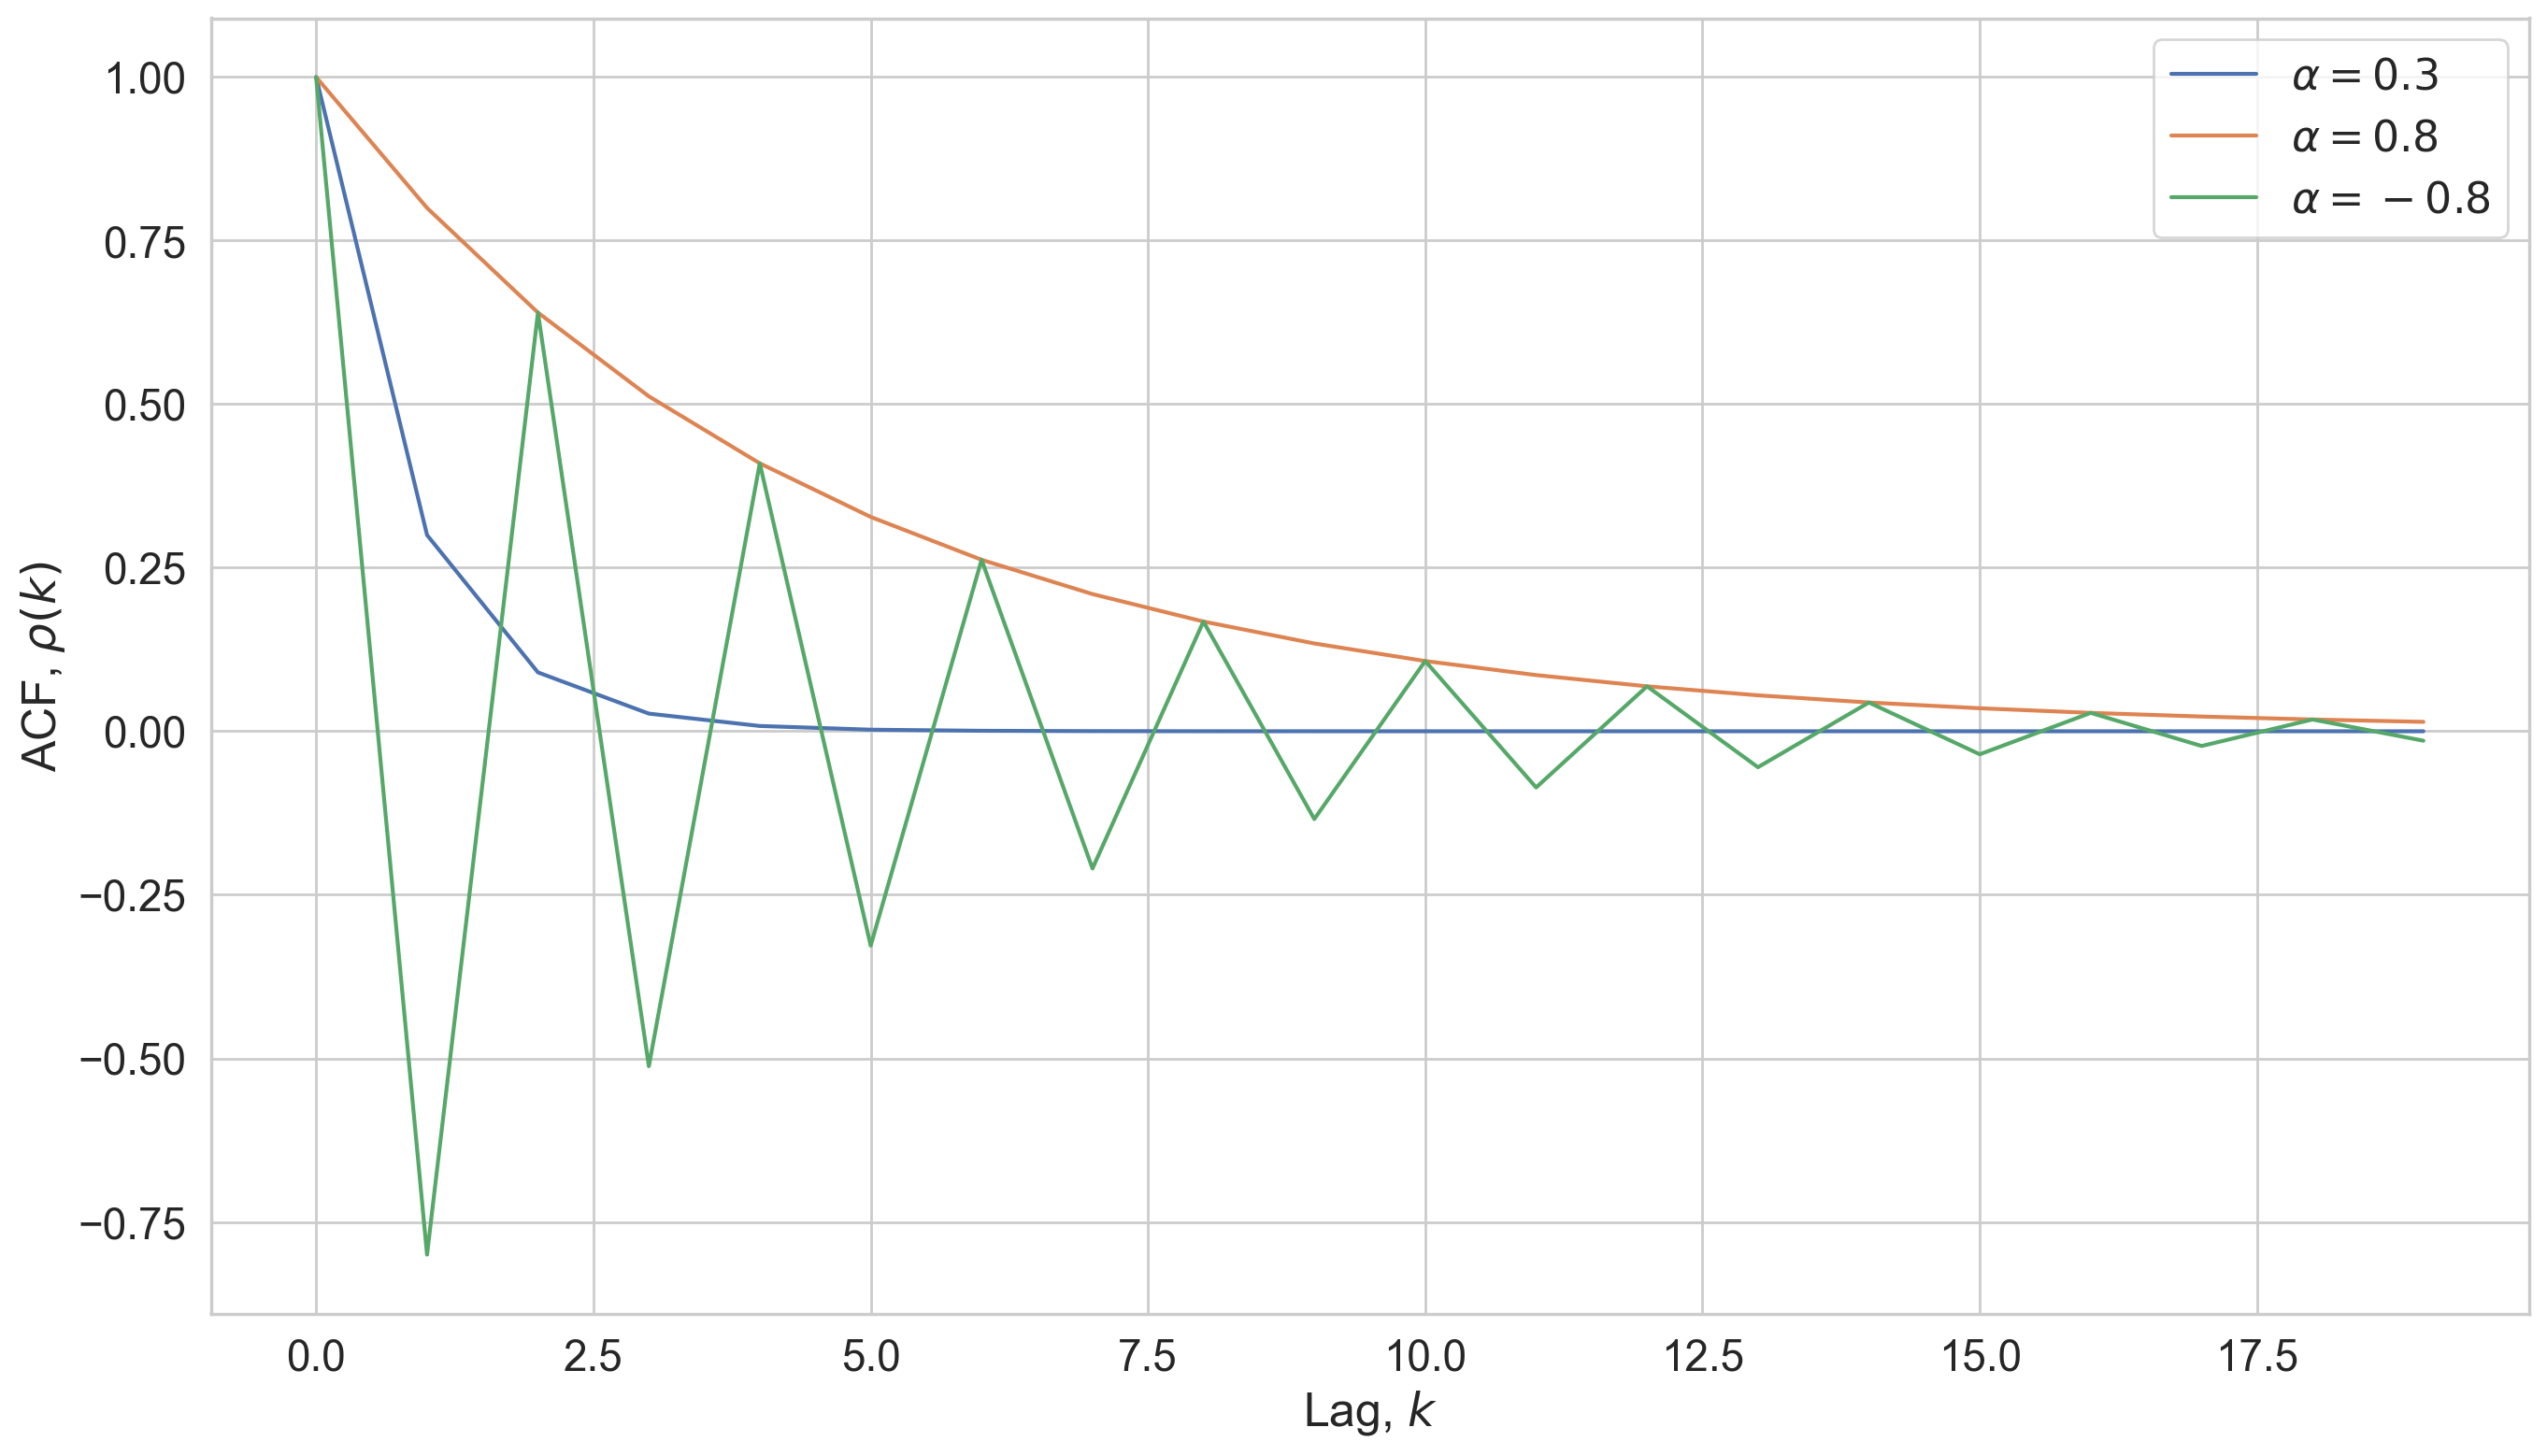

In [2]:
kk = np.arange(20)
acf_ar_1_03 = 0.3 ** kk
acf_ar_1_08 = 0.8 ** kk
acf_ar_1_m08 = (- 0.8) ** kk
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(kk, acf_ar_1_03, label="$\\alpha = 0.3$")
ax.plot(kk, acf_ar_1_08, label="$\\alpha = 0.8$")
ax.plot(kk, acf_ar_1_m08, label="$\\alpha = - 0.8$")
ax.set_xlabel("Lag, $k$")
ax.set_ylabel("ACF, $\\rho(k)$")
ax.legend();

## ACF and stationarity of AR(2)

Consider $AR(2)$ process
$$
X_t = \alpha_1 X_{t-1} + \alpha_2 X_{t-2} + Z_t
$$

With backward shift operator, we get
$$
Z_t = (1 - \alpha B - \alpha^2 B^2) X_t
$$

As discussed last time, the ACF can be found from Yule-Walker equations
$$
\rho(k) = \alpha_1 \rho(k-1) + \ldots + \alpha_p \rho(k-p)
$$
for which the general solution is
$$
\rho(k) = A_1 \pi_1^{|k|} + \ldots + A_p \pi_p^{|k|}
$$
where $\pi_i$ are the roots of the so-called auxiliary equation
$$
y^p - \alpha_1 y^{p-1} - \ldots - \alpha_p = 0
$$

In case of $AR(2)$, the auxiliary equation writes
$$
y^2 - \alpha_1 y - \alpha_2 = 0
$$

So we get stationarity if
$$
\left| \frac{\alpha_1 \pm \sqrt{\alpha_1^2 + 4 \alpha_2}}{2} \right| < 1 \Leftrightarrow \begin{cases}
\alpha_1 + \alpha_2 & < 1, \\
\alpha_1 - \alpha_2 & > -1, \\
\alpha_2 & > -1
\end{cases}
$$

If the discriminant is positive, thes roots are real, and the ACF behaves like exponential decay. If discriminant is negative, the roots are complex, and ACF behaves like damped sinusoid.

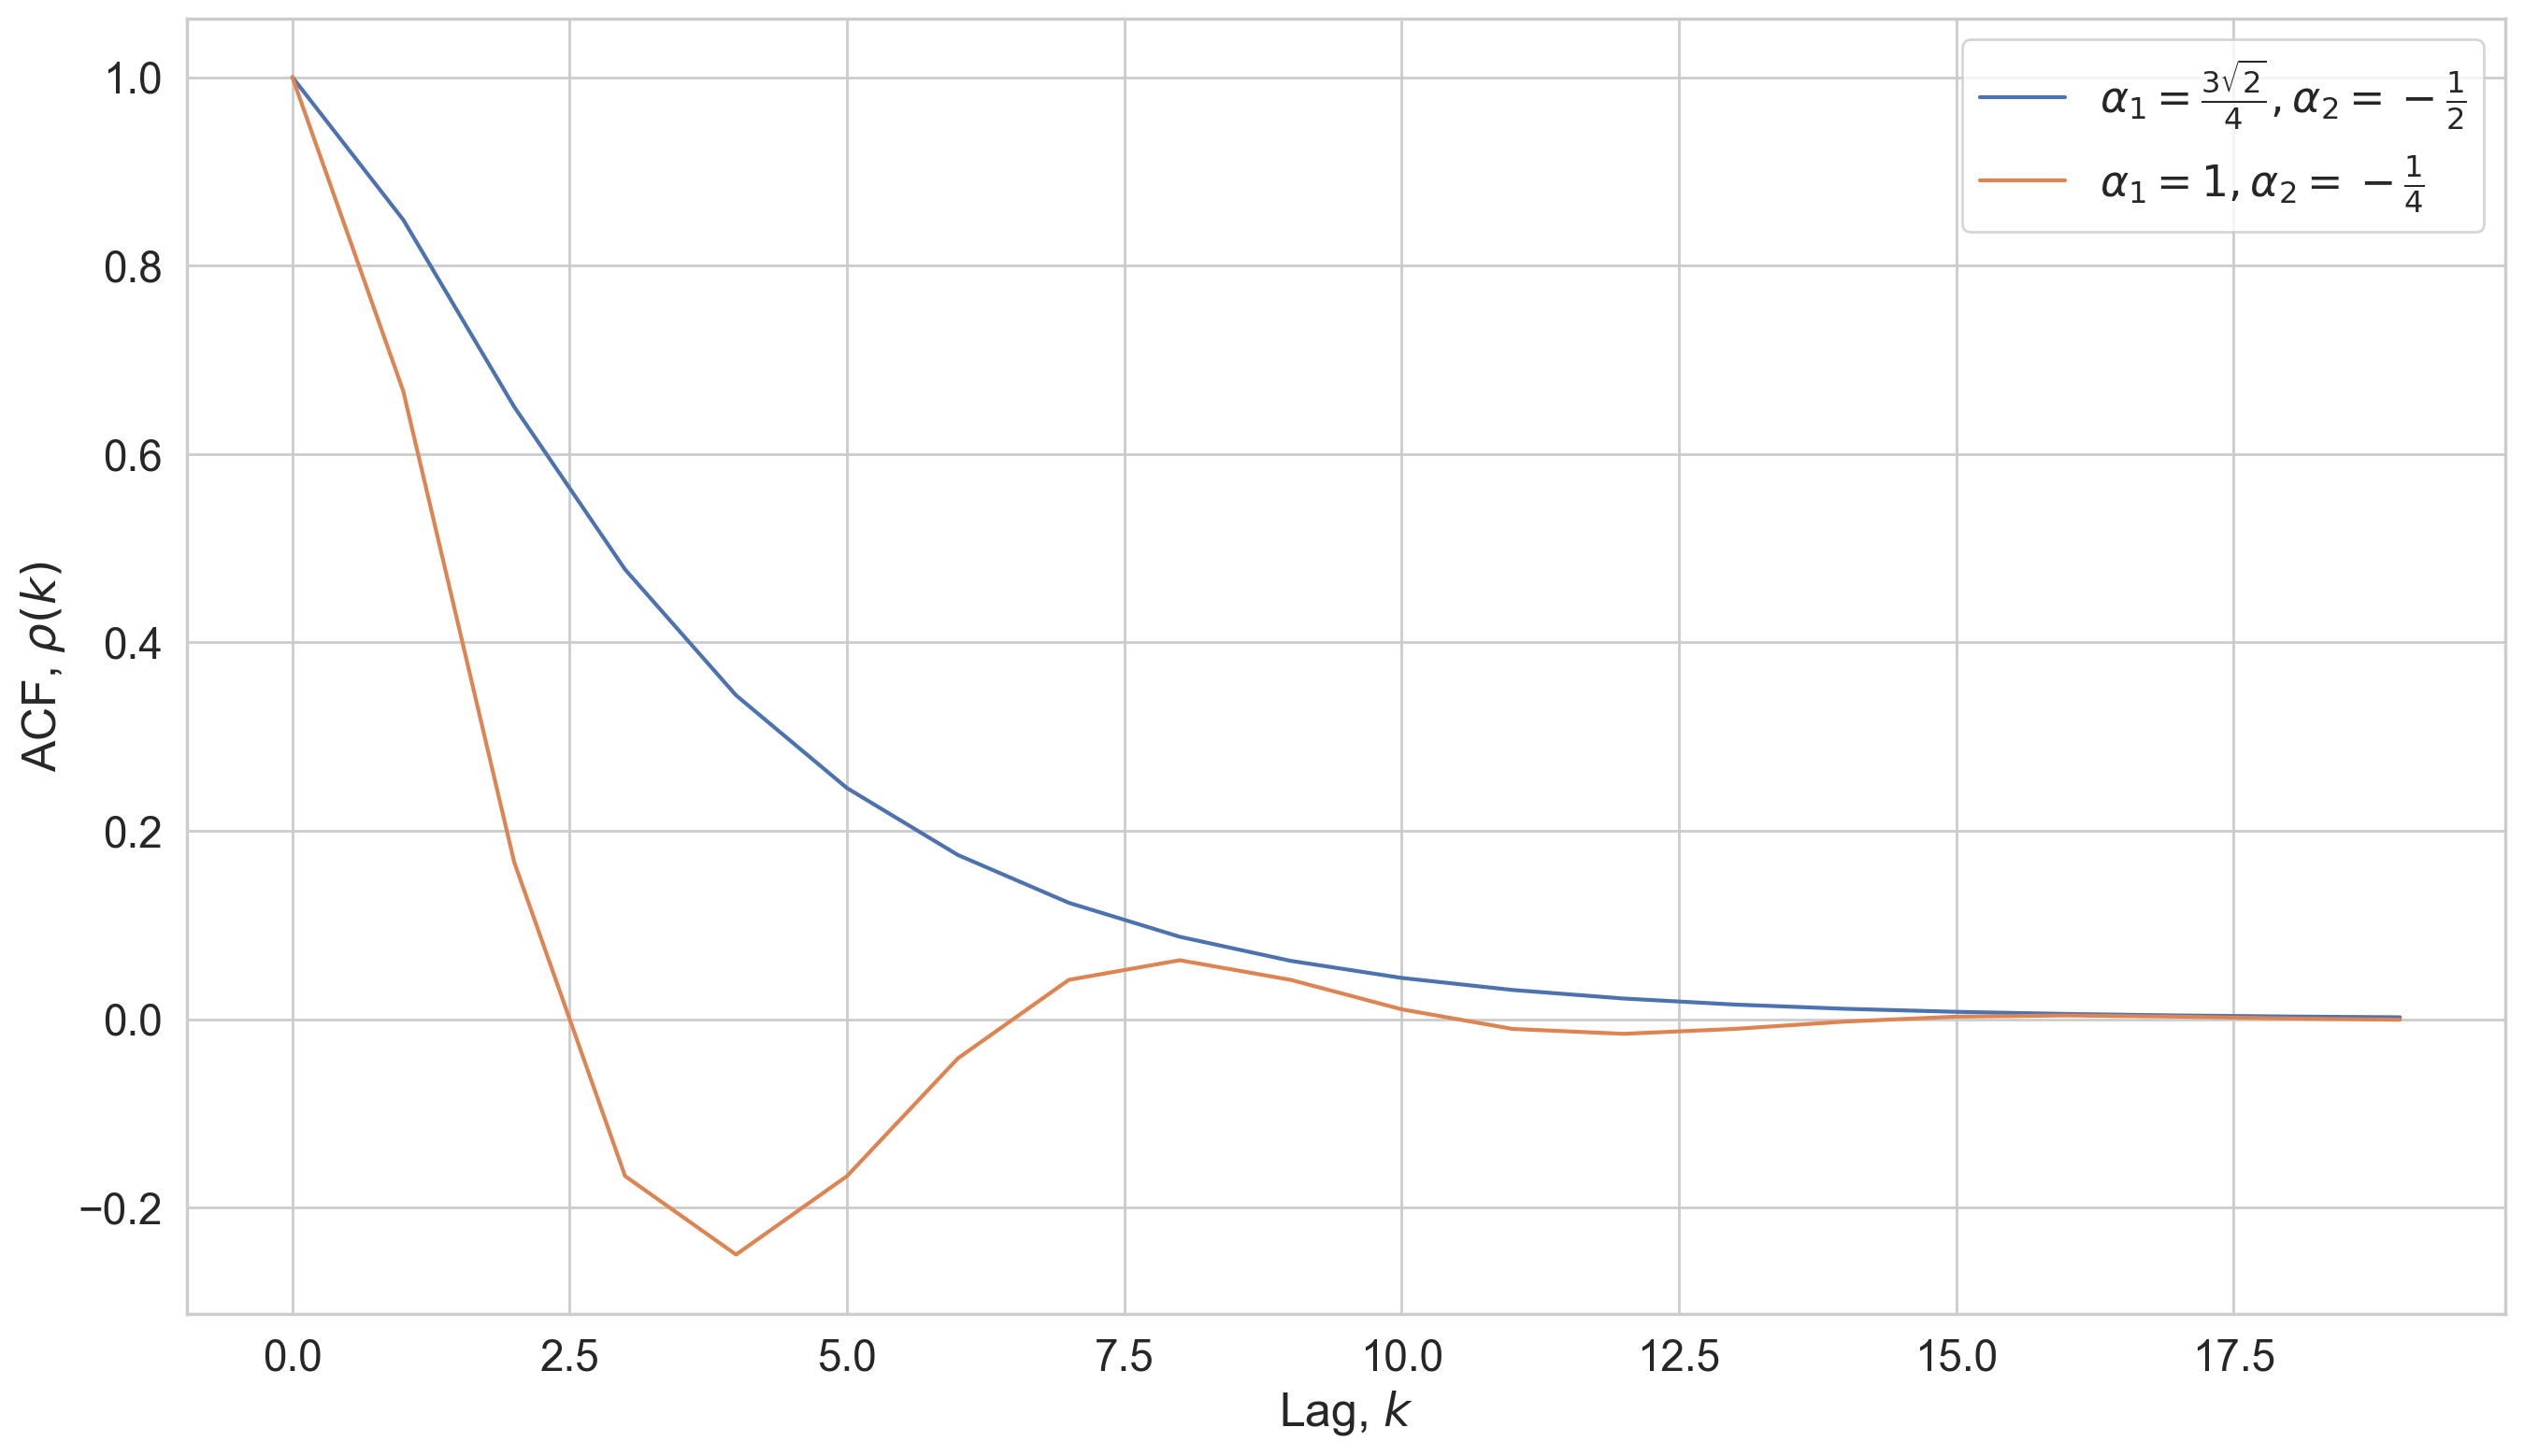

In [3]:
kk = np.arange(20)

alpha_1 = 3 * np.sqrt(2) / 4
alpha_2 = - 0.25
pi_1 = (alpha_1 + np.sqrt(alpha_1 ** 2 + 4 * alpha_2)) / 2
pi_2 = (alpha_1 - np.sqrt(alpha_1 ** 2 + 4 * alpha_2)) / 2
a_1 = (alpha_1 / (1 - alpha_2) - pi_2) / (pi_1 - pi_2)
a_2 = 1 - a_1
acf_ar_2_sqrt2_m14 = a_1 * pi_1 ** kk + a_2 * pi_2 ** kk

acf_ar_2_1_m12 = (1 / np.sqrt(2)) ** kk * (np.cos(np.pi * kk / 4) + np.sin(np.pi * kk / 4) / 3)
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(kk, acf_ar_2_sqrt2_m14, label="$\\alpha_1 = \\frac{3 \\sqrt{2}}{4}, \\alpha_2 = - \\frac{1}{2}$")
ax.plot(kk, acf_ar_2_1_m12, label="$\\alpha_1 = 1, \\alpha_2 = - \\frac{1}{4}$")
ax.set_xlabel("Lag, $k$")
ax.set_ylabel("ACF, $\\rho(k)$")
ax.legend();

## ARMA

A mixed autoregressive/moving-average process containing $p$ AR terms and $q$ MA terms is said to be an $ARMA(p, q)$:
$$
X_t = \alpha_1 X_{t-1} + \ldots + \alpha_p X_{t-p} + Z_t + \beta_1 Z_{t-1} + \ldots + \beta_q Z_{t-q}
$$

Using backshift operator:
$$
\phi(B) X_t = \theta(B) Z_t
$$
where
$$
\begin{aligned}
\phi(B) & = 1 - \alpha_1 B - \ldots - \alpha_p B^p, \\
\theta(B) & = 1 + \beta_1 B + \ldots + \beta_q B^q
\end{aligned}
$$

The conditions for stationarity and invertibility are the same as for a pure AR or pure MA process, namely, ARMA will be stationary if roots of
$$
\phi(B) = 0
$$
lie outside the unit circle, and will be invertible if roots of
$$
\theta(B) = 0
$$
lie outside the unit circe.

## A note on mean

If mean of the series is $\mu \neq 0$, we can do the following e.g. for $AR(p)$ process:
$$
X_t - \mu = \alpha_1 (X_{t-1} - \mu) + \ldots + \alpha_p (X_{t-p} - \mu) + Z_t
$$
or
$$
X_t = \alpha_0 + \alpha_1 X_{t-1} + \ldots + \alpha_p X_{t-p} + Z_t
$$
where $\alpha_0 = \mu (1 - \alpha_1 - \ldots - \alpha_p)$.

All properties persist. Analagous reasoning for MA and ARMA.

## Wold's theorem

A famous result states that every stationary time series can be written as the sum of two infinite time series, one purely deterministic and one purely stochastic, i.e. an infinite-order ARMA process. It should be taken with a grain of salt, because in reality we do not use inifinite order processes, as there will be too many parameters to estimate. However, we can hope that we can approximate a stationary process with a sufficiently high-order ARMA process with good approximation error.

## Differencing

In practice most time series are non-stationary. In order to fit a stationary model to a non-stationary series $X_t$, we need to remove non-stationarity. One quick way to deal with certain types of non-stationarity is to perform differencing of order $d$, i.e. replace the process with its differences $\nabla^d X_t = X_t - X_{t - d}$. If we then fit a model on the differenced time series, such a model would be called an **integrated** model, as the outputs of this model have to be summed or "integrated" to provide a model for the original series.

## ARIMA

Consider $W_t = \nabla^d X_t = (1 - B)^d X_t$, and then an $ARMA(p, q)$ model of $W_t$:
$$
W_t = \alpha_1 W_{t-1} + \ldots + \alpha_p W_{t-p} + Z_t + \beta_1 Z_{t-1} + \ldots + \beta_q Z_{t-q}
$$

Using backward shift operator, we write:
$$
\phi(B) W_t = \theta(B) Z_t
$$
or
$$
\phi(B) (1 - B)^d X_t = \theta(B) Z_t
$$

The former equation is $ARMA(p, q)$ of $W_t$, while the latter equation is $ARIMA(p, d, q)$ of $X_t$.

## SARIMA

ARIMA models can be generalized to include seasonal terms. Consider series $X_t$ with seasonal cycle of length $S$. Let's take $ARMA(p, q)$ model:
$$
X_t = \alpha_1 X_{t-1} + \ldots + \alpha_p X_{t-p} + Z_t + \beta_1 Z_{t-1} + \ldots + \beta_q Z_{t-q}
$$
and add $P$ AR components:
$$
+ \alpha_S X_{t-S} + \alpha_{2S} X_{t-2S} + \ldots + \alpha_{PS} X_{t-PS}
$$
and add $Q$ MA components:
$$
+ \beta_S Z_{t-S} + \beta_{2S} Z_{t-2S} + \ldots + \beta_{PS} Z_{t-QS}
$$

Such model is called $SARMA(p, q) \times (P, Q)$. We can get model $SARIMA(p, d, q) \times (P, D, Q)$, if we apply additionally differencing of order $d$ and seasonal differencing of order $D$ to the series.

## SARIMA(p, d, q) x (P, D, Q)

$$
\begin{aligned}
X_t = & \alpha_0 + \alpha_1 X_{t-1} + \ldots + \alpha_p X_{t-p} + Z_t + \beta_1 Z_{t-1} + \ldots + \beta_q Z_{t-q} + \\
& + \alpha_S X_{t-S} + \alpha_{2S} X_{t-2S} + \ldots + \alpha_{PS} X_{t-PS} + \\
& + \beta_S Z_{t-S} + \beta_{2S} Z_{t-2S} + \ldots + \beta_{PS} Z_{t-QS}
\end{aligned}
$$
where $\alpha_0 = \mu (1 - \alpha_1 - \ldots - \alpha_p)$

## Estimating parameters
- $\alpha_0, \alpha, \beta$
- $d, D$
- $q, Q$
- $p, P$

## Estimating the mean

$$
\hat{\mu} = \frac1T \sum_{t=1}^T X_t
$$

Must be taken with care:
- Only makes sense for stationary processes
- If there is autocorrelation, the variance of the estimator depends on it
- Not necessarily that $\hat{\mu} \to \mathbb{E}[X_t]$, requires property called **ergodicity**, usually OK for stationary processes

## Estimating AR process

Consider $AR(p)$ process
$$
X_t = \alpha_0 + \alpha_1 X_{t-1} + \ldots + \alpha_p X_{t-p} + Z_t
$$

Note that it is linear in $X_t$. Thanks to that, we have many ways to do the estimation:
- Least squares:
  $$
  \min_{\alpha_0, \alpha_1, \ldots, \alpha_p} \sum_{t=p+1}^T \left[ X_t - \alpha_0 - \alpha_1 X_{t-1} - \ldots - \alpha_p X_{t-p} \right]^2
  $$
- Maximum likelihood:
  $$
  \min_{\alpha_0, \alpha_1, \ldots, \alpha_p} \log \mathcal{L}(\alpha | X)
  $$
  $$
  \mathcal{L}(\alpha | X) = \left( \prod_{t=p+1}^T p(X_t | X_{t-1}, \ldots, X_{p+1}, \theta) \right) p(X_1, \ldots, X_p | \theta)
  $$
  $$
  \log \mathcal{L}(\alpha | X) = \underbrace{\sum_{t=p+1}^T \log p(X_t | X_{t-1}, \ldots, X_{p+1}, \theta)}_{\text{conditional ll}} + \underbrace{\log p(X_1, \ldots, X_p | \theta)}_{\text{marginal ll}}
  $$

  Will coincide with LSE if the noise is from Normal distribution.

## Estimating AR process

Only good for large $N$ and strong stationary properties:
- As ordinary regression treating each $X_{t-k}$ as independent variable:
  $$
  X_t \sim \alpha_0 + \alpha_1 X_{t-1} + \ldots + \alpha_p X_{t-p} + Z_t
  $$
- Using Yule-Walker equations:
  $$
  \rho(k) = \alpha_1 \rho(k-1) + \ldots + \alpha_p \rho(k-p)
  $$
  $$
  R \hat{\alpha} = r
  $$
  where $r$ is a vector of sample autocorrelations and $R$ is a matrix of them.

## Example: AR(1)

Consider $AR(1)$ process
$$
X_t = \mu + \alpha_1 X_{t-1} + Z_t
$$

The estimation using least squares will give:
$$
\hat{\mu} = \frac{\bar{X}_{(2)} - \hat{\alpha}_1 \bar{X}_{(1)}}{1 - \hat{\alpha}_1}
$$
where $\bar{X}_{(1)}$ and $\bar{X}_{(2)}$ are the means of the first and last $(N−1)$ observations respectively. Obviously they are close, so often used estimator is the sample mean:
$$
\hat{\mu} \approx \bar{X}
$$

$$
\hat{\alpha}_1 = \frac{\sum_{t=1}^{N-1} (X_t  -\hat{\mu}) (X_{t+1} -\hat{\mu})}{\sum_{t=1}^{N-1} (X_t  -\hat{\mu})^2} \approx \frac{\sum_{t=1}^{N-1} (X_t -\bar{X}) (X_{t+1} -\bar{X})}{\sum_{t=1}^{N-1} (X_t  -\bar{X})^2} \approx \frac{\sum_{t=1}^{N-1} (X_t -\bar{X}) (X_{t+1} -\bar{X})}{\sum_{t=1}^{N} (X_t  -\bar{X})^2} = r_1
$$

## Estimating MA process

Consider $MA(q)$ process:
$$
X_t = \alpha_0 + \beta_1 Z_{t-1} + \ldots + \beta_q Z_{t-q}
$$

Unfortunately, for such a process, we can not express the residual as a linear function of observed $X_t$s. Hence, only the maximum likelihood method is applicable.

$$
\min_{\alpha_0, \alpha_1, \ldots, \alpha_p} \log \mathcal{L}(\alpha | X)
$$
$$
\mathcal{L}(\alpha | X) = \left( \prod_{t=p+1}^T p(X_t | X_{t-1}, \ldots, X_{p+1}, \theta) \right) p(X_1, \ldots, X_p | \theta)
$$
$$
\log \mathcal{L}(\alpha | X) = \underbrace{\sum_{t=p+1}^T \log p(X_t | X_{t-1}, \ldots, X_{p+1}, \theta)}_{\text{conditional ll}} + \underbrace{\log p(X_1, \ldots, X_p | \theta)}_{\text{marginal ll}}
$$

## Estimating ARMA process

As a composition of $AR(p)$ and $MA(q)$, $ARMA(p, q)$ should be estimated with maximum likelihood method. Optimization of conditional likelihood is what happens under the hood of most practical methods.

## Estimating parameters
- $\alpha_0, \alpha, \beta$
- $d, D$
- $q, Q$
- $p, P$

## Estimating differencing order

- $d$ and $D$ are chosen such that the series is stationary.
- If there is seasonality, it is recommended to start with seasonal differencing, it may already make the series stationary, as we've seen last time.
- The less differencing, the better, because
  - More data
  - Less variance due to back transformation

## Estimating MA and AR order

- We absolutely can't estimate $p$ and $q$ with maximum likelihood, the higher the order, the higher $\mathcal{L}$
- We can select the order by looking at ACF and PACF
- We can select the order automatically with information criteria

## PACF

Partial autocorrelation function is defined as follows:
$$
\pi(h, h) = \begin{cases}
\rho(X_{t+1}, X_t), & h = 1, \\
\rho(X_{t+h} - X_{t+h}^{h-1}, X_t - X_t^{h-1}), & h > 1
\end{cases}
$$
where $X_t^{h-1}$ is a result of regressing $X_t$ on its $h-1$ previous values.

In words: When fitting an $AR(p)$ model, the last coefficient $\alpha_p$ will be denoted by $\pi_p$ and measures the excess correlation at lag $p$ which is not accounted for by an $AR(p−1)$ model. It is called the $p$-th partial autocorrelation coefficient and, when plotted against $p$, gives the partial ACF.

## Estimating MA and AR order with ACF and PACF

- We know that for $MA(q)$ process, the ACF becomes zero after $q$ lags.
- We also know that for $AR(p)$ process, the ACF is a mixture of exponential decay and sinusoid.
- It can be shown that the PACF has reverse properties to those above.

So by looking at ACF we define the order $q$ and by looking at PACF we define the order $p$.

Also the seaonal order can be defined, the lags will be significant at $P \cdot S$ and $Q \cdot S$.

## Estimating MA and AR order with information criteria

Information criteria:
- Akaike
  $$
  AIC = - 2 \mathcal{L} + 2k
  $$
- Corrected Akaike (for small samples)
  $$
  AICc = - 2 \mathcal{L} + \frac{2k^2}{T-k-1}
  $$
- Bayesian
  $$
  BIC = - 2 \mathcal{L} + k (\log T- 2)
  $$

here $k = P+Q+p+q+1$ is the number of parameters in the model.s

## Residuals

When a model has been fitted to a time series, it is advisable to check that the model really does provide an adequate description of the data. As with most statistical models, this is usually done by looking at the residuals:
$$
\text{residual} = \text{observation} - \text{fitted value}
$$

For a univariate time-series model, the fitted value is the one-step-ahead forecast so that the residual is the one-step-ahead forecast error.

The properties of residuals, e.g. lack of structure, quanitfy the goodness of the model.

## Necessary properties of residuals

- Unbiasedness; to be checked with standard statistical tests for the mean, e.g. Student's t-test
- Stationarity; to be checked with visual analysis, KPSS test
- Uncorrelatedness; to be checked with correlogram, Ljung-Box-Pierce Q-criterion

## Desired properties of residuals

- Normality; to be checked with QQ-plot, Shapiro test
- Homoscedacity; to be checked with visual analysis, Breusch–Pagan test

# Webinar

## Testing stationarity

There are two main tools to test if series is stationary or not. There are more, but these two are sufficient.

- KPSS (Kwiatkowski-Philips-Schmidt-Shin) test. Null hypothesis is that series is stationary, alternative is that there is trend.
- Dickey–Fuller test. Null hypothesis is that series is non-stationary, alternative is that series is stationary.

In [7]:
from darts import TimeSeries
import darts.datasets as ds
import scipy.stats as sts
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from darts.utils.statistics import plot_acf, plot_pacf

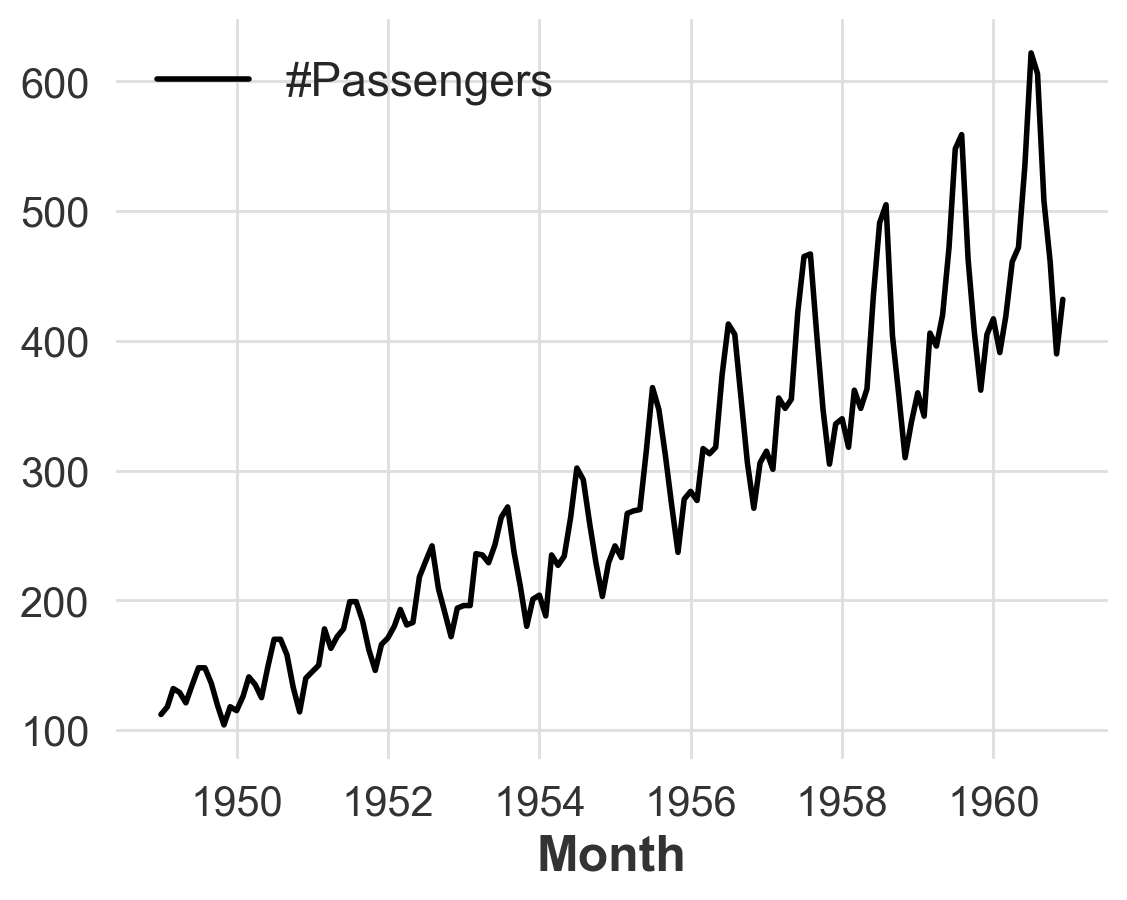

In [5]:
air_pax = ds.AirPassengersDataset().load()
air_pax.plot();

In [8]:
_, p_value, _, _ = tsa.stattools.kpss(air_pax.values())
print("rejected" if p_value < 0.05 else "not rejected")

rejected


/var/folders/33/j0cl7y453td68qb96j7bqcj4cf41kc/T/ipykernel_823/3112241267.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  _, p_value, _, _ = tsa.stattools.kpss(air_pax.values())


In [10]:
_, p_value, _, _, _, _ = tsa.stattools.adfuller(air_pax.values())
print("rejected" if p_value < 0.05 else "not rejected")

not rejected


## Differencing

/var/folders/33/j0cl7y453td68qb96j7bqcj4cf41kc/T/ipykernel_823/540728647.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  air_pax.plot(ax=ax[0], label=f"KPSS p-value {tsa.stattools.kpss(air_pax.values())[1]:.2f}");
/var/folders/33/j0cl7y453td68qb96j7bqcj4cf41kc/T/ipykernel_823/540728647.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  air_pax.diff().plot(ax=ax[1], label=f"KPSS p-value {tsa.stattools.kpss(air_pax.diff().values())[1]:.2f}");
/var/folders/33/j0cl7y453td68qb96j7bqcj4cf41kc/T/ipykernel_823/540728647.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  air_pax.diff(12).plot(ax=ax[2], label=f"KPSS p-value {ts

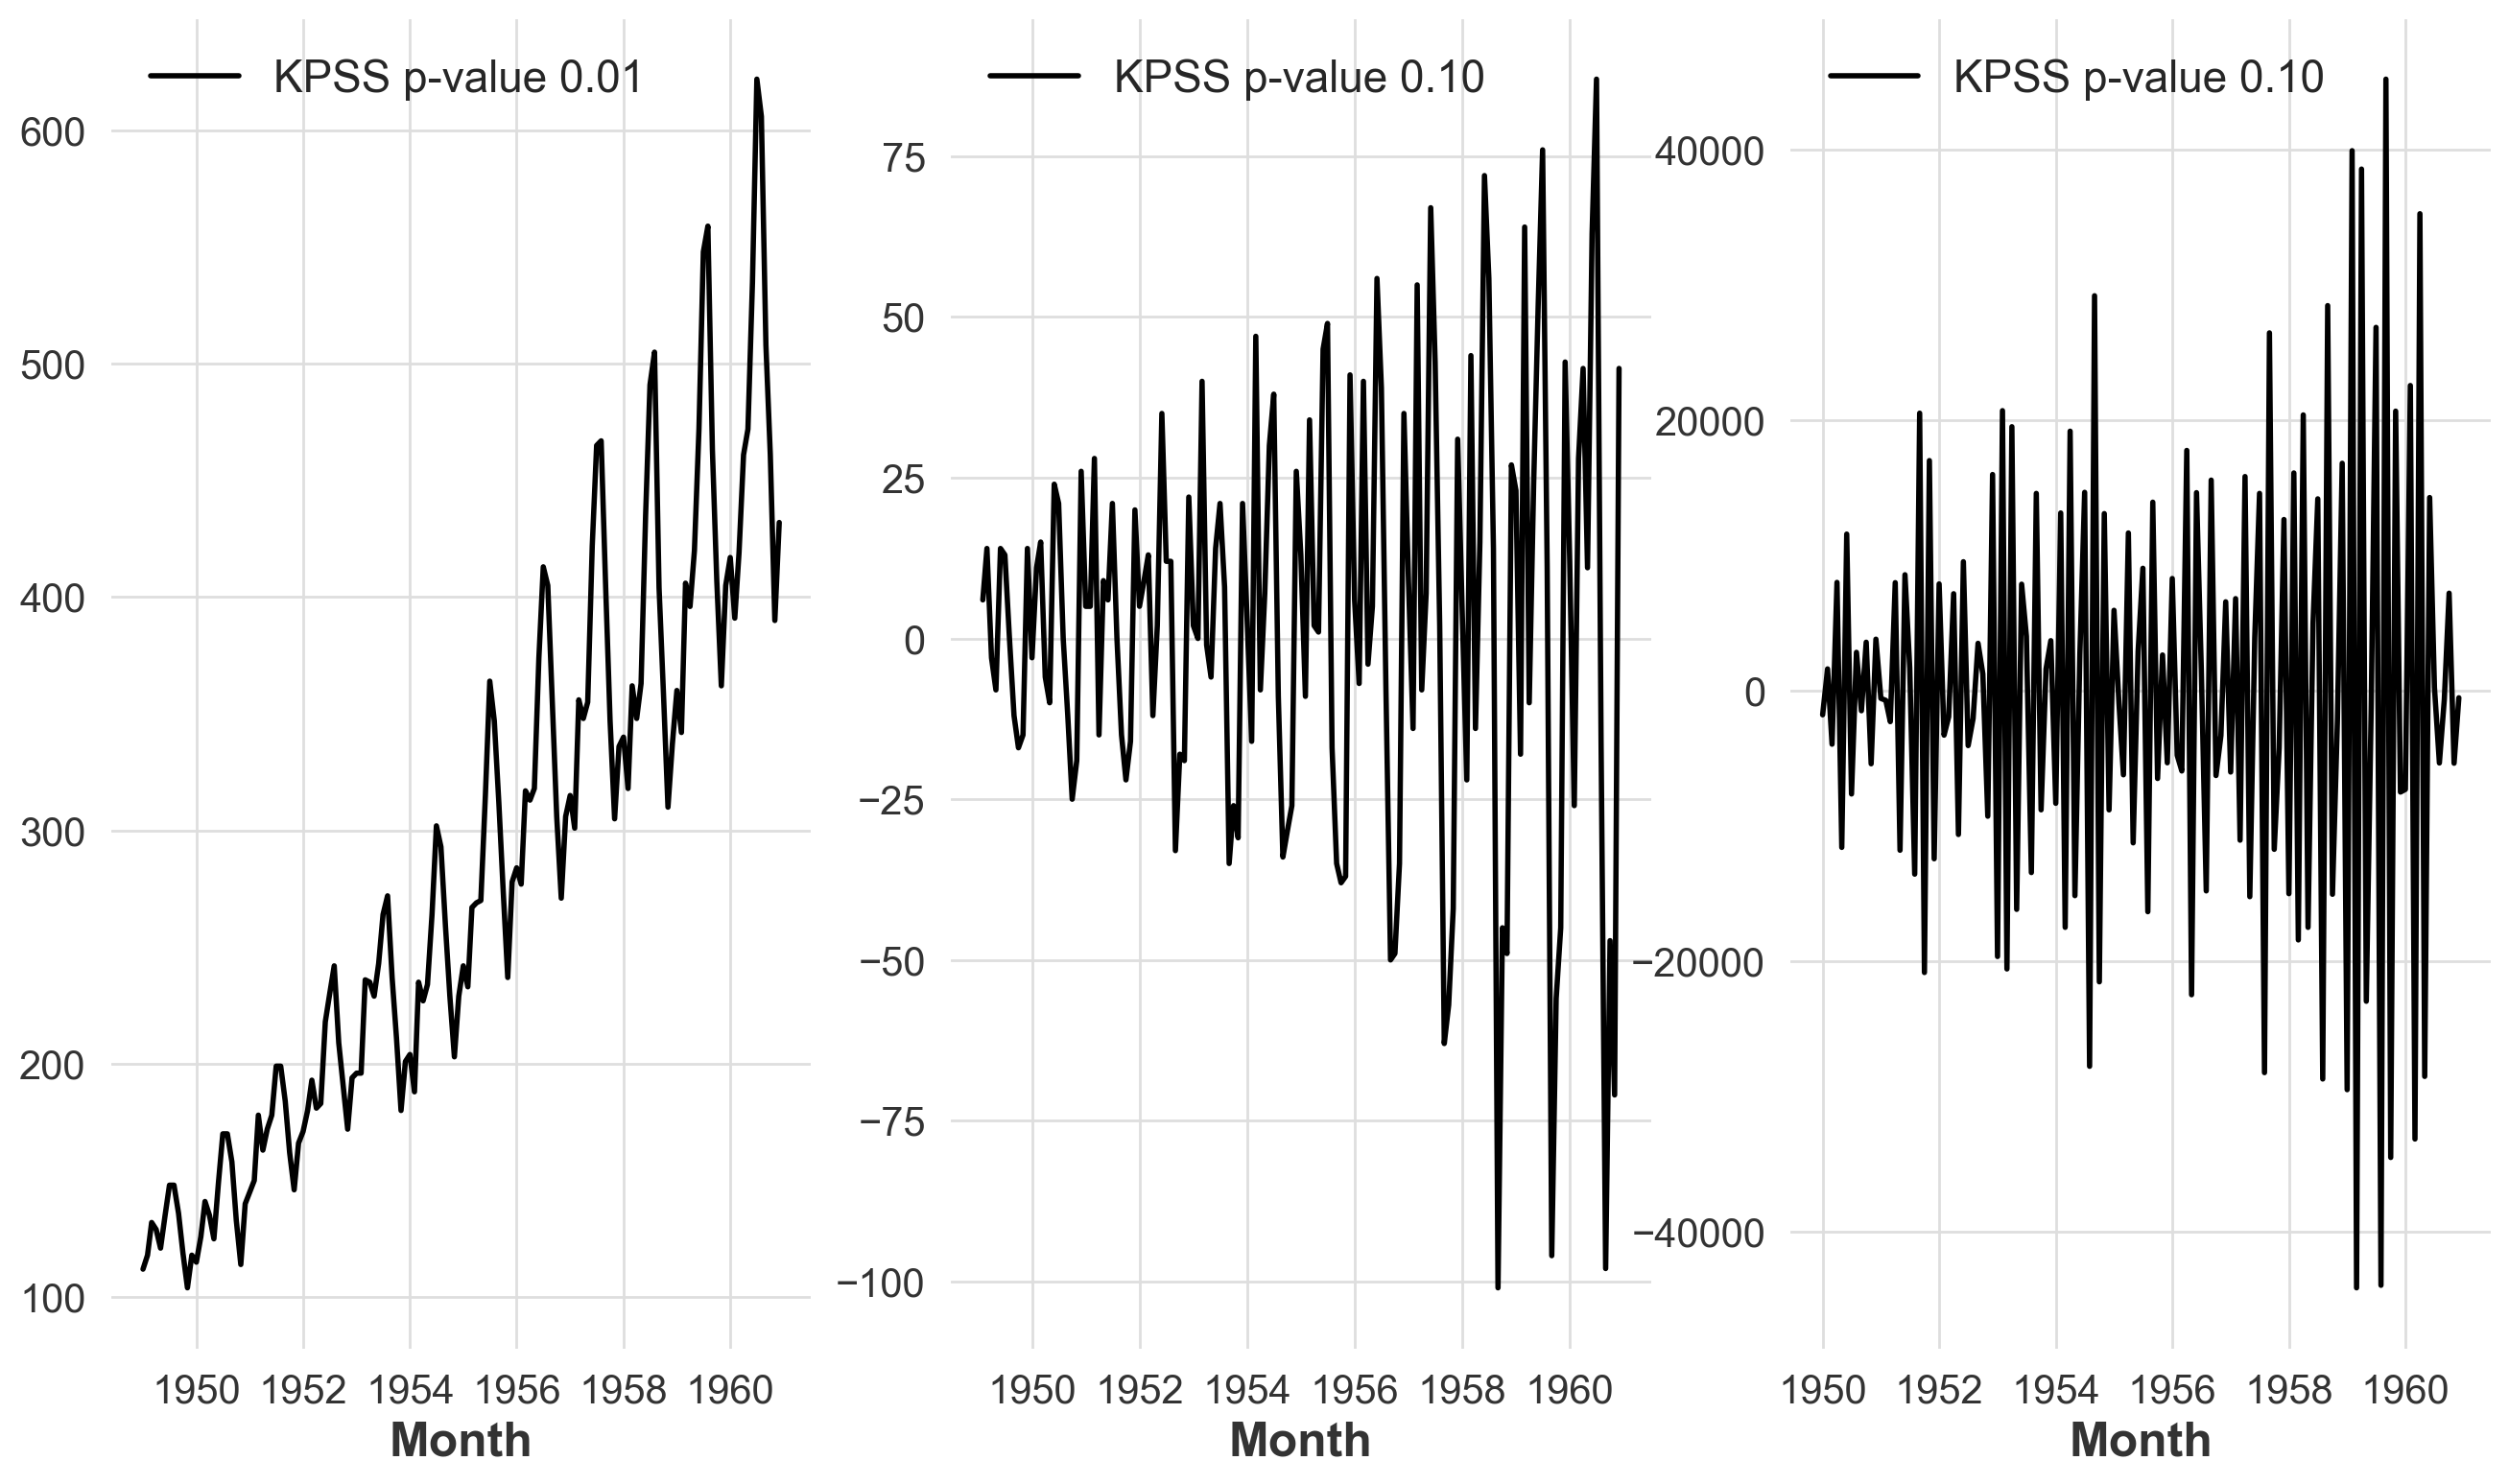

In [12]:
fig, ax = plt.subplots(1,3,figsize=(16,9))
air_pax.plot(ax=ax[0], label=f"KPSS p-value {tsa.stattools.kpss(air_pax.values())[1]:.2f}");
air_pax.diff().plot(ax=ax[1], label=f"KPSS p-value {tsa.stattools.kpss(air_pax.diff().values())[1]:.2f}");
air_pax.diff(12).plot(ax=ax[2], label=f"KPSS p-value {tsa.stattools.kpss(air_pax.diff(12).values())[1]:.2f}");

In [13]:
air_pax_log = air_pax.map(lambda ts, x: sts.boxcox(x, lmbda=0.1))

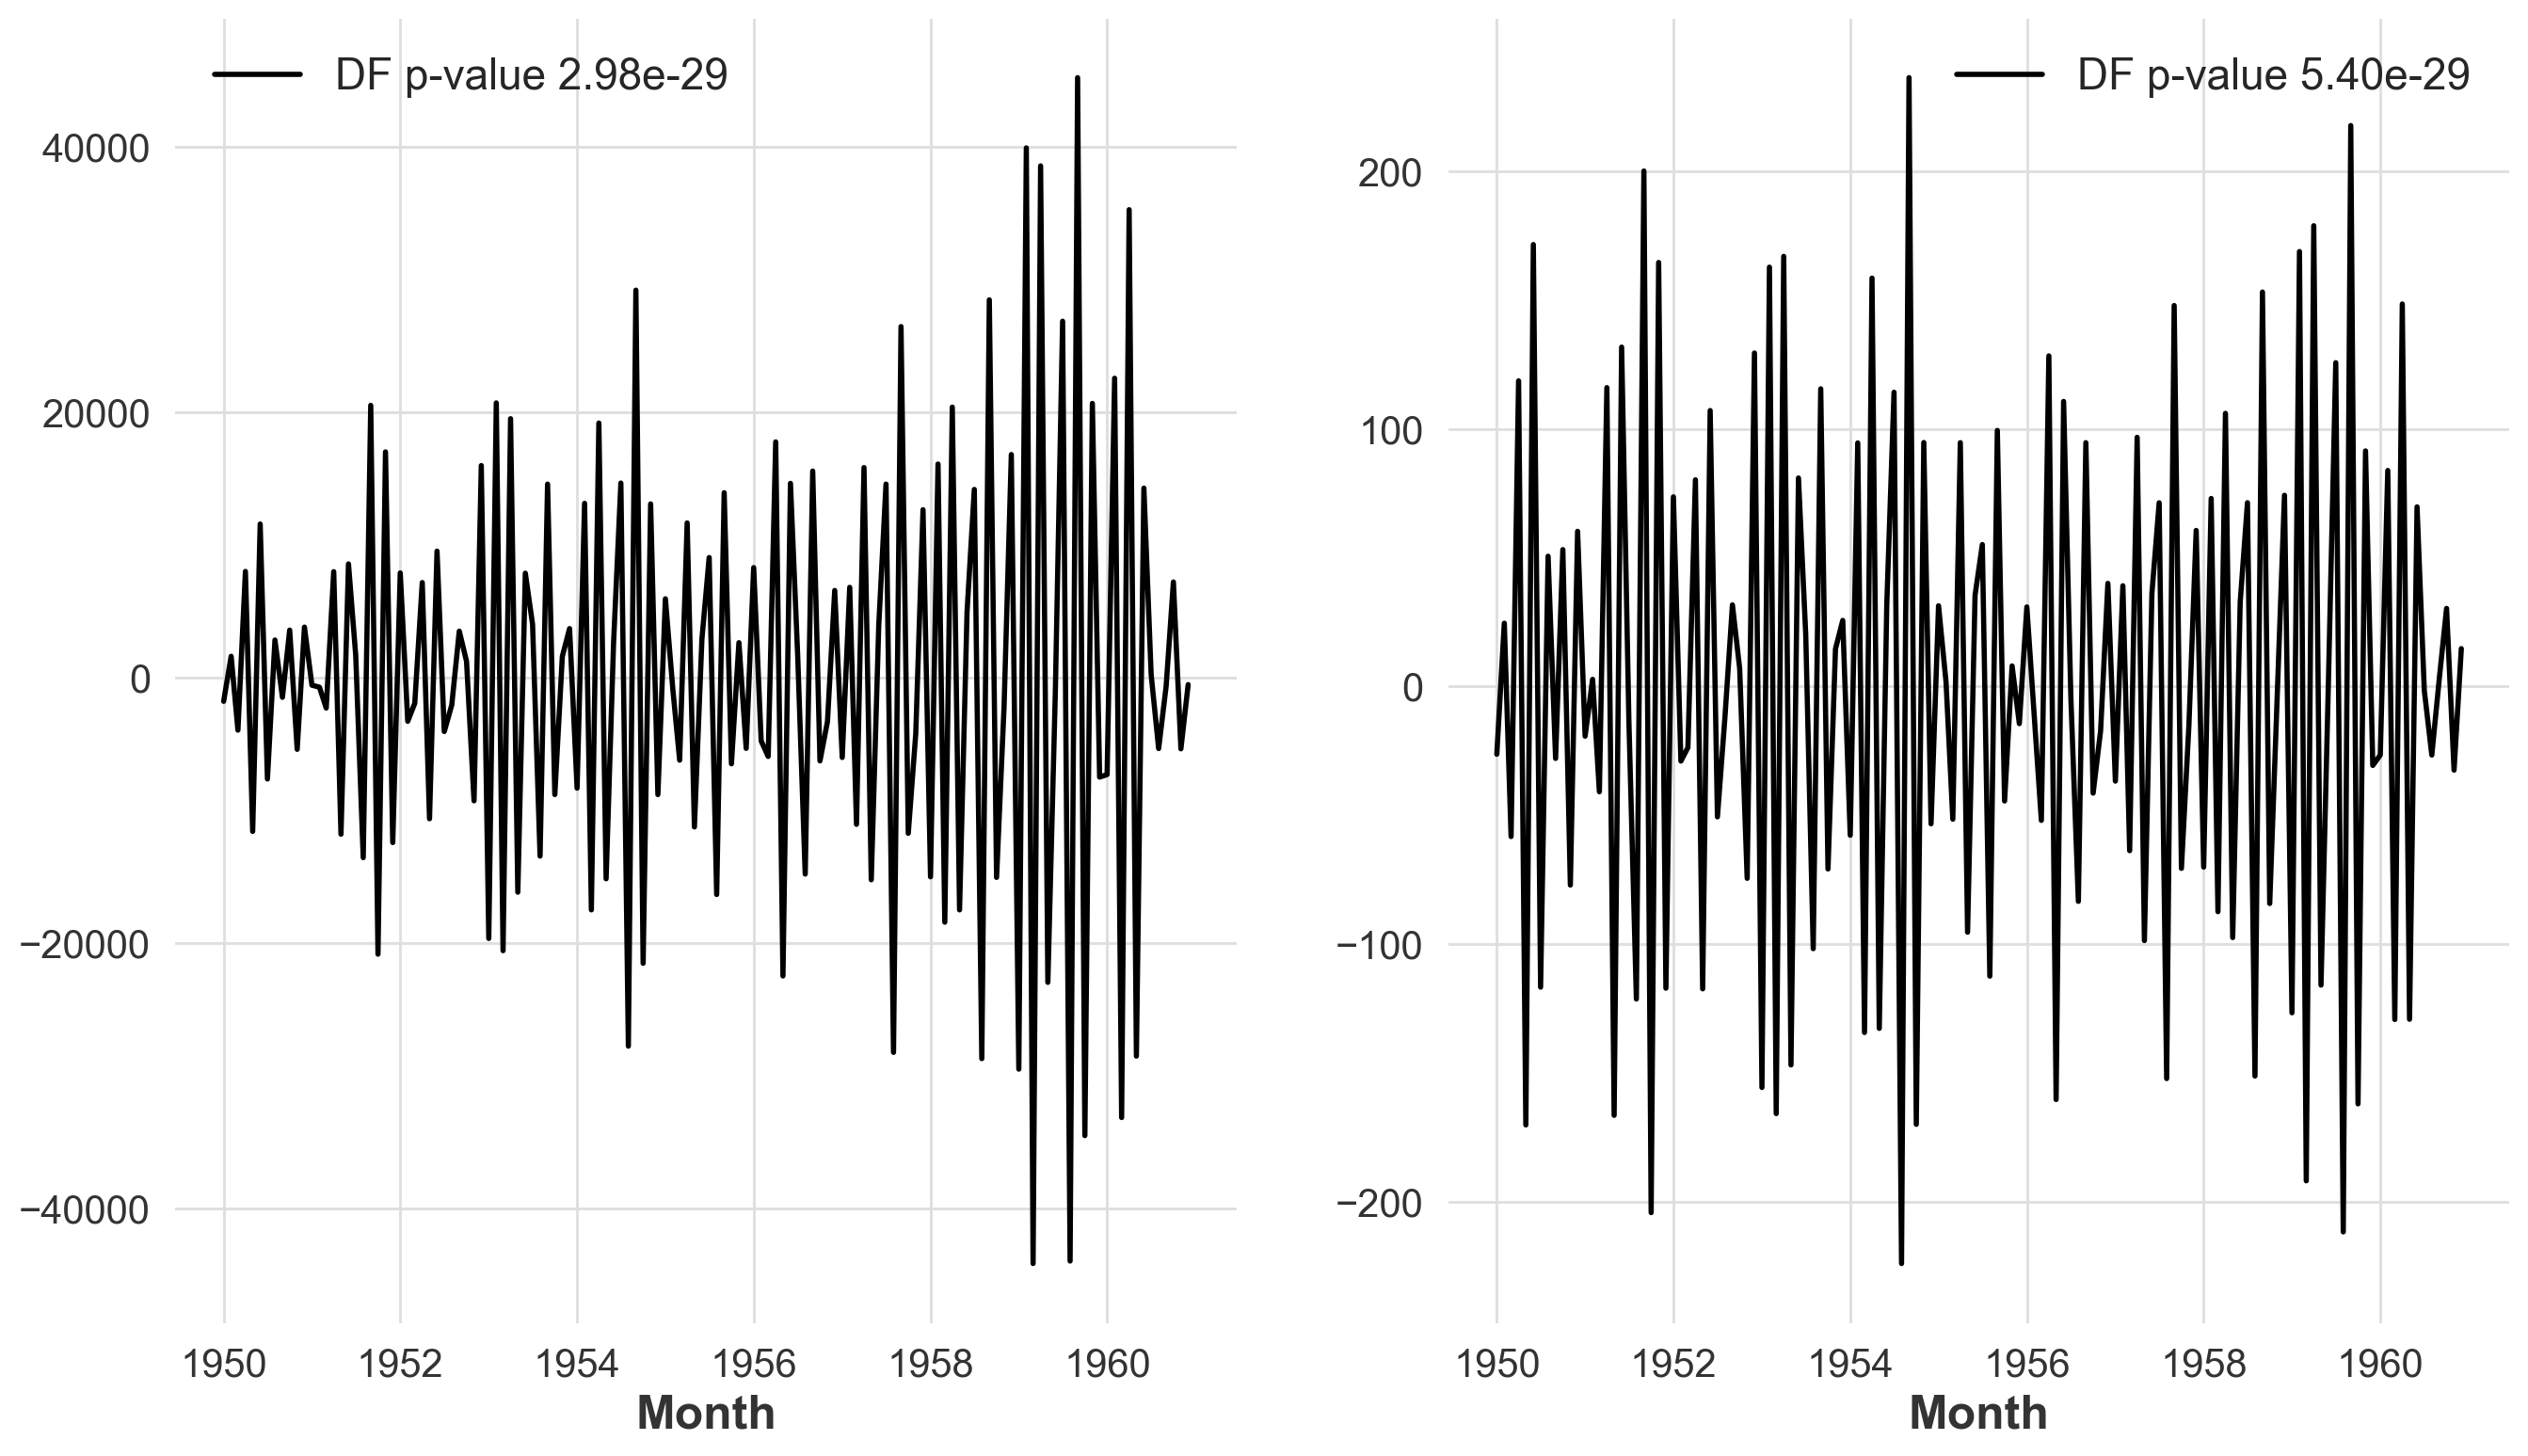

In [15]:
fig, ax = plt.subplots(1,2,figsize=(16,9))
air_pax.diff(12).plot(ax=ax[0], label=f"DF p-value {tsa.stattools.adfuller(air_pax.diff(12).values())[1]:.2e}");
air_pax_log.diff(12).plot(ax=ax[1], label=f"DF p-value {tsa.stattools.adfuller(air_pax_log.diff(12).values())[1]:.2e}");

## Estimating $p$ and $q$

In [77]:
beer_dataset = ds.AusBeerDataset().load()

In [81]:
import pandas as pd

In [82]:
beer_dataset, _ = beer_dataset.split_before(pd.Timestamp("1975-01-01"))

<Axes: xlabel='date'>

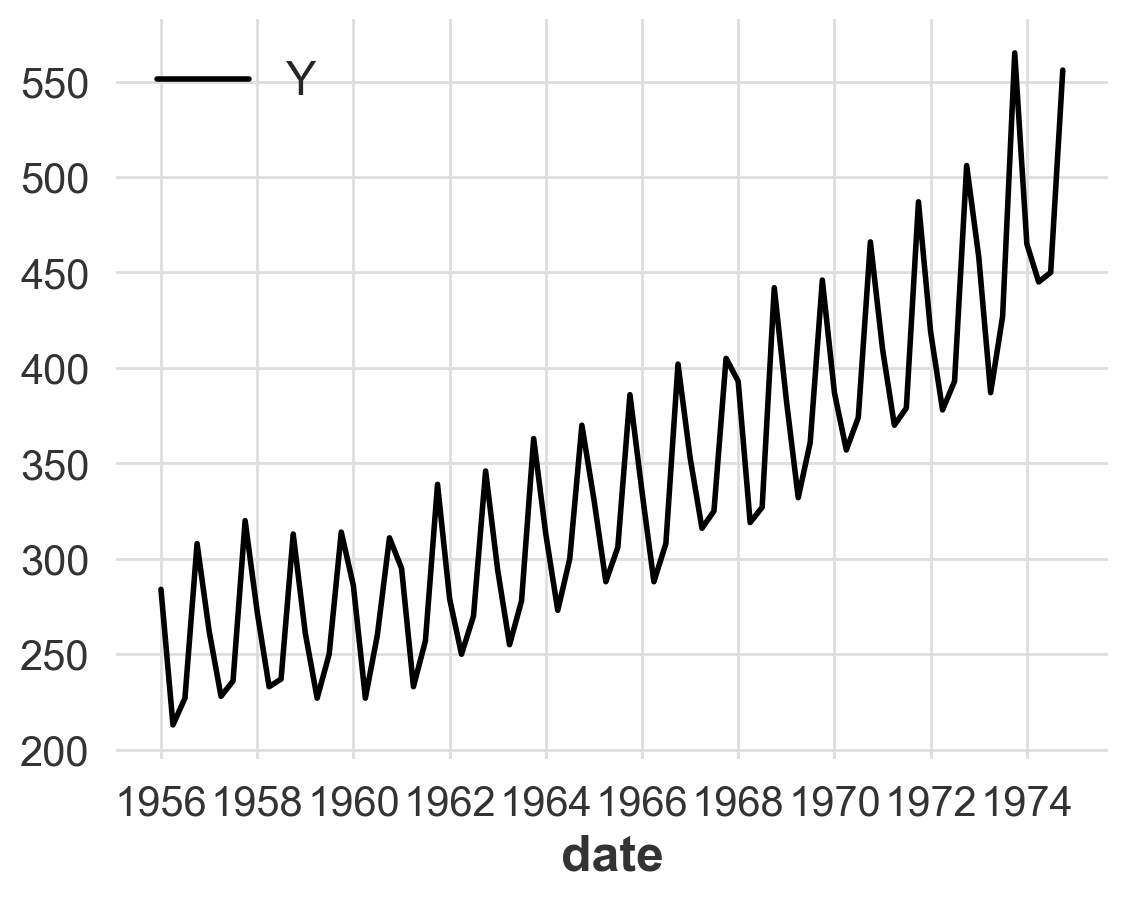

In [89]:
beer_dataset.plot()

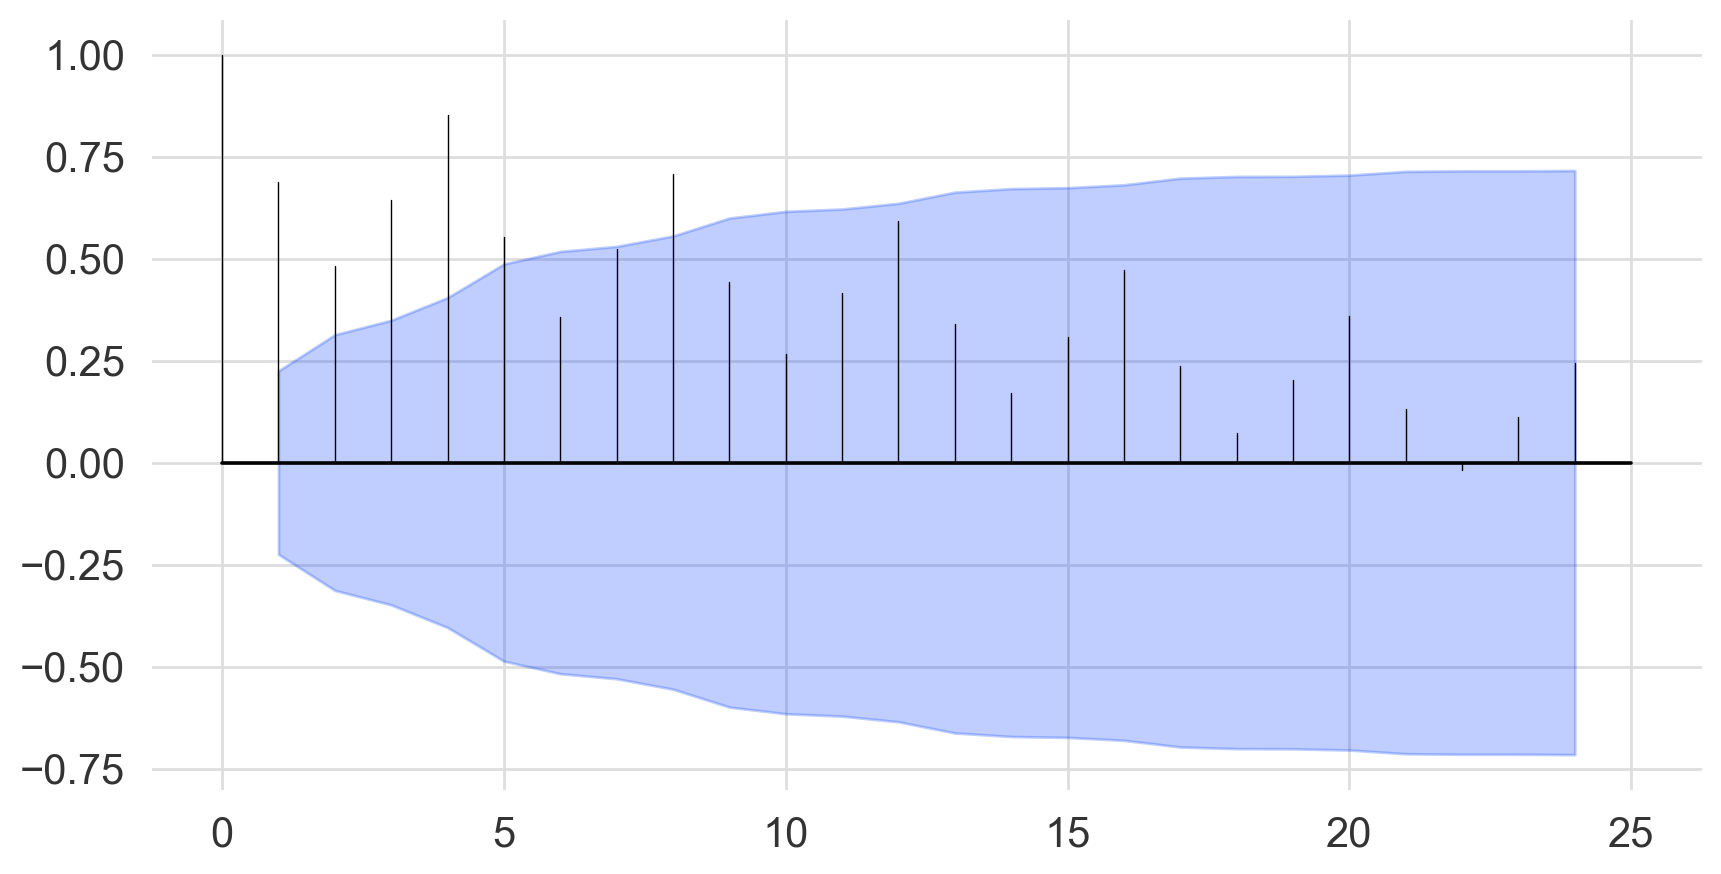

In [90]:
plot_acf(beer_dataset)

<Axes: xlabel='date'>

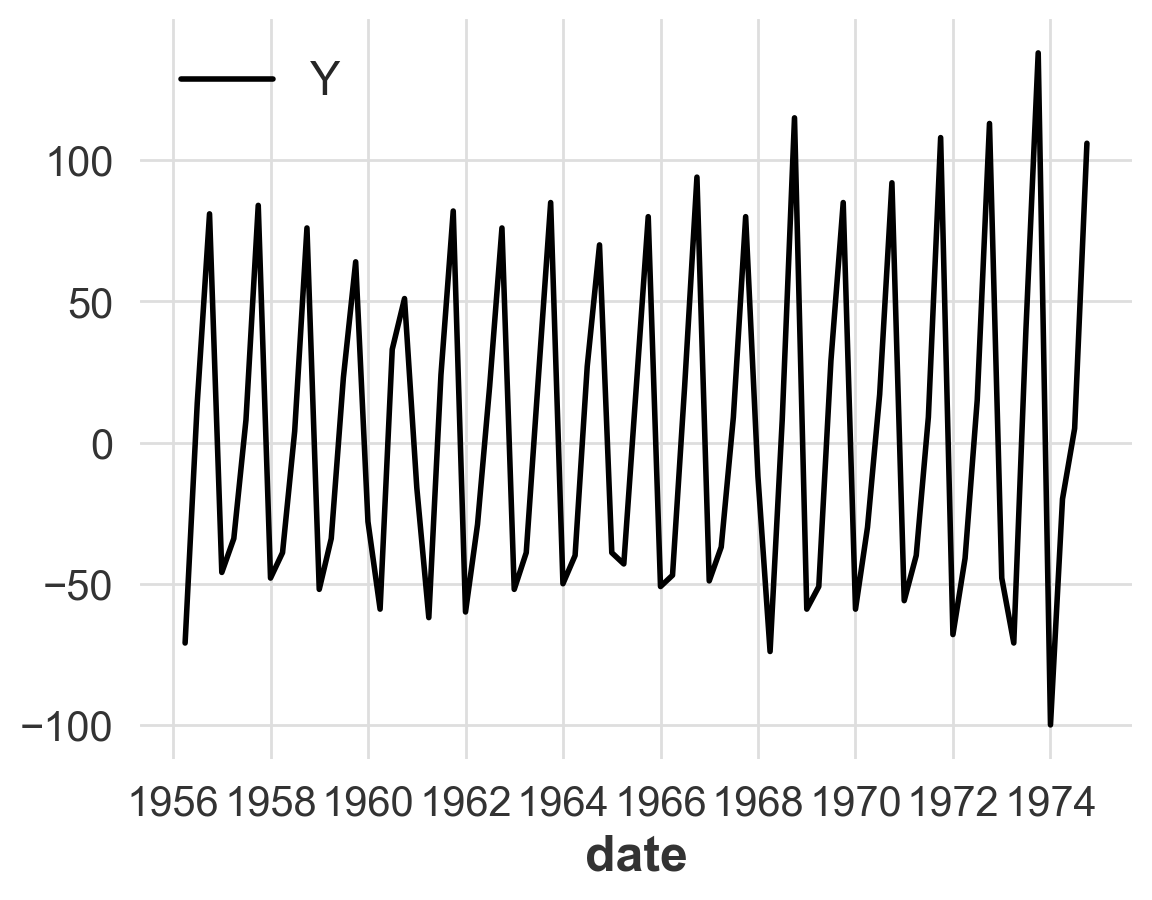

In [87]:
beer_dataset_diff = beer_dataset.diff()
beer_dataset_diff.plot()

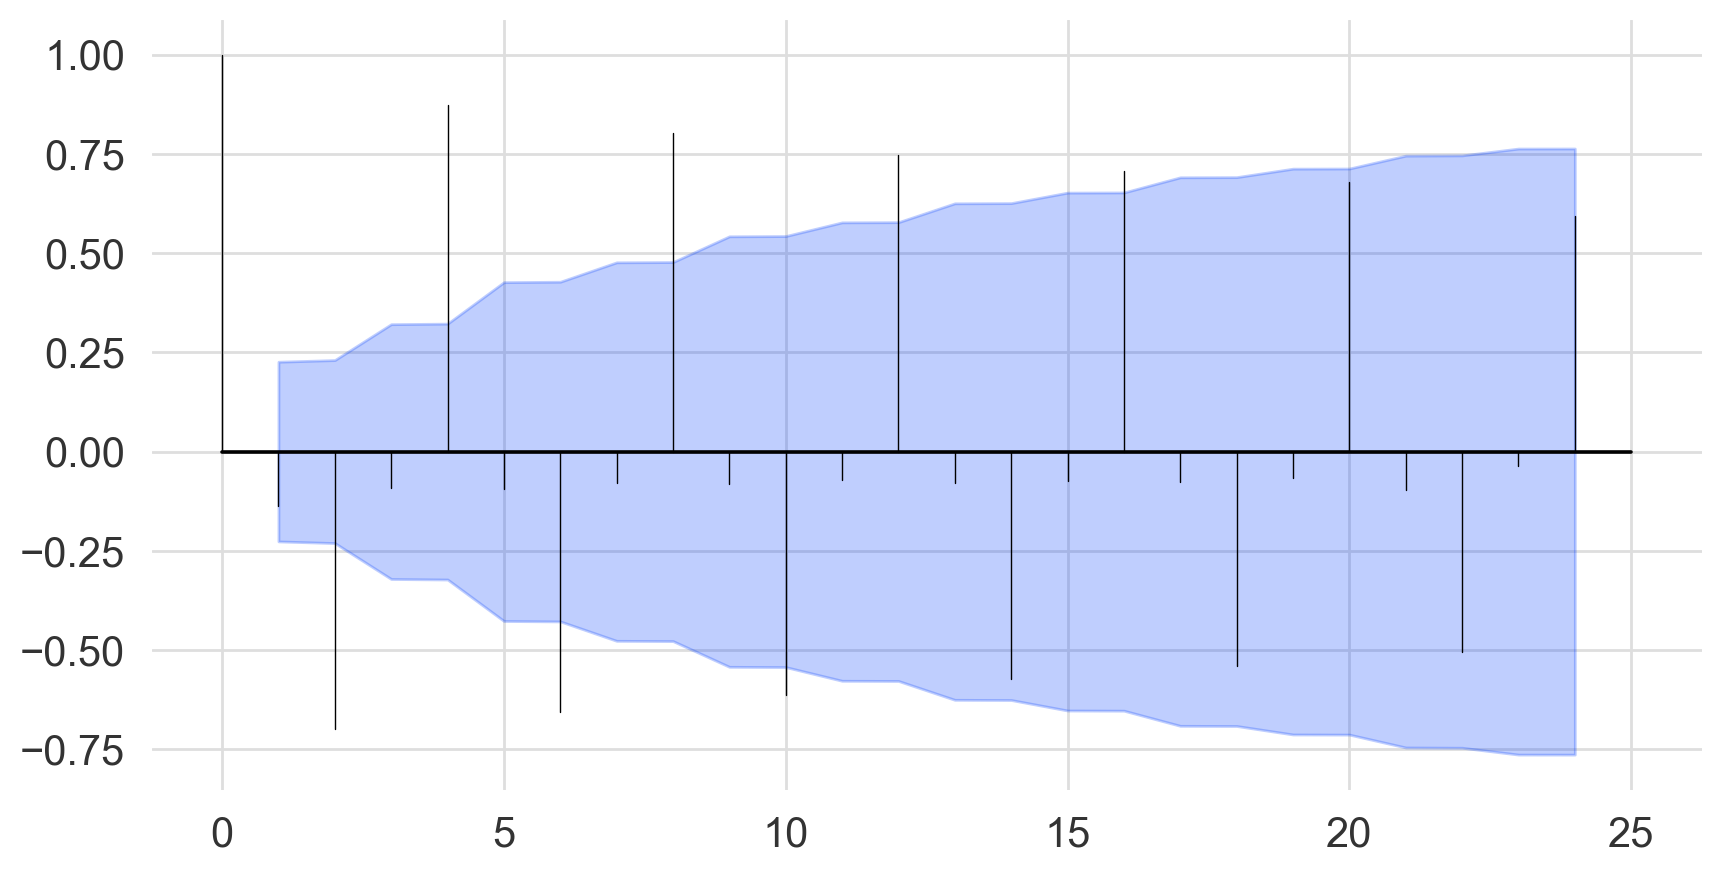

In [88]:
plot_acf(beer_dataset_diff)

In [ ]:
# s = 4

In [91]:
beer_dataset_sdiff = beer_dataset.diff(4)

<Axes: xlabel='date'>

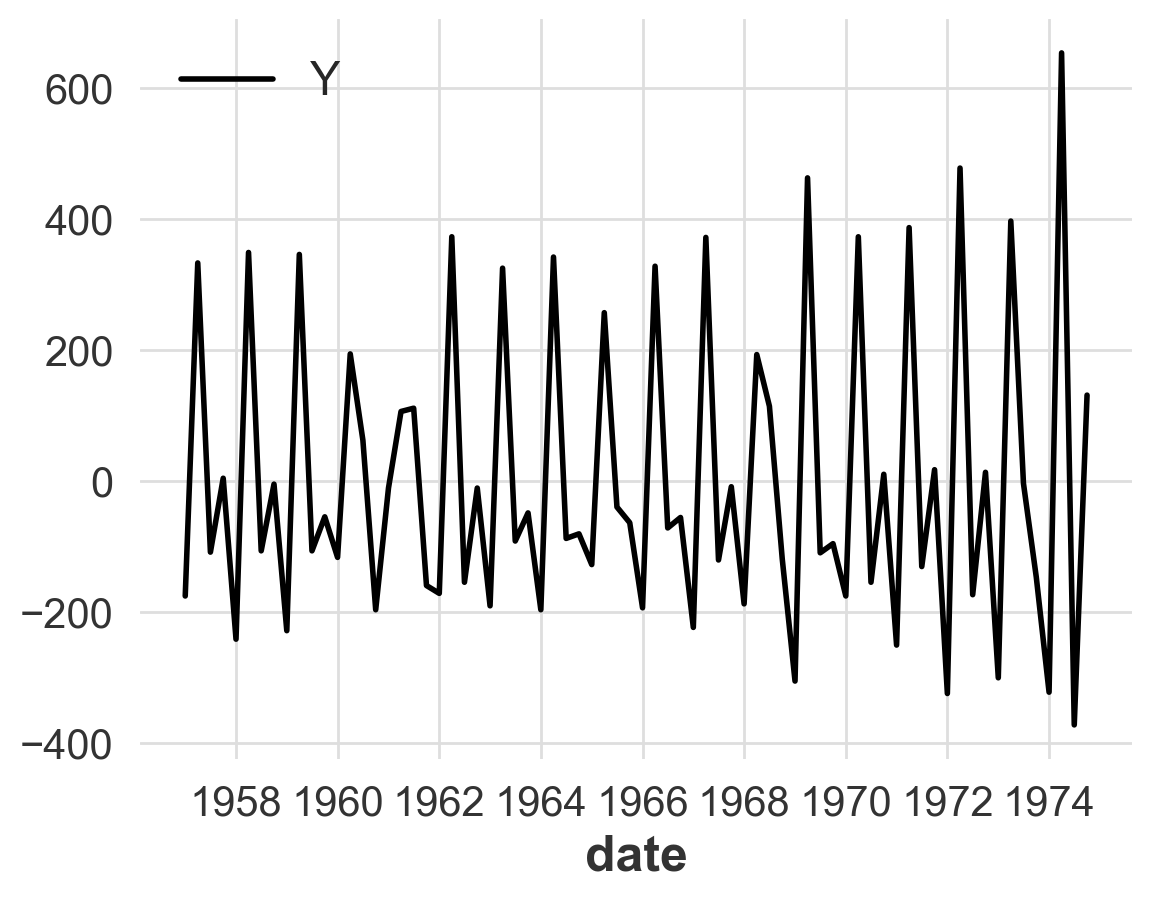

In [92]:
beer_dataset_sdiff.plot()

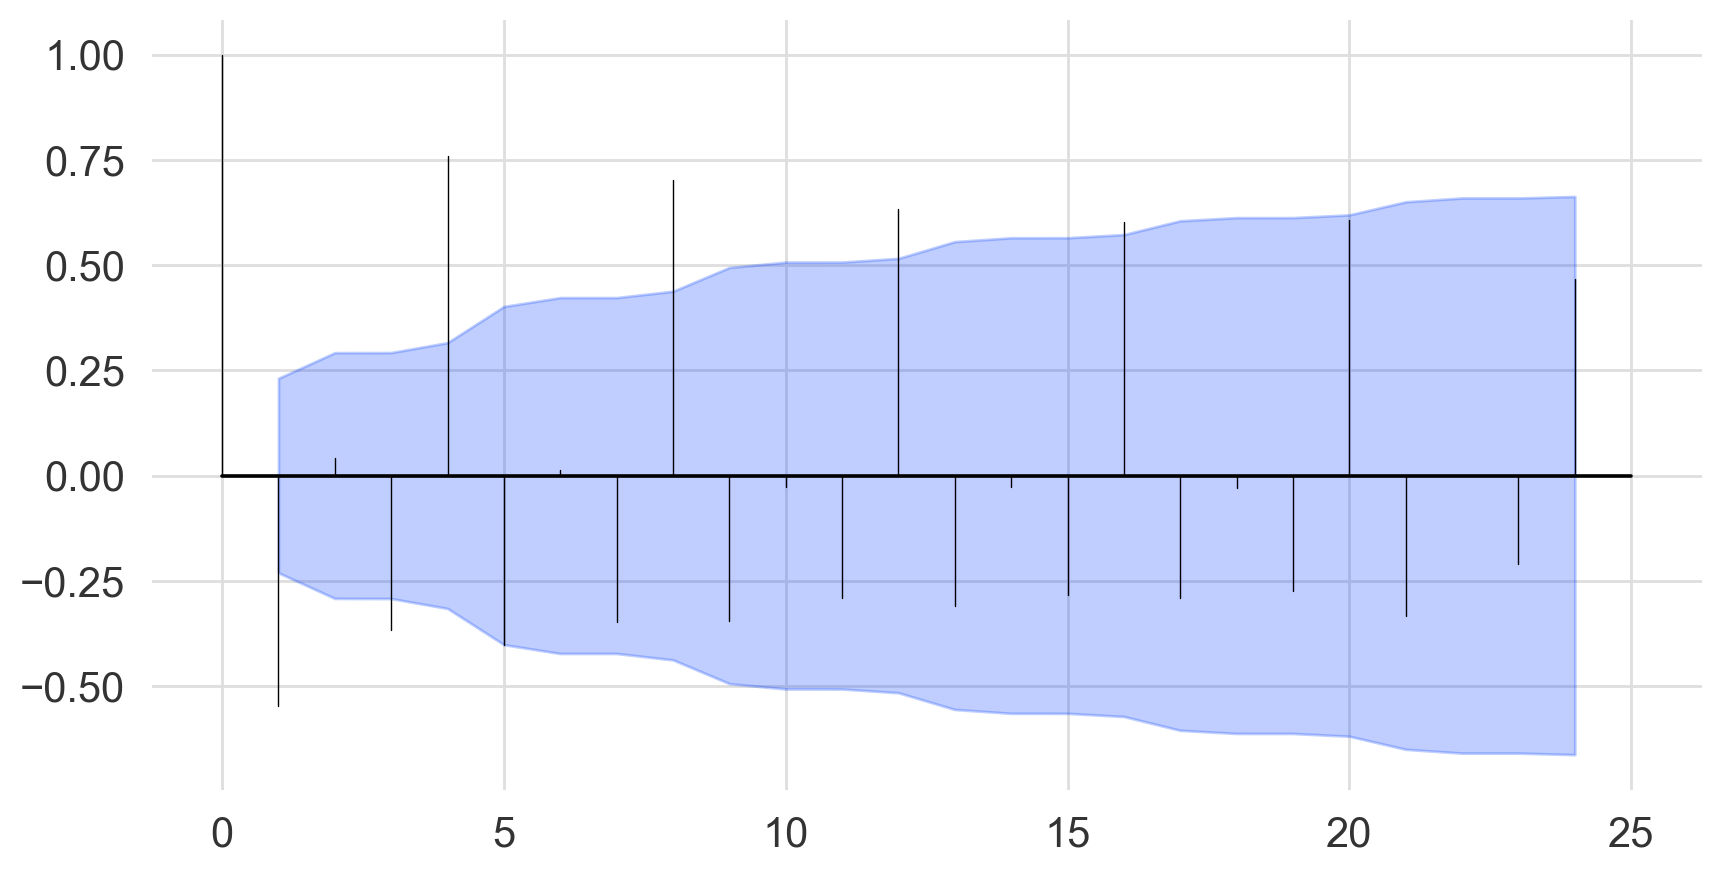

In [93]:
plot_acf(beer_dataset_sdiff)

In [ ]:
# Q = 1
# q = 1

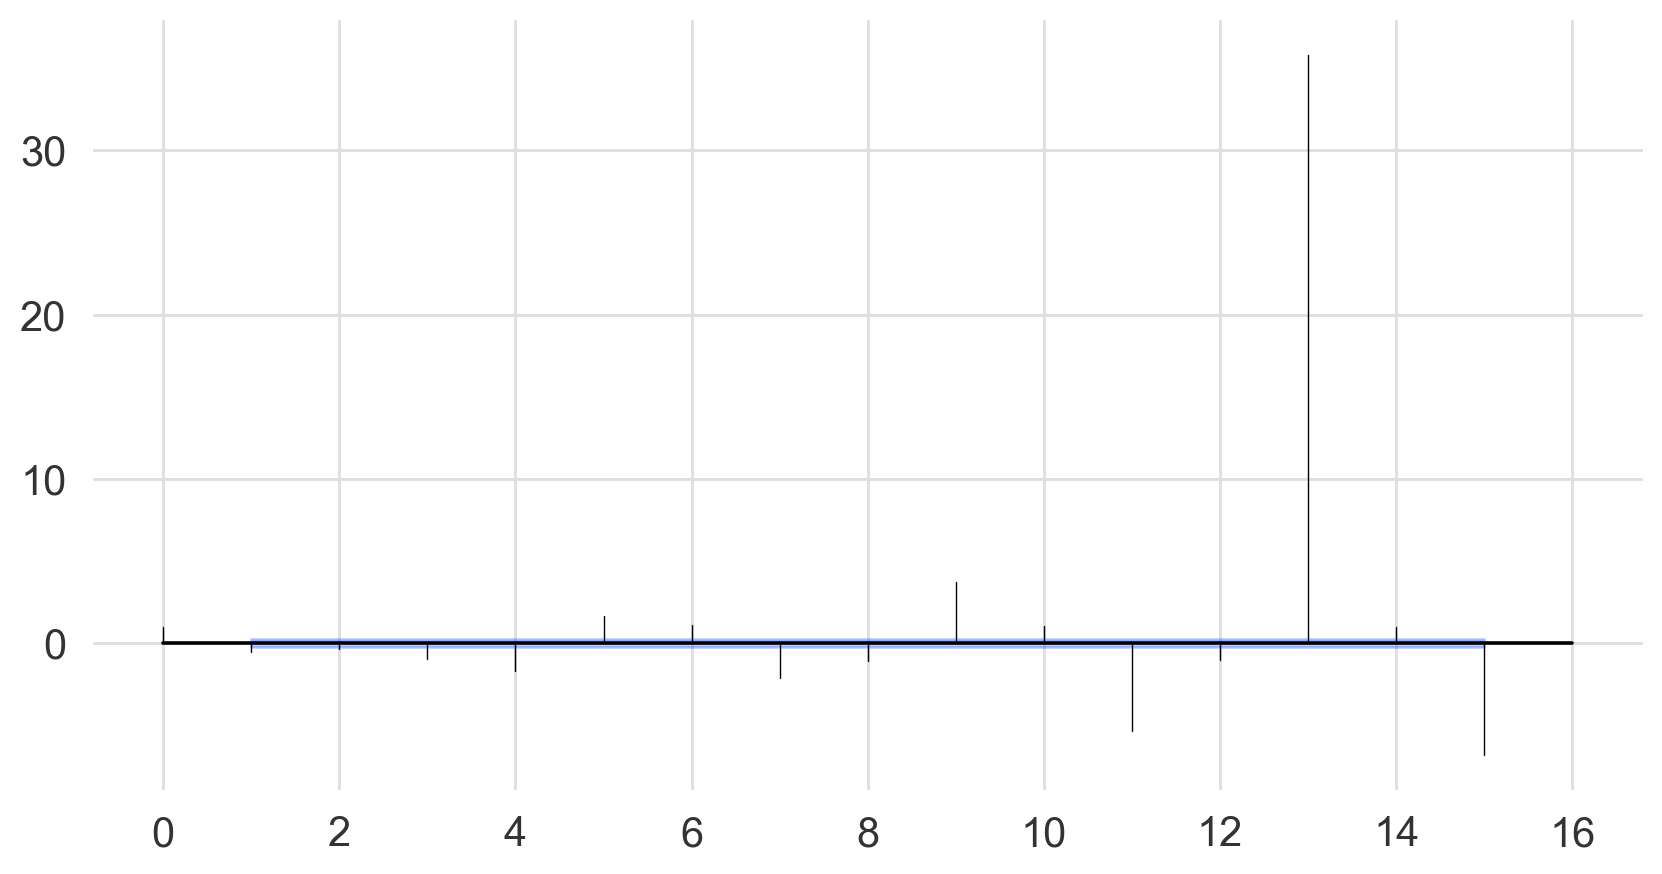

In [101]:
plot_pacf(beer_dataset_sdiff, max_lag=15)

In [ ]:
# P = 0

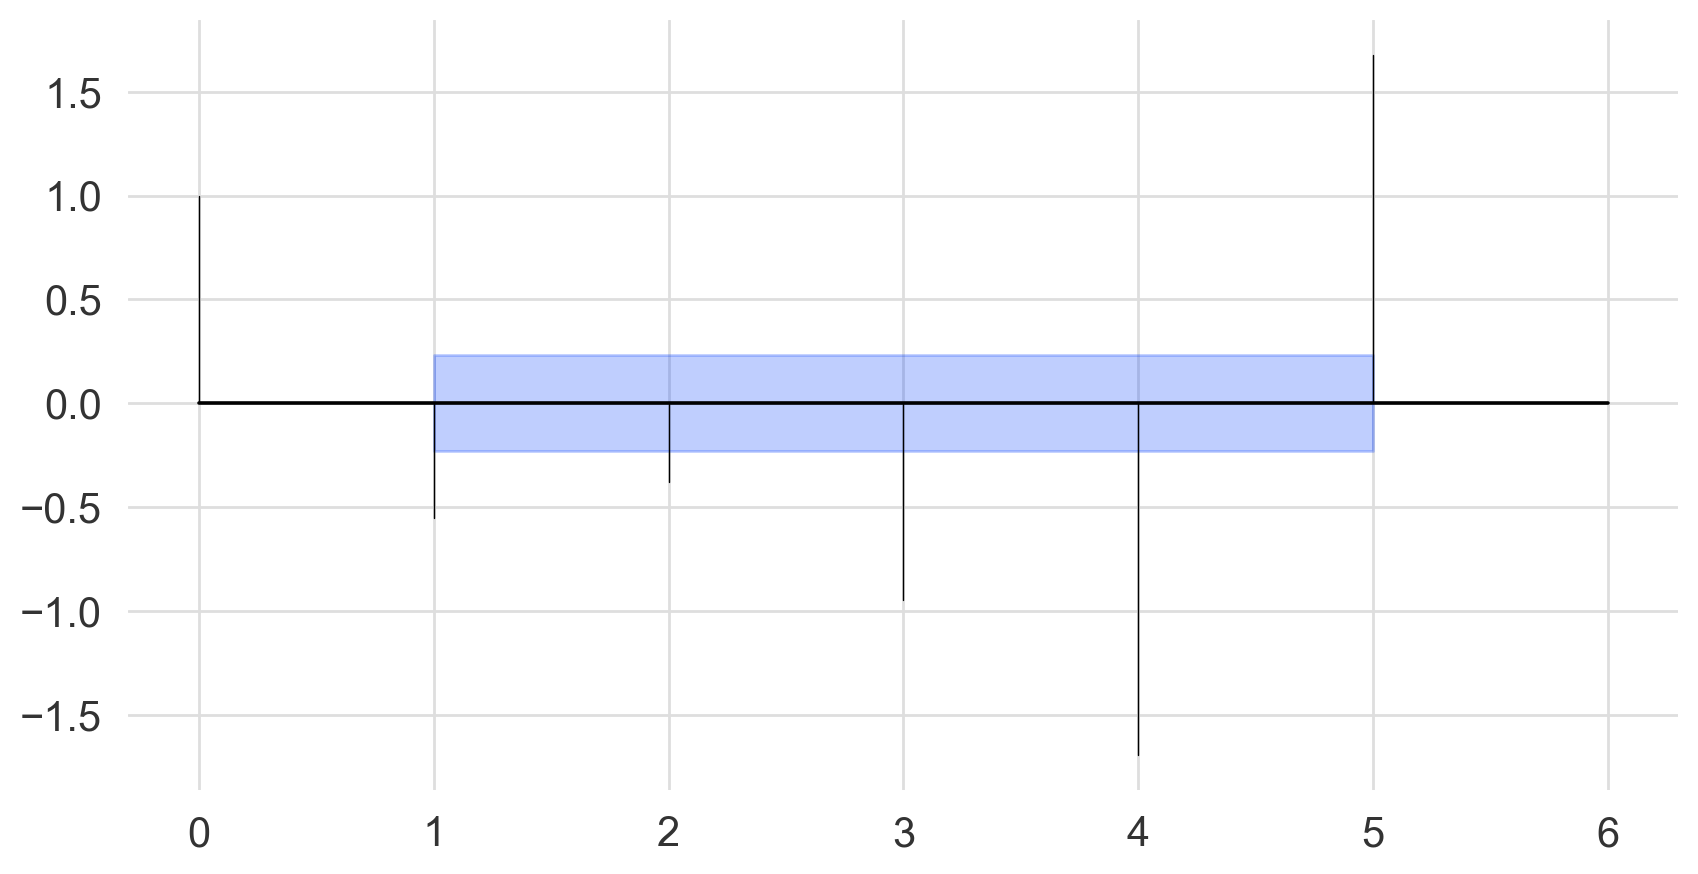

In [98]:
plot_pacf(beer_dataset_sdiff, max_lag=5)

In [ ]:
# p = 1

In [ ]:
# ARIMA(1, 0, 1)x(0, 1, 1, 4)

In [102]:
model = ARIMA(p=1, d=0, q=1, seasonal_order=(0, 1, 1, 4))
model.fit(beer_dataset)

/Users/nstulov/miniconda3/envs/msai/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/nstulov/miniconda3/envs/msai/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(p=1, d=0, q=1, seasonal_order=(0, 1, 1, 4), trend=None, random_state=None, add_encoders=None)

In [103]:
fcast = model.historical_forecasts(
    beer_dataset, forecast_horizon=1, start_format="position", show_warnings=False
)

/Users/nstulov/miniconda3/envs/msai/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/nstulov/miniconda3/envs/msai/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


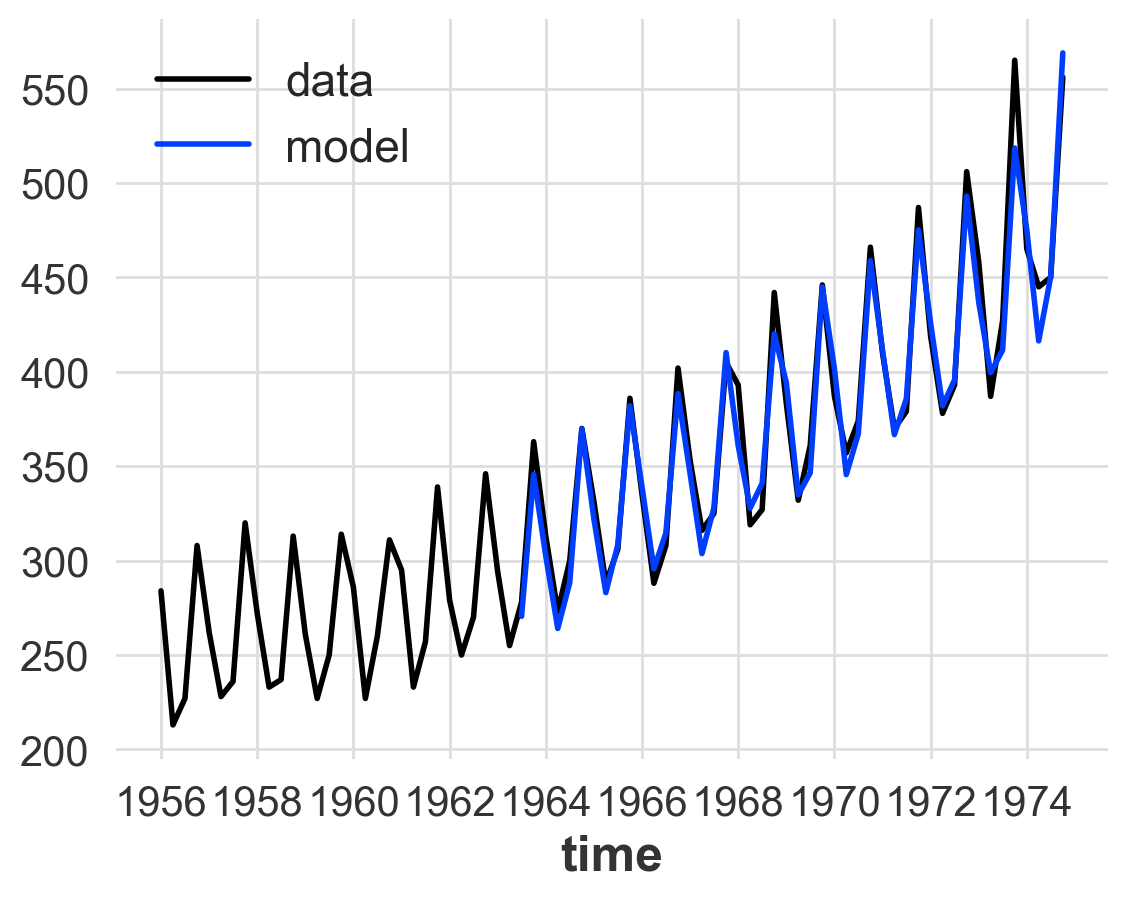

In [104]:
fig, ax = plt.subplots()
beer_dataset.plot(ax=ax, label="data")
fcast.plot(ax=ax, label="model")
ax.legend();

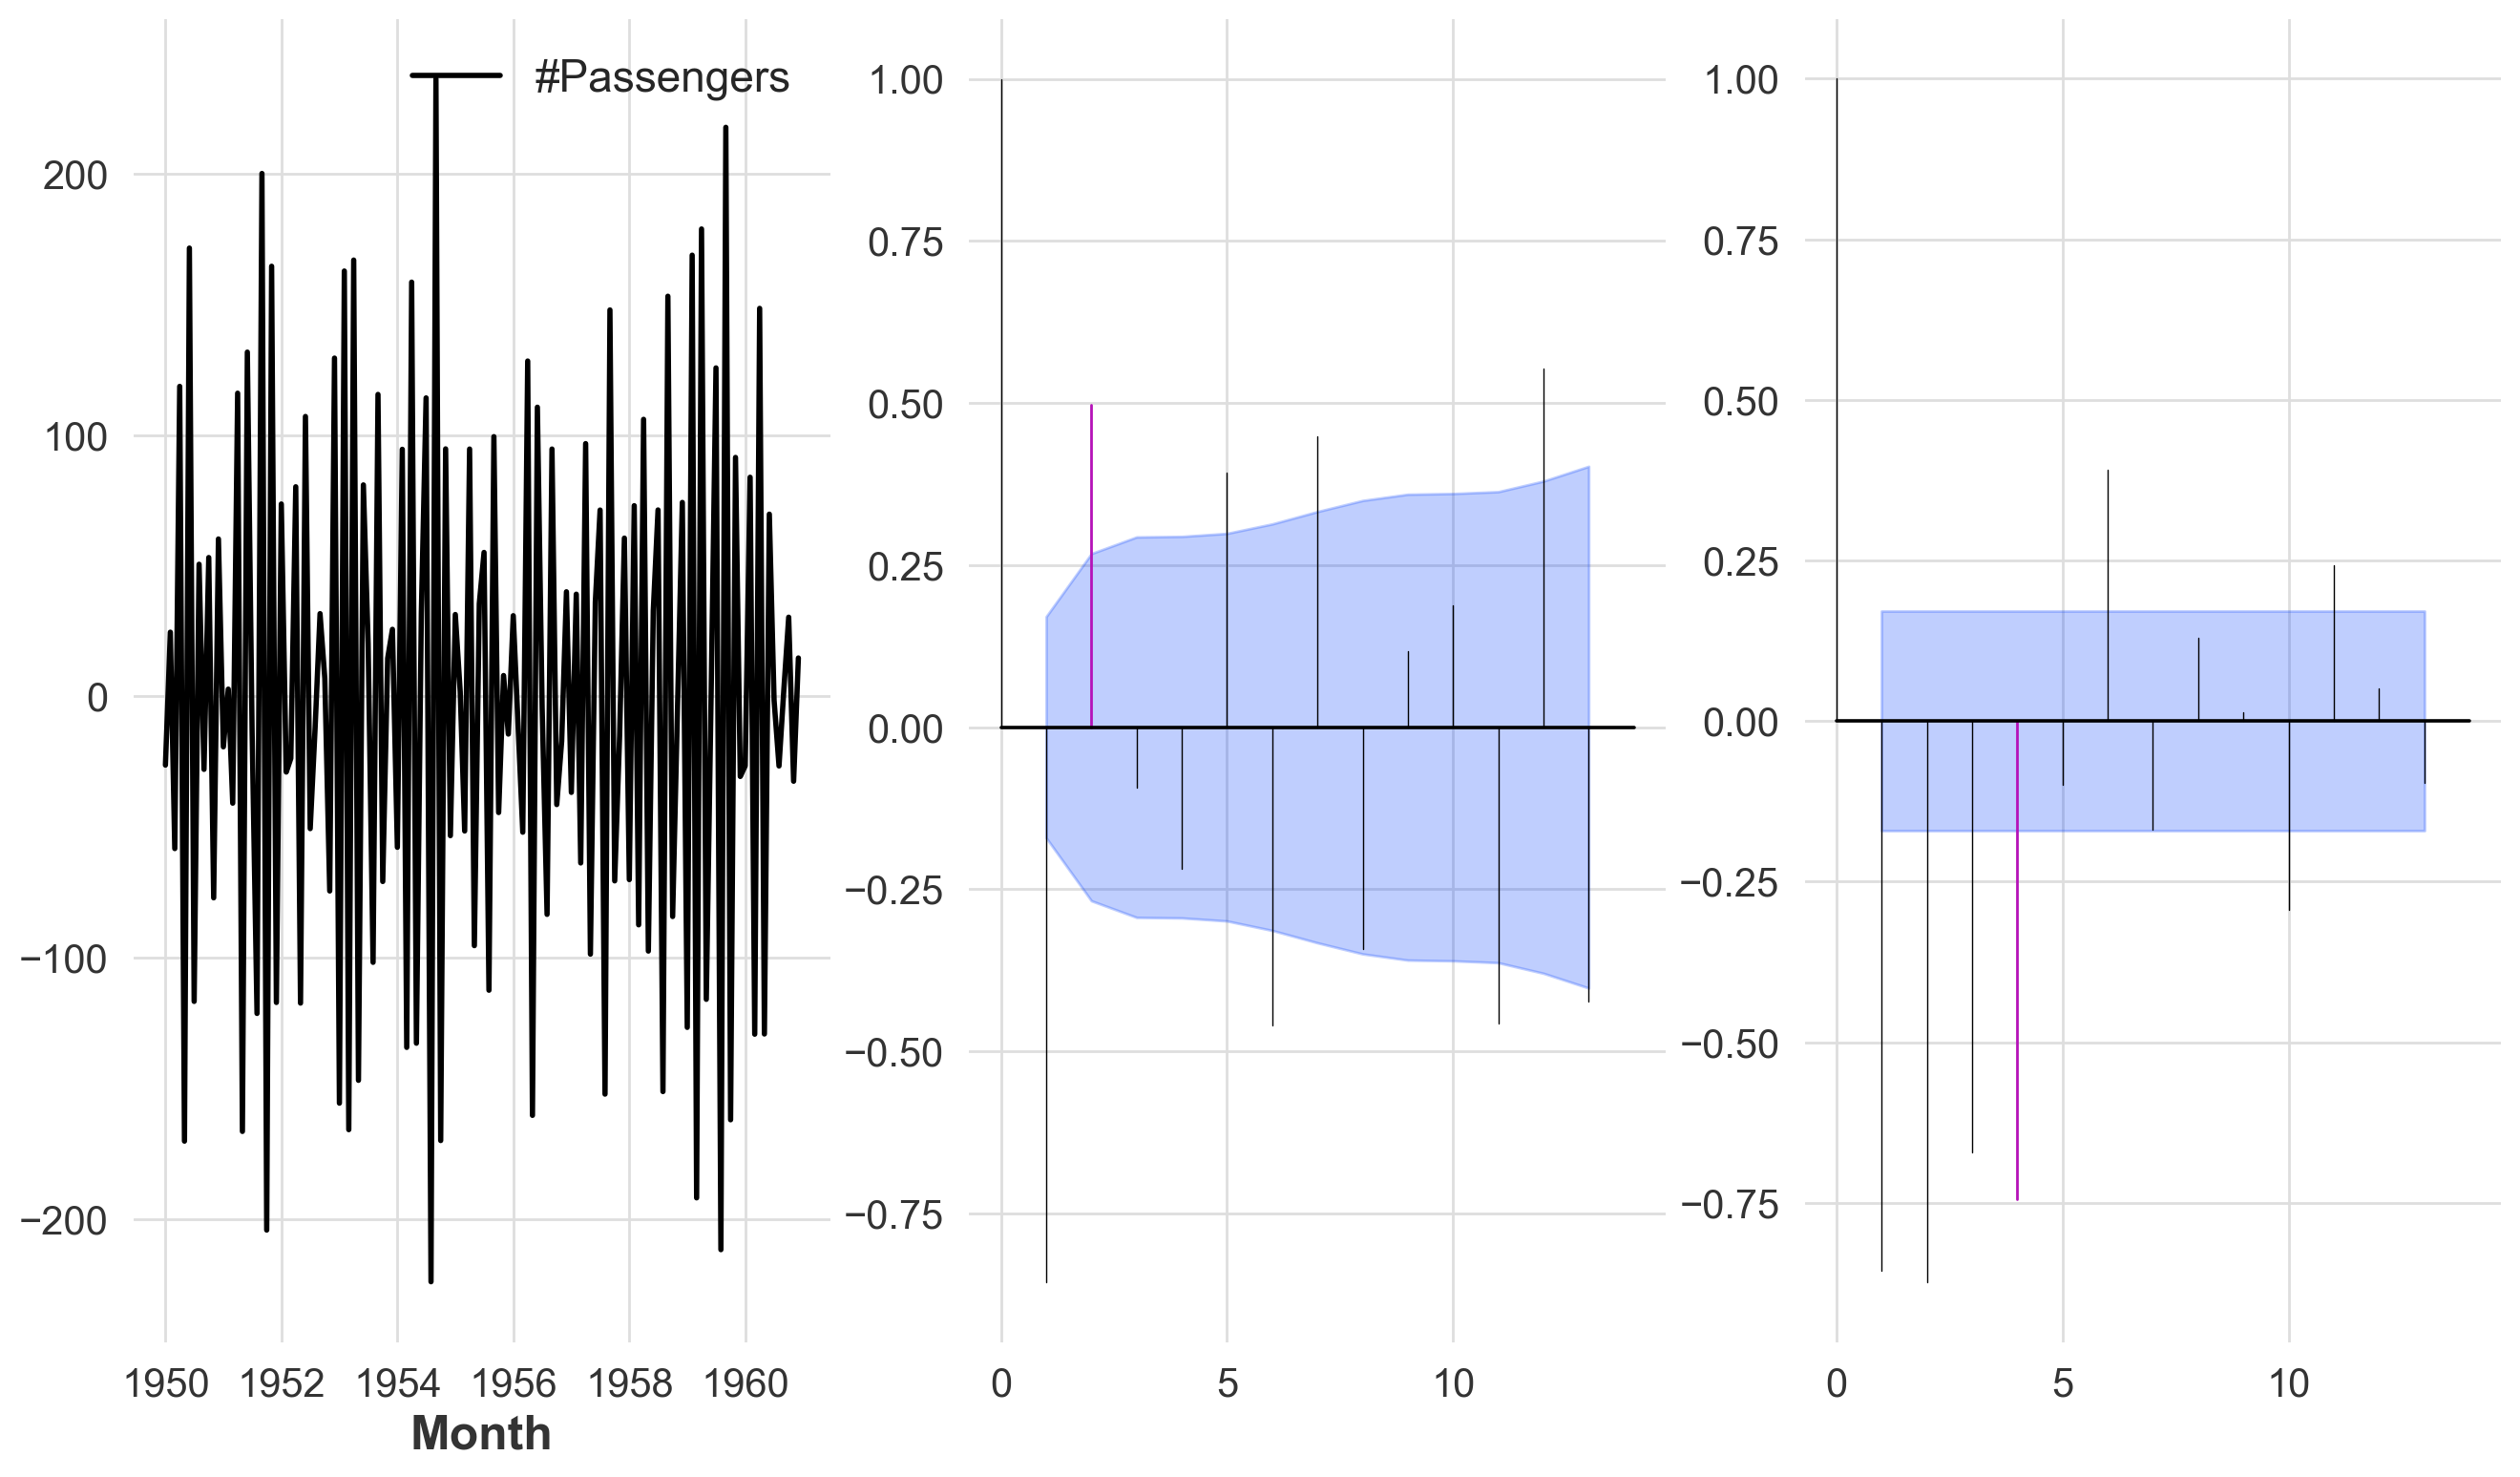

In [63]:
fig, ax = plt.subplots(1,3,figsize=(16,9))
air_pax_log_diff.plot(ax=ax[0])
plot_acf(air_pax_log_diff, axis=ax[1], max_lag=13, m=2) # q = 2
plot_pacf(air_pax_log_diff, axis=ax[2], max_lag=13, method="ywm", m=4) # p = 4
# SARIMA(4, 0, 2)x(0, 1, 0, S=12)

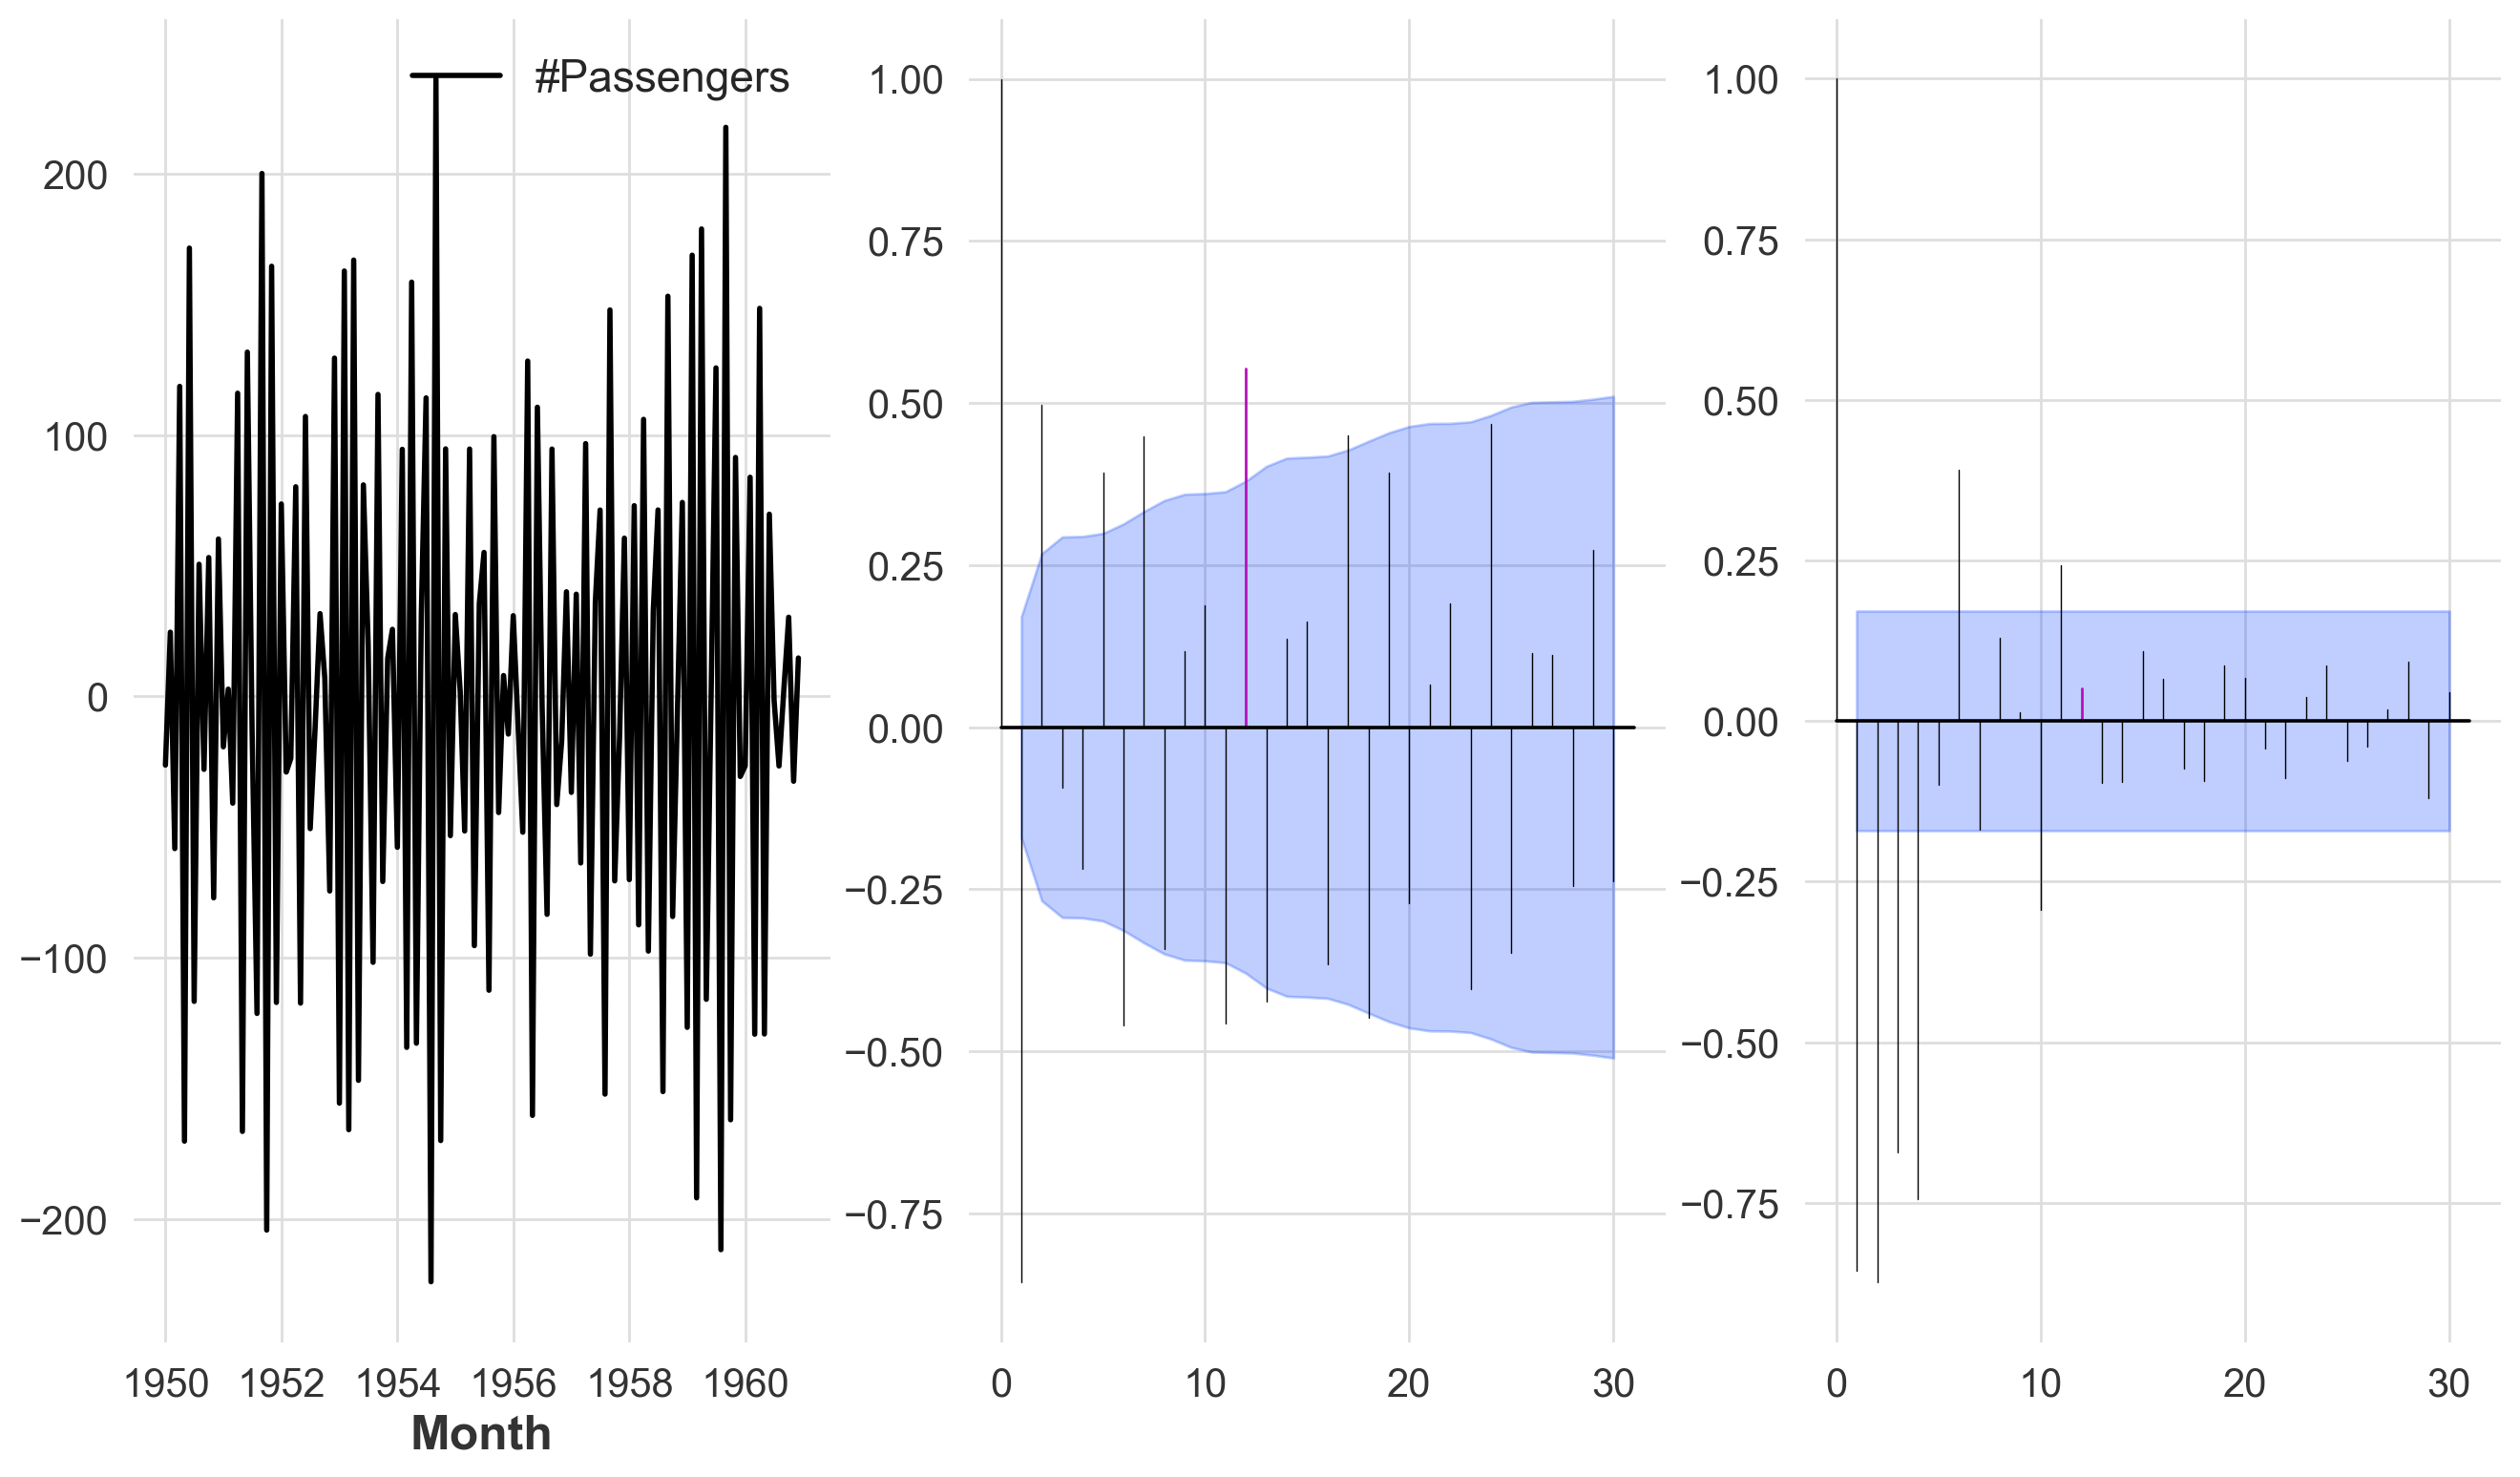

In [69]:
fig, ax = plt.subplots(1,3,figsize=(16,9))
air_pax_log_diff.plot(ax=ax[0])
plot_acf(air_pax_log_diff, axis=ax[1], max_lag=30, m=12) # Q = 1
plot_pacf(air_pax_log_diff, axis=ax[2], max_lag=30, method="ywm", m=12) # P = 0
# SARIMA(4, 0, 2)x(0, 1, 1, S=12)

In [70]:
from darts.models import ARIMA

In [106]:
model = ARIMA(p=1, d=0, q=2, seasonal_order=(0, 1, 1, 12))
model.fit(air_pax_log)
fcast = model.historical_forecasts(
    air_pax_log, forecast_horizon=1, start_format="position", show_warnings=False
)

/Users/nstulov/miniconda3/envs/msai/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/nstulov/miniconda3/envs/msai/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/nstulov/miniconda3/envs/msai/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/nstulov/miniconda3/envs/msai/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to conver

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots()
air_pax_log.plot(ax=ax, label="data")
fcast.plot(ax=ax, label="model")
ax.legend();

In [75]:
resid = air_pax_log[fcast.start_time():] - fcast

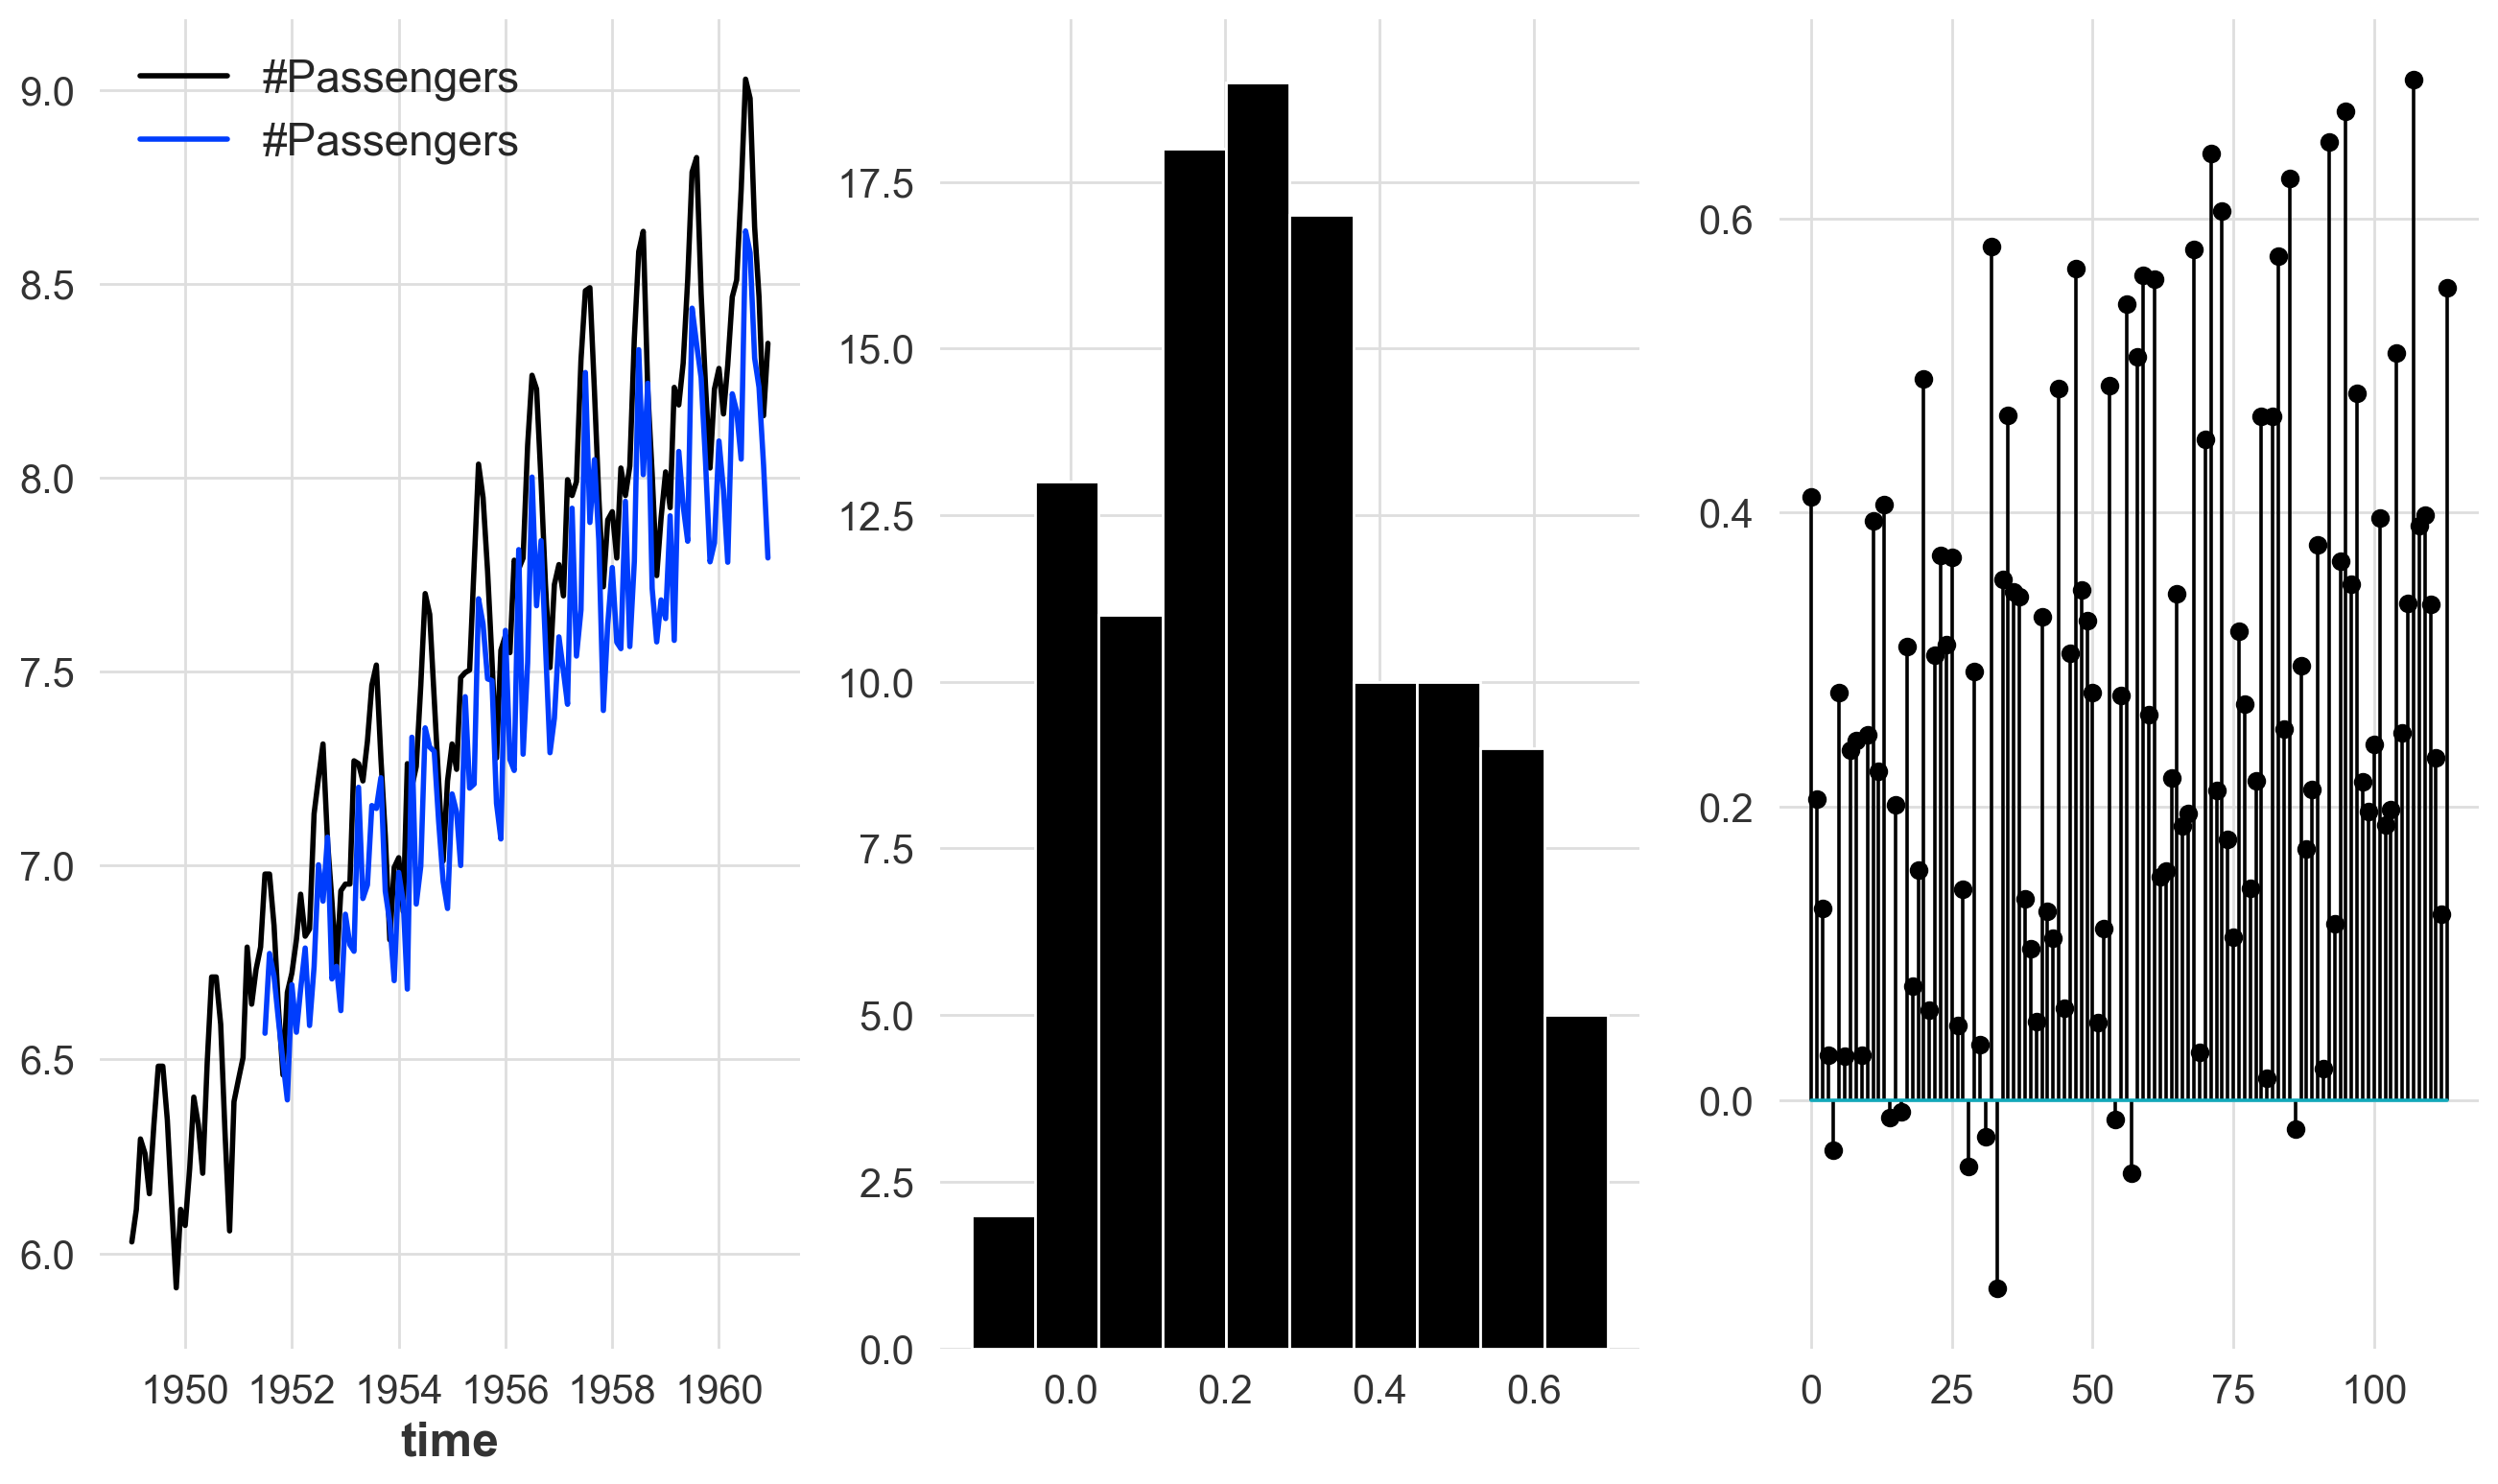

In [76]:
fig, ax = plt.subplots(1,3,figsize=(16,9))
air_pax_log.plot(ax=ax[0]);
fcast.plot(ax=ax[0]);
ax[1].hist(resid.values());
ax[2].stem(resid.values());

## Necessary properties of residuals: unbiasedness

In [16]:
from darts.models import ARIMA

/Users/nstulov/miniconda3/envs/msai/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
biased_model = ARIMA(p=0, d=0, q=2, seasonal_order=(0, 0, 0, 0))
fcast = biased_model.historical_forecasts(
    air_pax, forecast_horizon=1, start_format="position", show_warnings=False
)
resid = air_pax[fcast.start_time():] - fcast

/Users/nstulov/miniconda3/envs/msai/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/nstulov/miniconda3/envs/msai/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


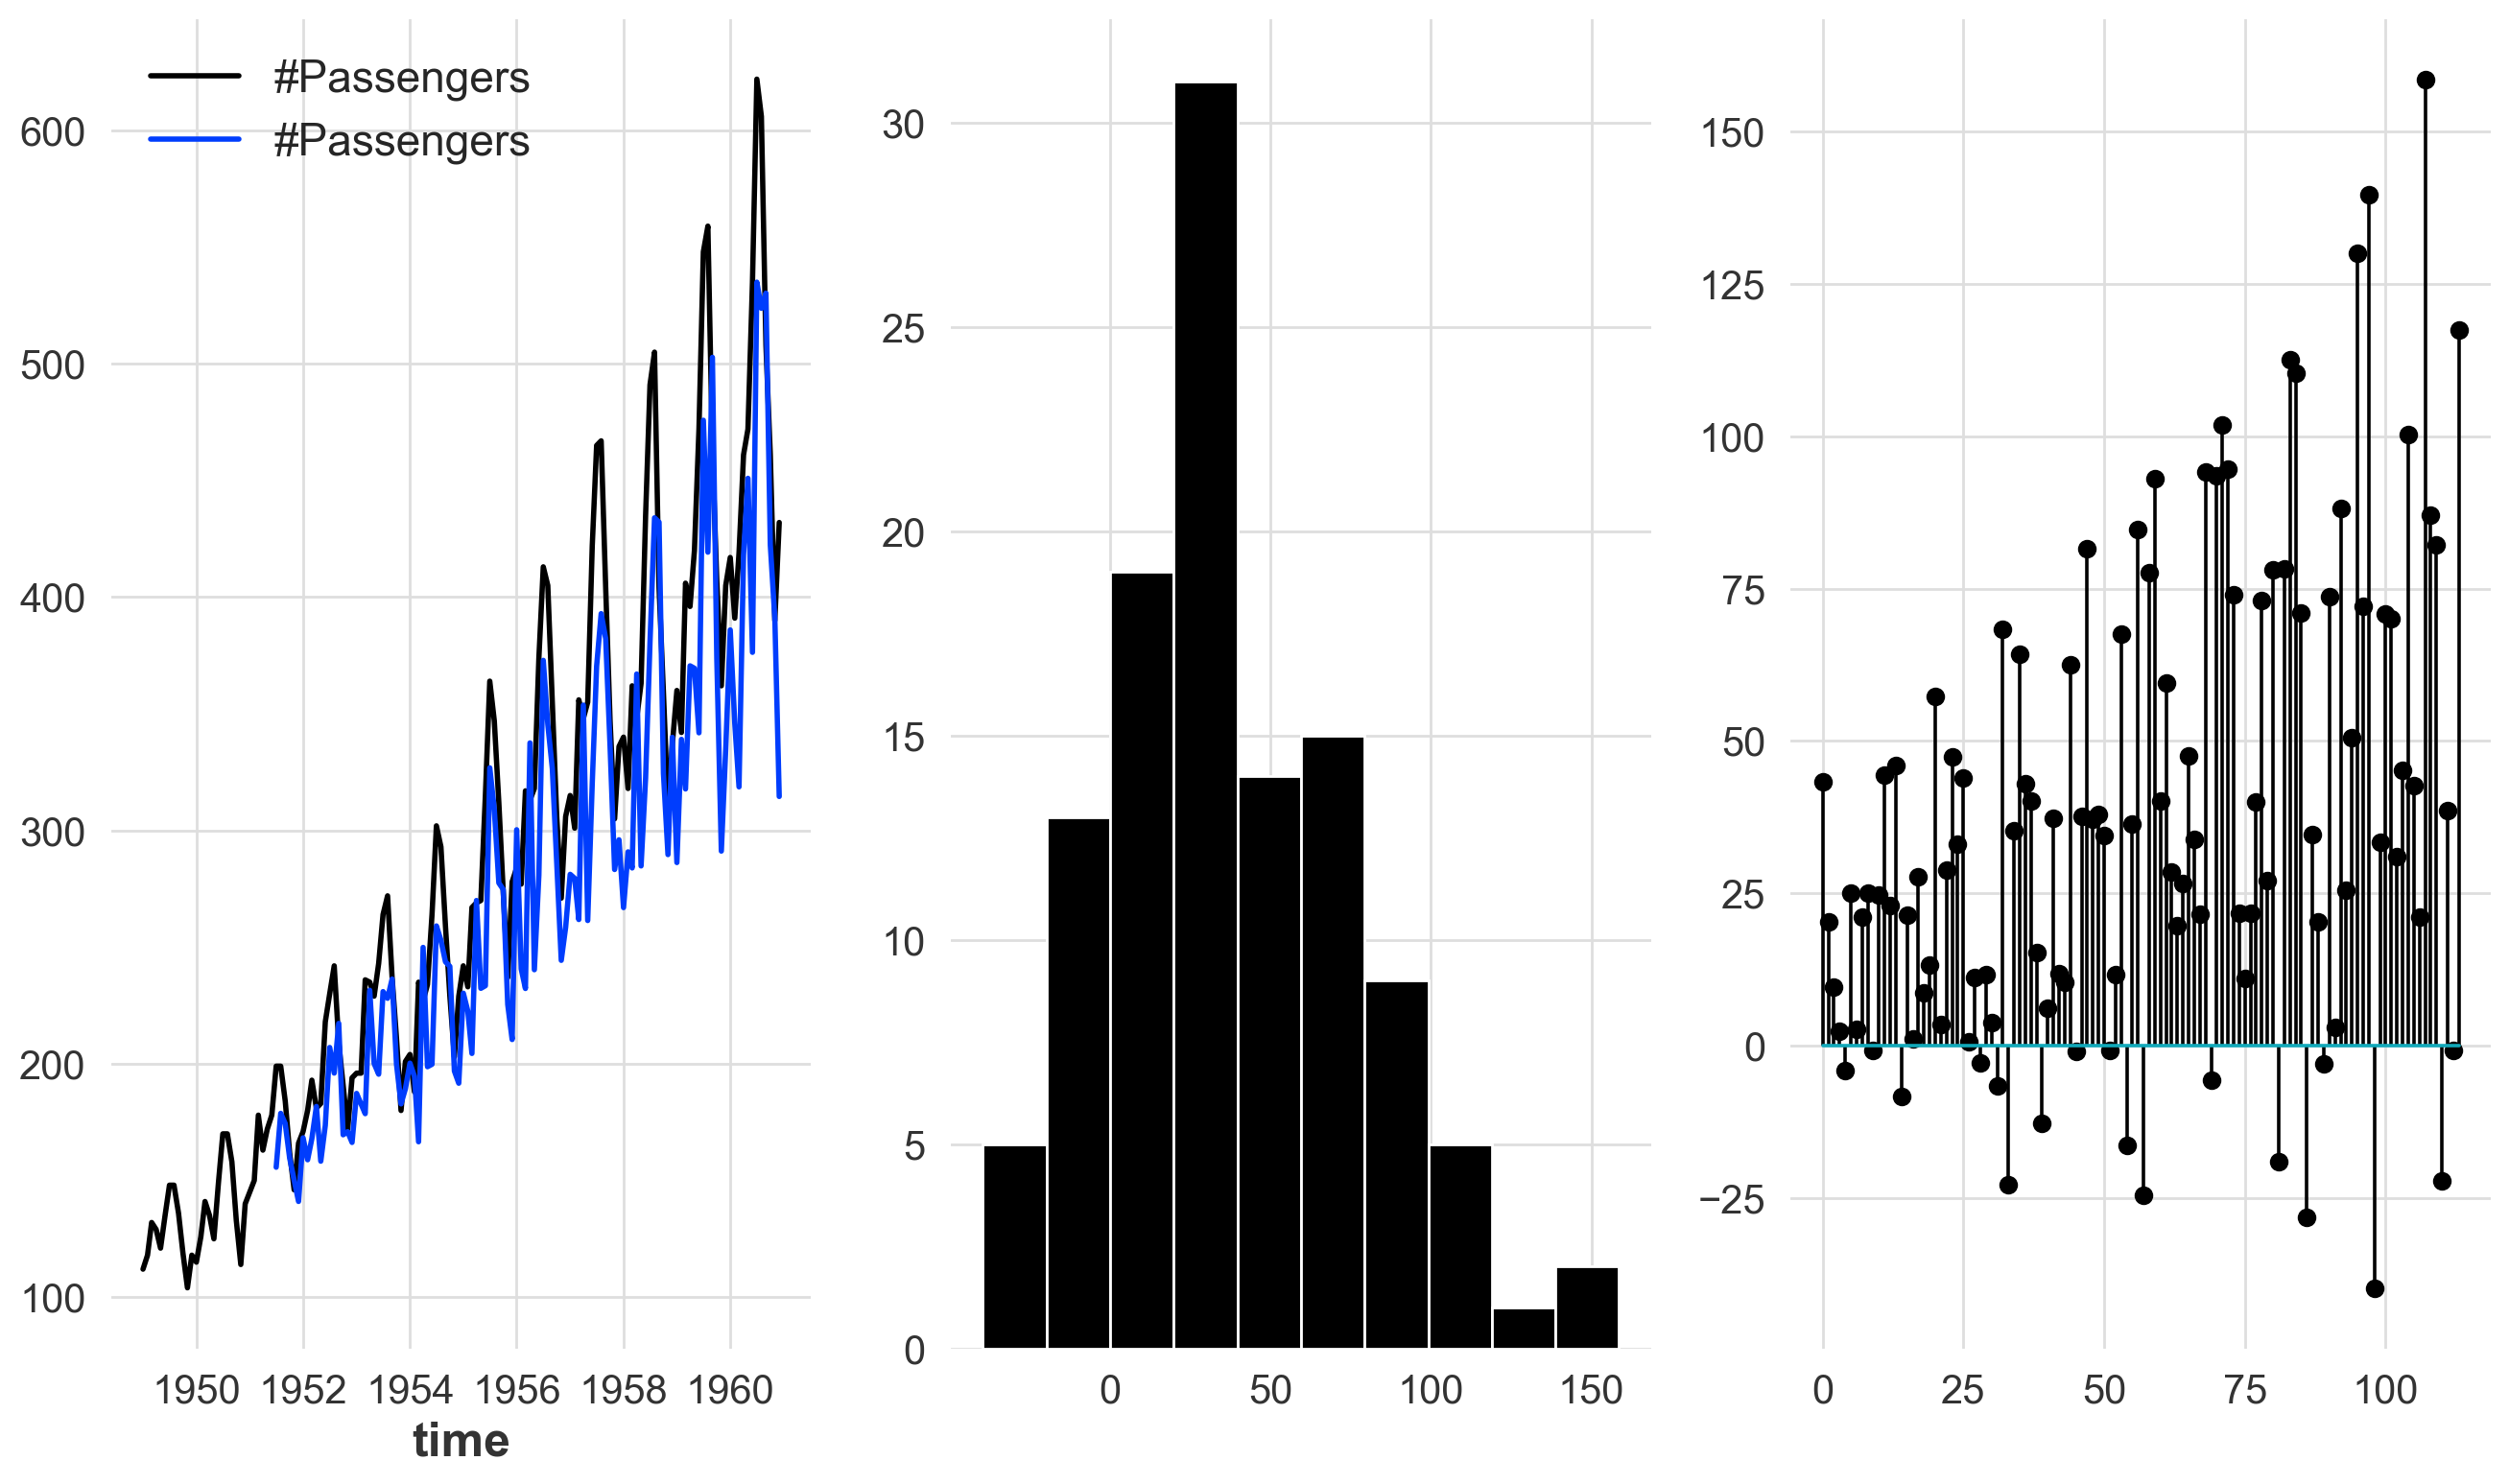

In [18]:
fig, ax = plt.subplots(1,3,figsize=(16,9))
air_pax.plot(ax=ax[0]);
fcast.plot(ax=ax[0]);
ax[1].hist(resid.values());
ax[2].stem(resid.values());

In [19]:
pvalue = sts.ttest_1samp(resid.values(), 0).pvalue
rejected = pvalue < 0.05
print("zero mean" if not rejected else "non-zero mean")

non-zero mean


## Necessary properties of residuals: stationarity

In [20]:
unst_model = ARIMA(p=0, d=0, q=1, seasonal_order=(0, 0, 0, 0))
fcast = unst_model.historical_forecasts(
    air_pax, forecast_horizon=1, start_format="position", show_warnings=False
)
resid = air_pax[fcast.start_time():] - fcast

/Users/nstulov/miniconda3/envs/msai/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


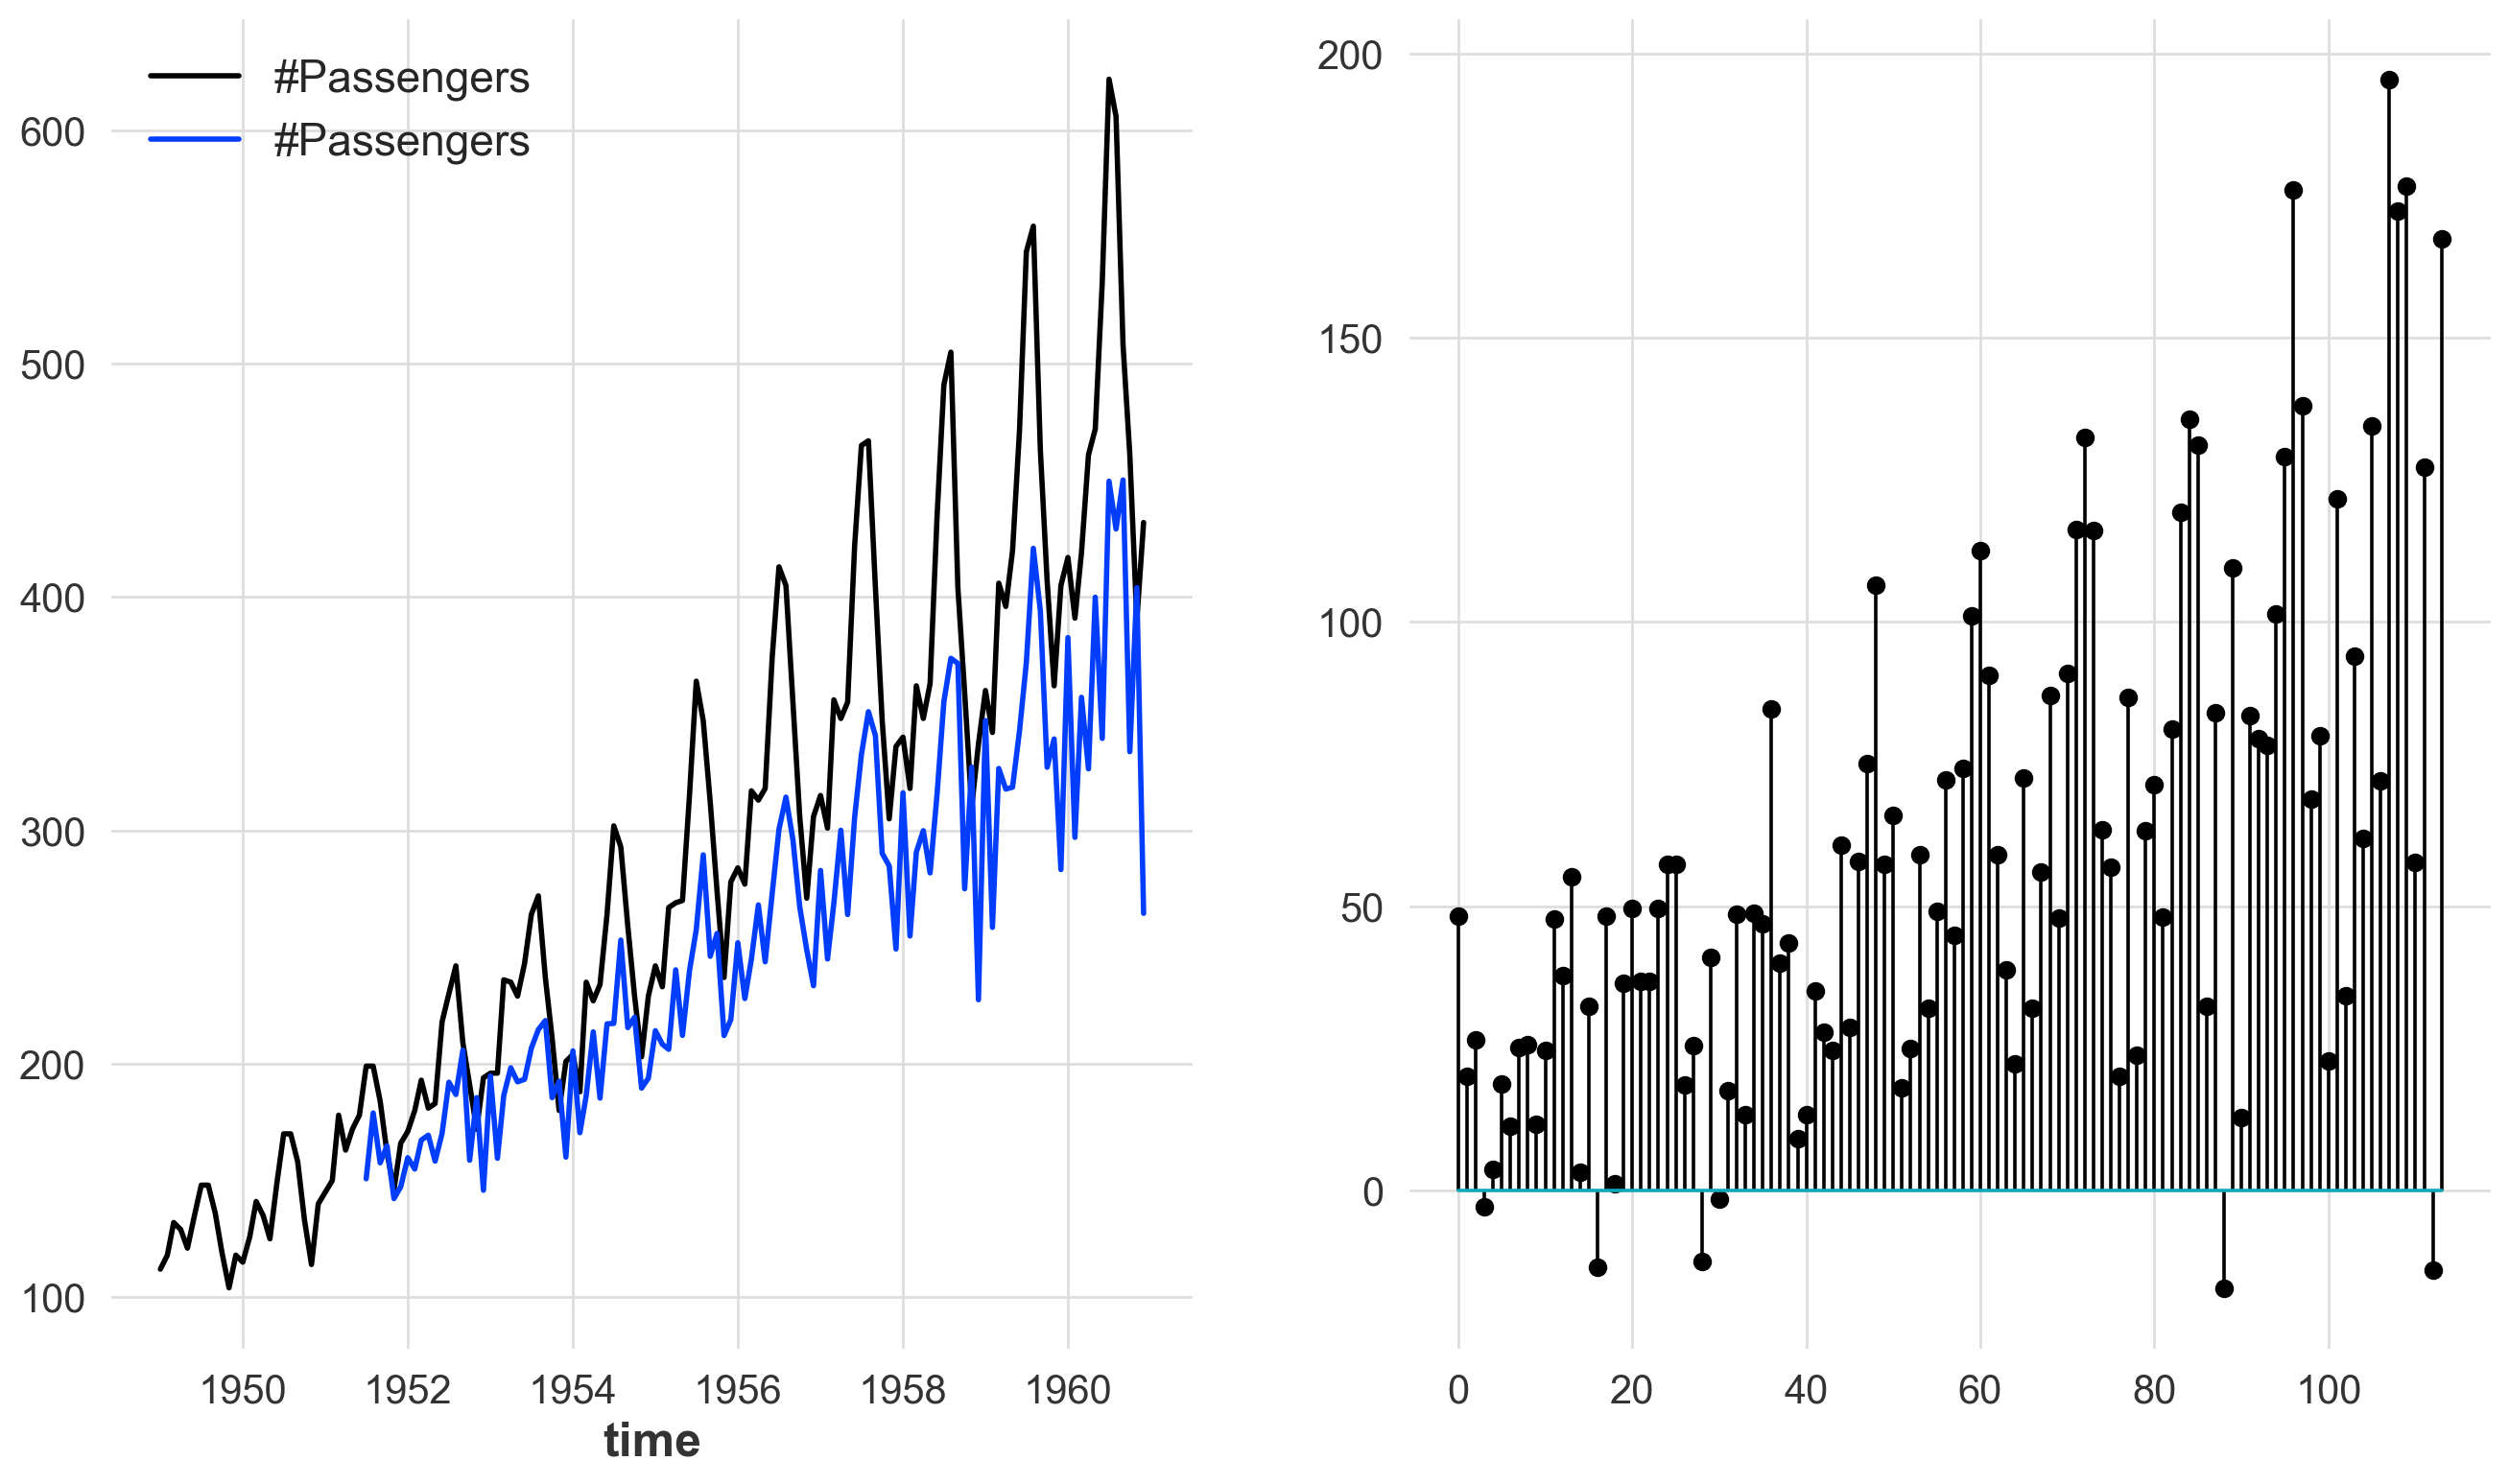

In [21]:
fig, ax = plt.subplots(1,2,figsize=(16,9))
air_pax.plot(ax=ax[0]);
fcast.plot(ax=ax[0]);
ax[1].stem(resid.values());

In [22]:
pvalue = tsa.stattools.kpss(resid.values())[1]
rejected = pvalue < 0.05
print("stationary" if not rejected else "non-stationary")

non-stationary


/var/folders/33/j0cl7y453td68qb96j7bqcj4cf41kc/T/ipykernel_823/2228572355.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  pvalue = tsa.stattools.kpss(resid.values())[1]


## Necessary properties of residuals: uncorrelatedness

In [23]:
corr_model = ARIMA(p=1, d=0, q=0, seasonal_order=(0, 0, 0, 0))
fcast = corr_model.historical_forecasts(
    air_pax, forecast_horizon=1, start_format="position", show_warnings=False
)
resid = air_pax[fcast.start_time():] - fcast

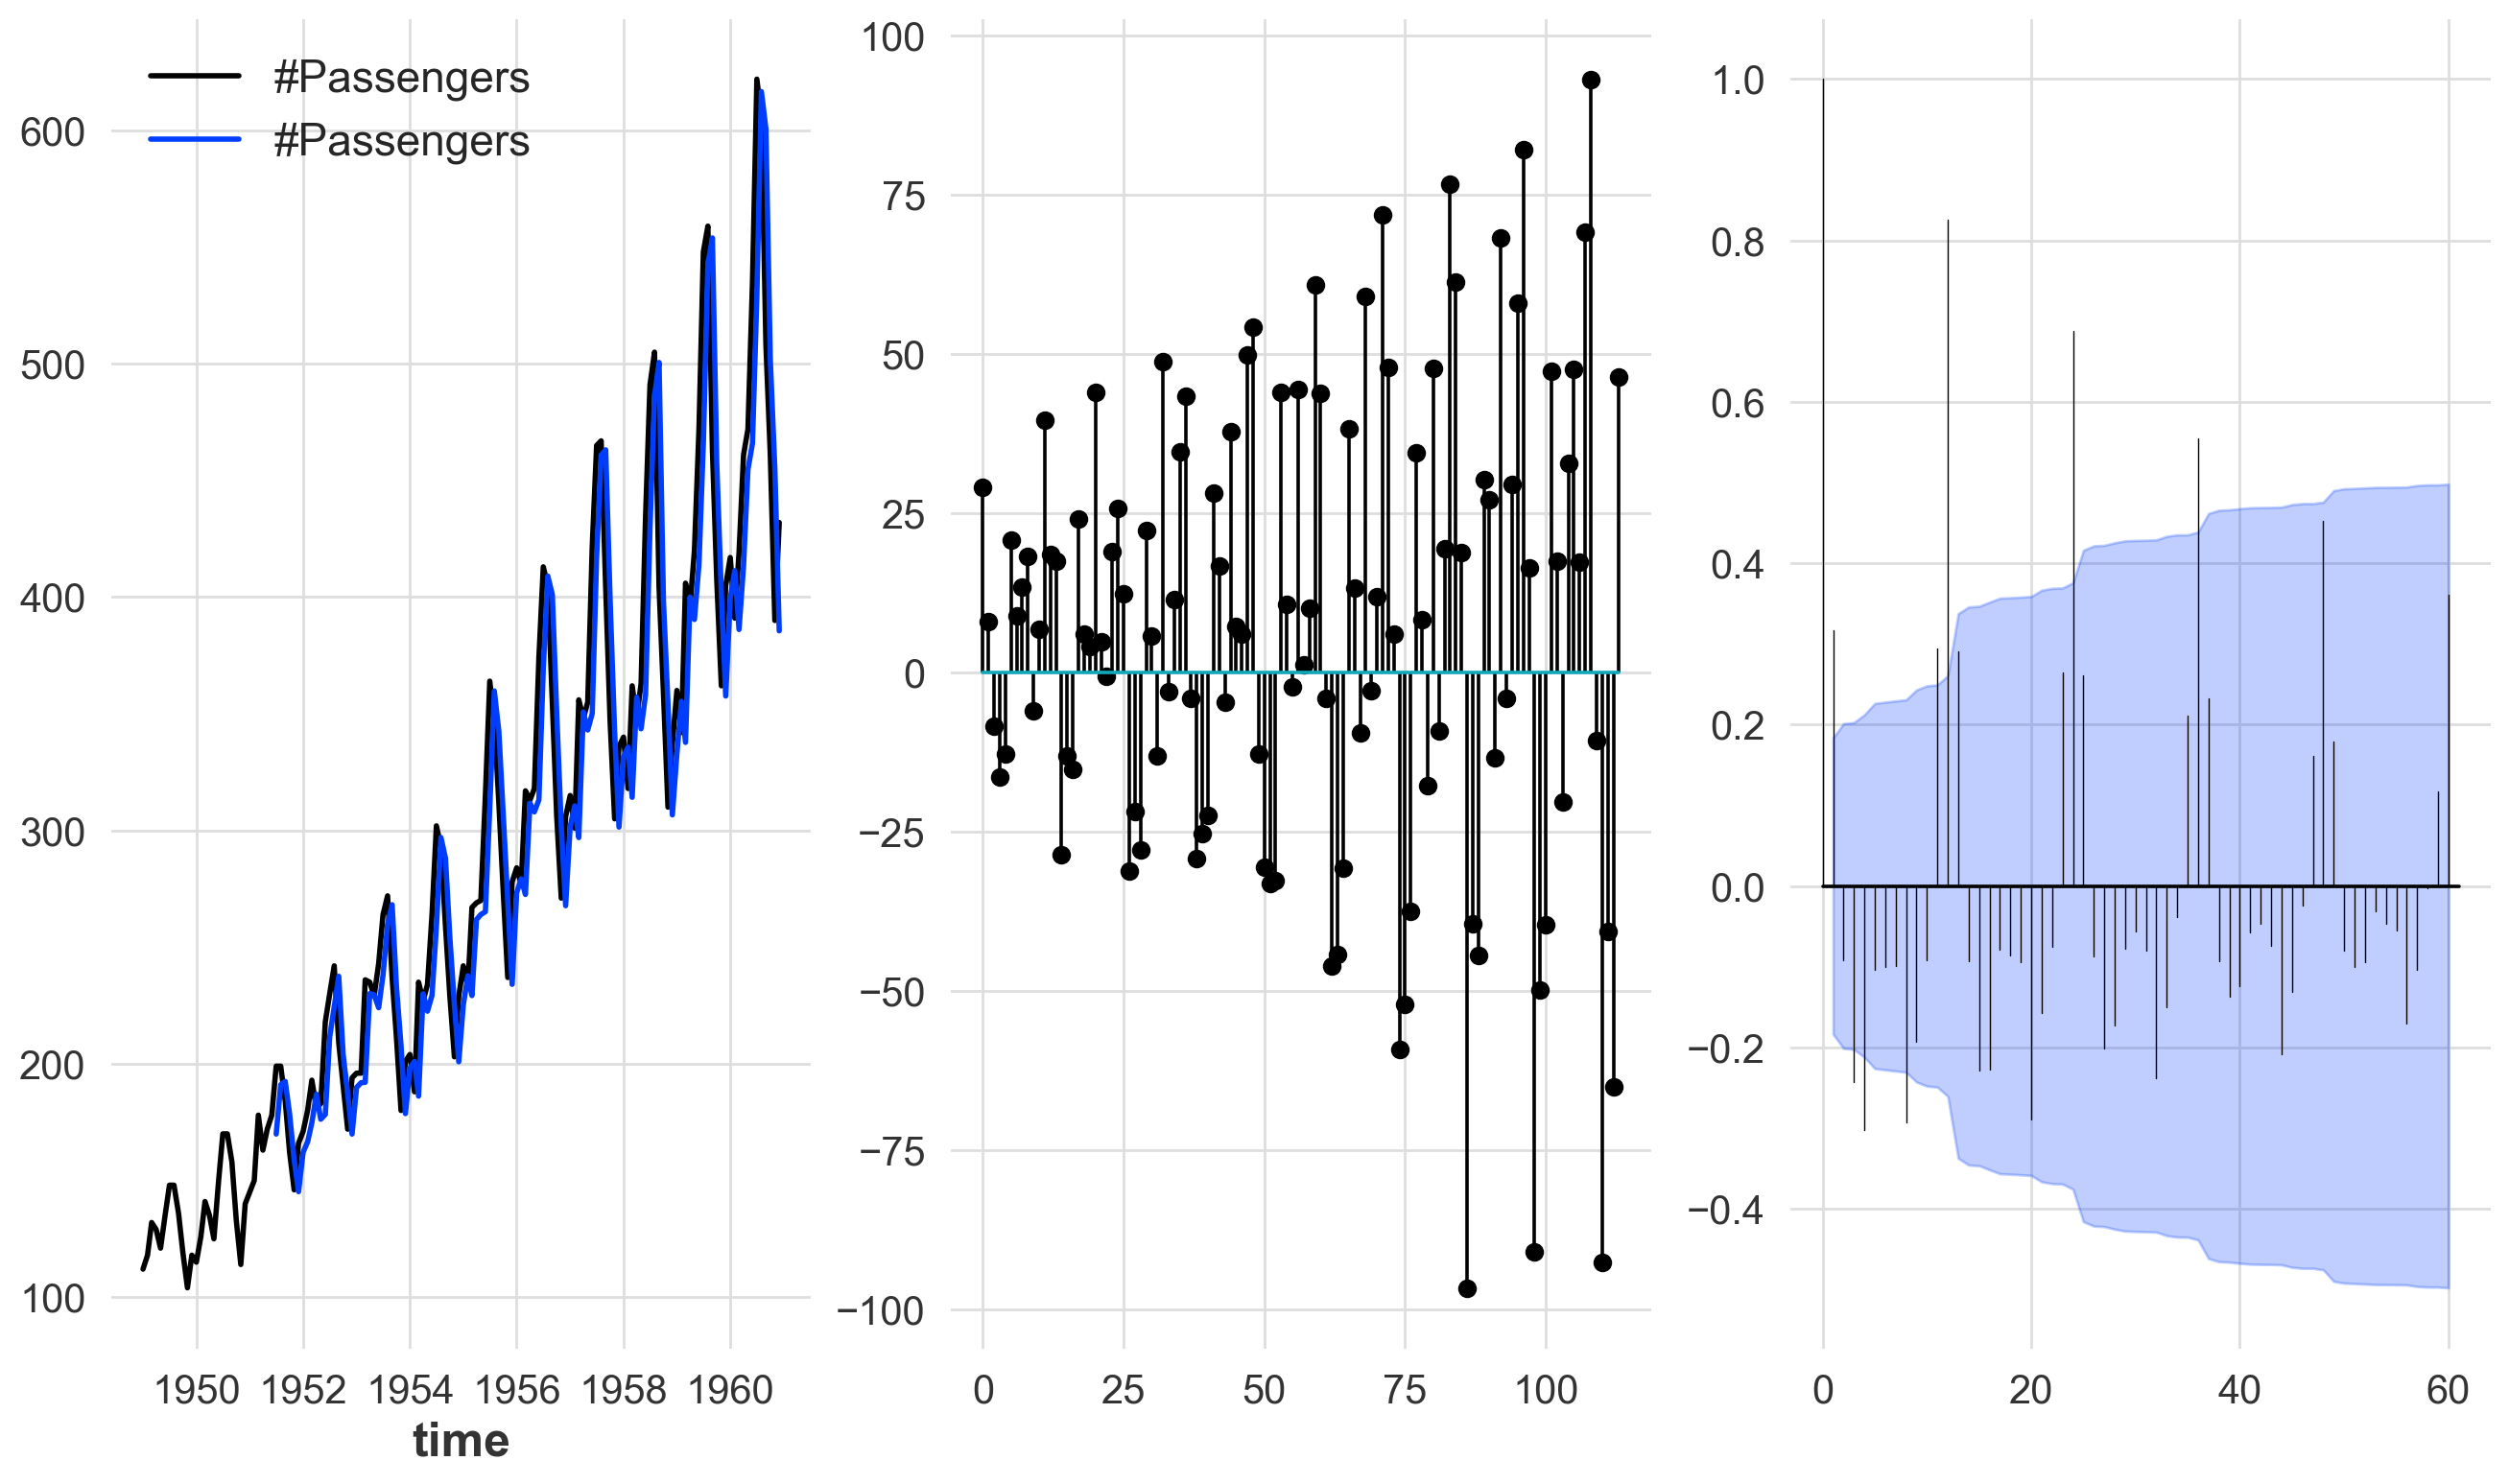

In [24]:
fig, ax = plt.subplots(1,3,figsize=(16,9))
air_pax.plot(ax=ax[0]);
fcast.plot(ax=ax[0]);
ax[1].stem(resid.values());
plot_acf(resid, max_lag=12*5, axis=ax[2])

In [25]:
sts.ttest_1samp(resid.values(), 0).pvalue

array([0.04967464])

In [26]:
tsa.stattools.kpss(resid.values())[1]

/var/folders/33/j0cl7y453td68qb96j7bqcj4cf41kc/T/ipykernel_823/3591776226.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  tsa.stattools.kpss(resid.values())[1]


0.1

In [27]:
sm.stats.acorr_ljungbox(resid.values(), model_df=1)["lb_pvalue"].max()
rejected = pvalue < 0.05
print("there is", "no autocorrelation" if not rejected else "autocorrelation")

there is autocorrelation


## Desired properties of residuals: normality

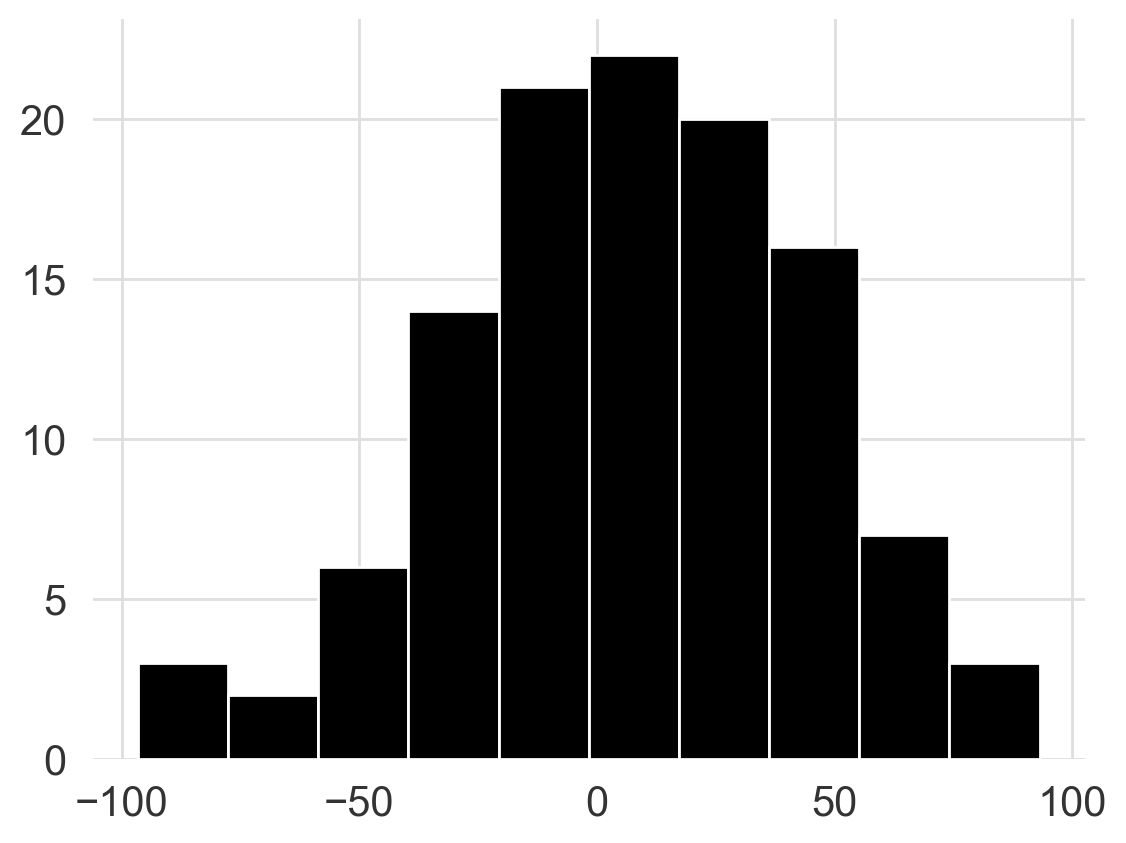

In [28]:
plt.hist(resid.values());

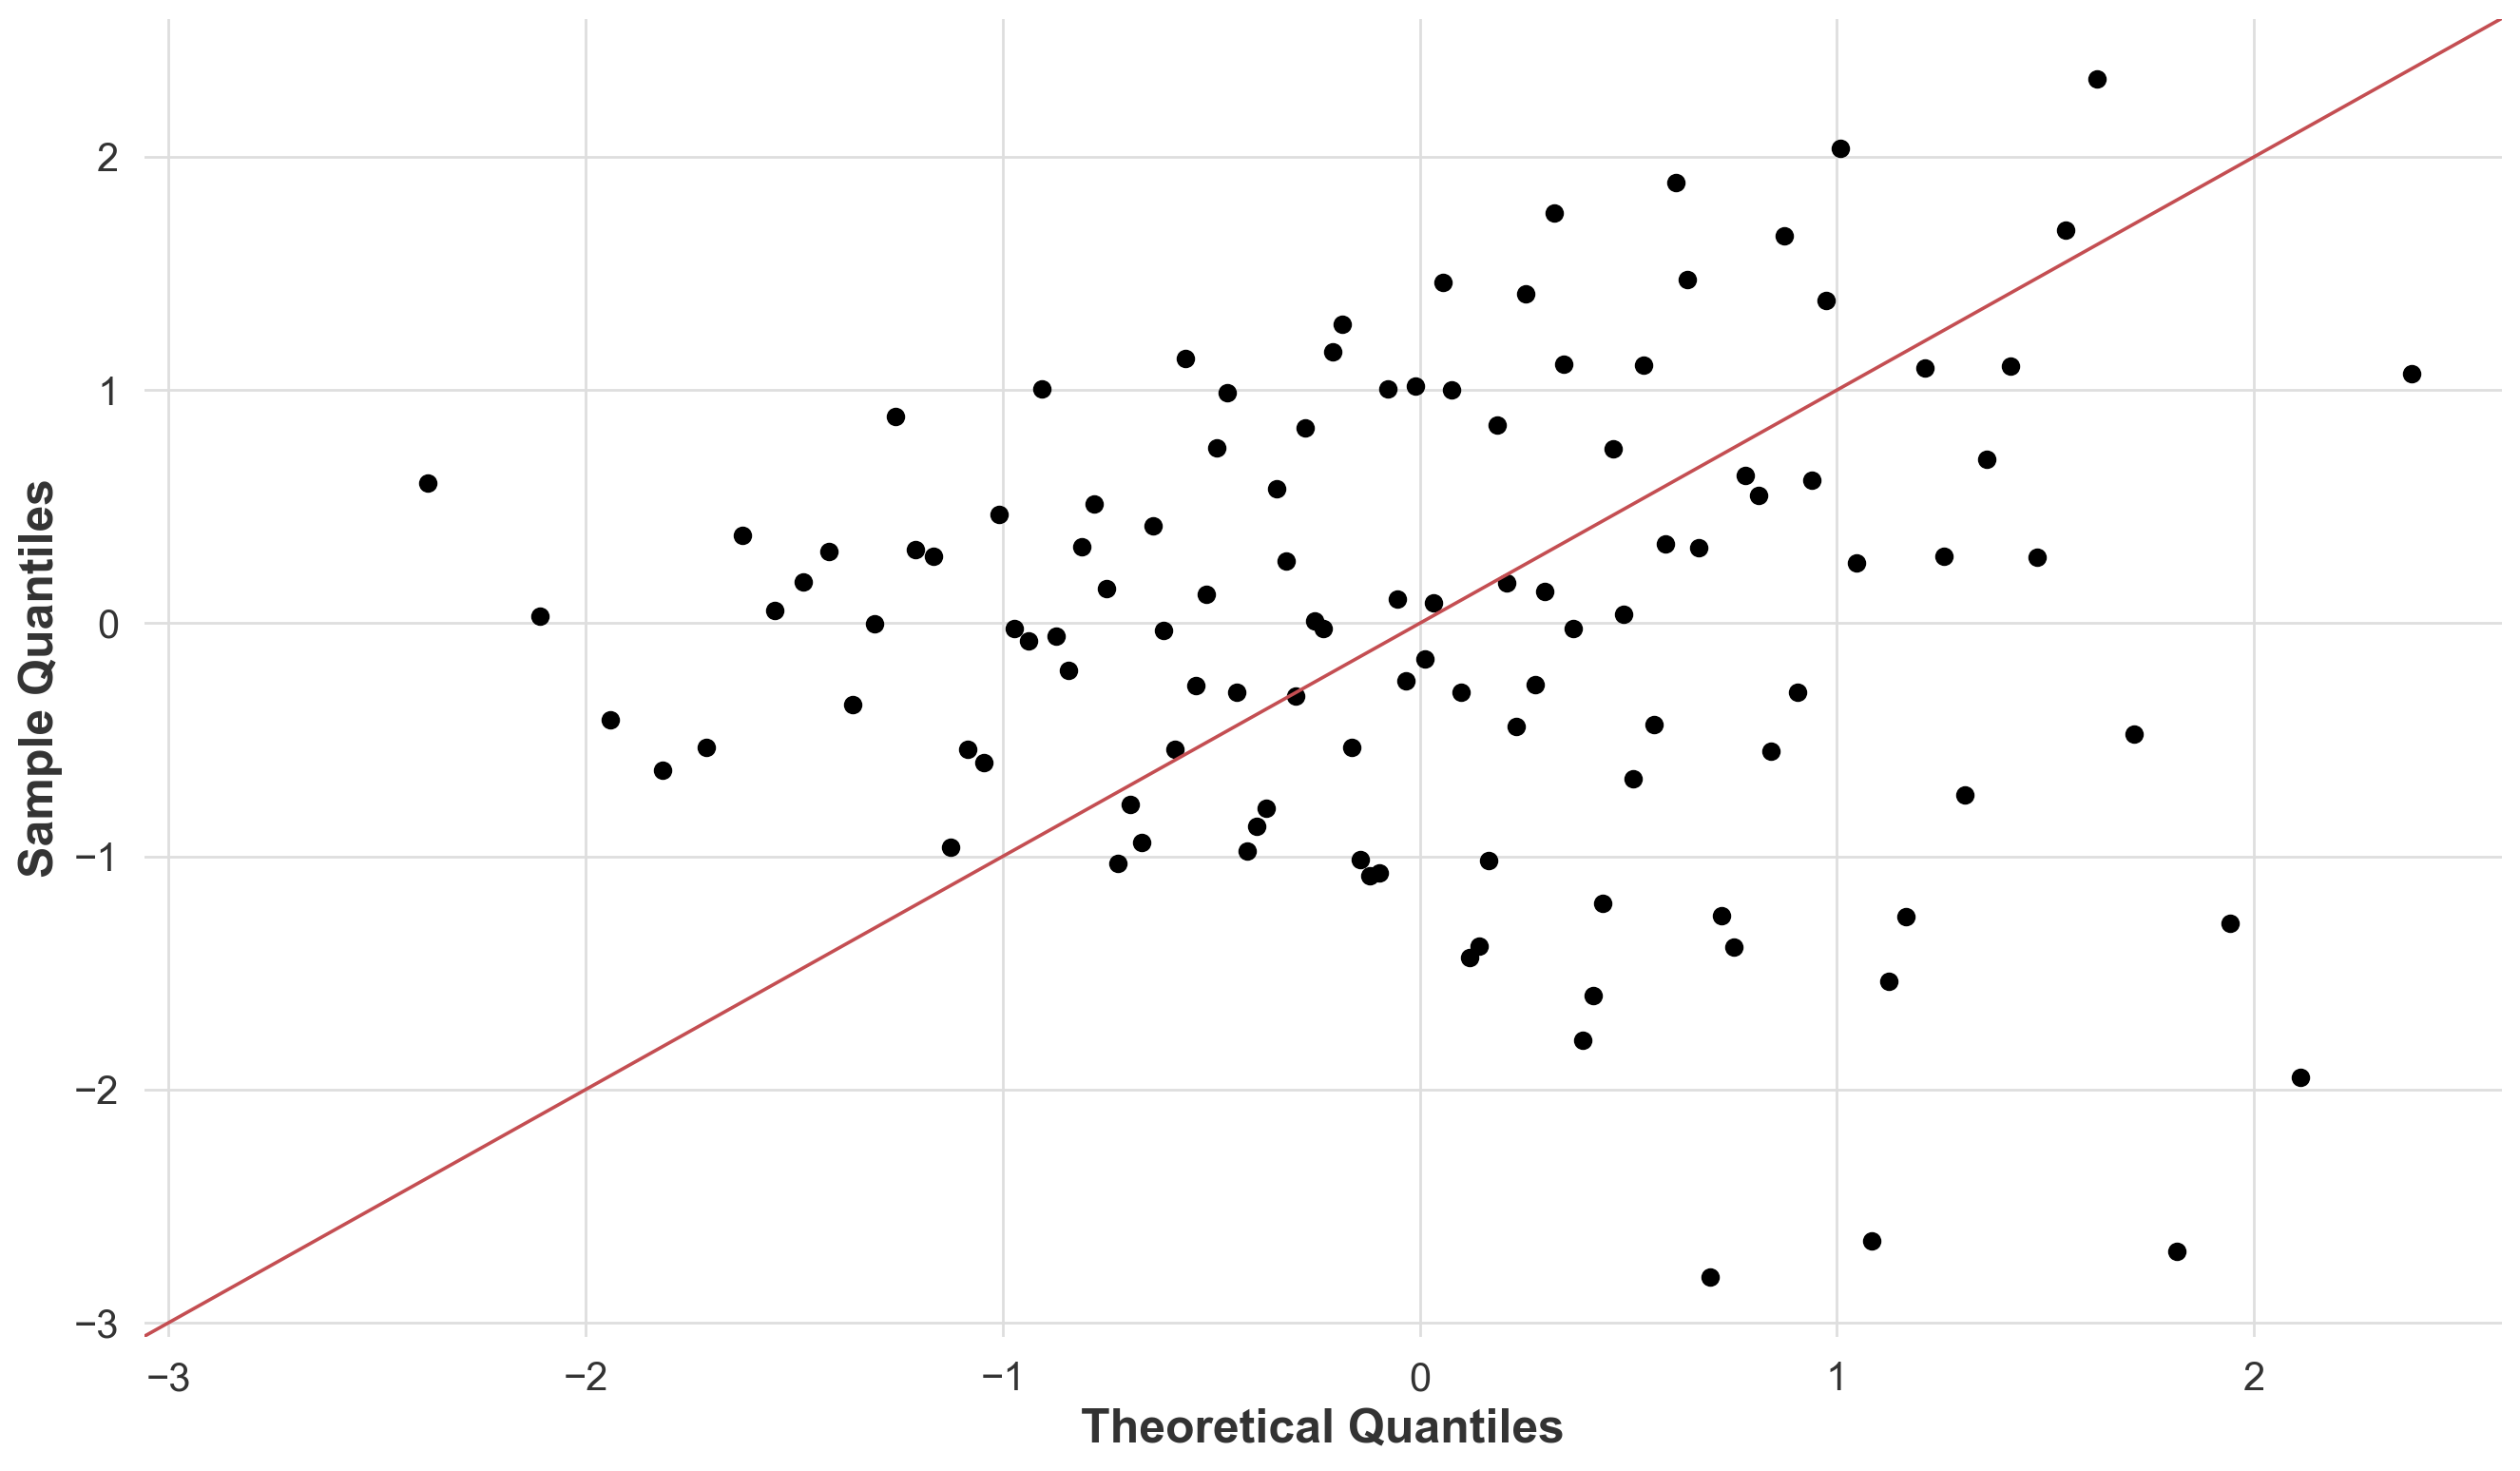

In [29]:
fig, ax = plt.subplots(figsize=(16,9))
sm.qqplot(resid.values(), ax=ax, fit=True, line="45");

In [30]:
pvalue = sts.shapiro(resid.values()).pvalue
rejected = pvalue < 0.05
print("normal" if not rejected else "not normal")

normal


In [31]:
pvalue

0.5282973647117615

In [32]:
dummy_resid = sts.norm.rvs(size=100)

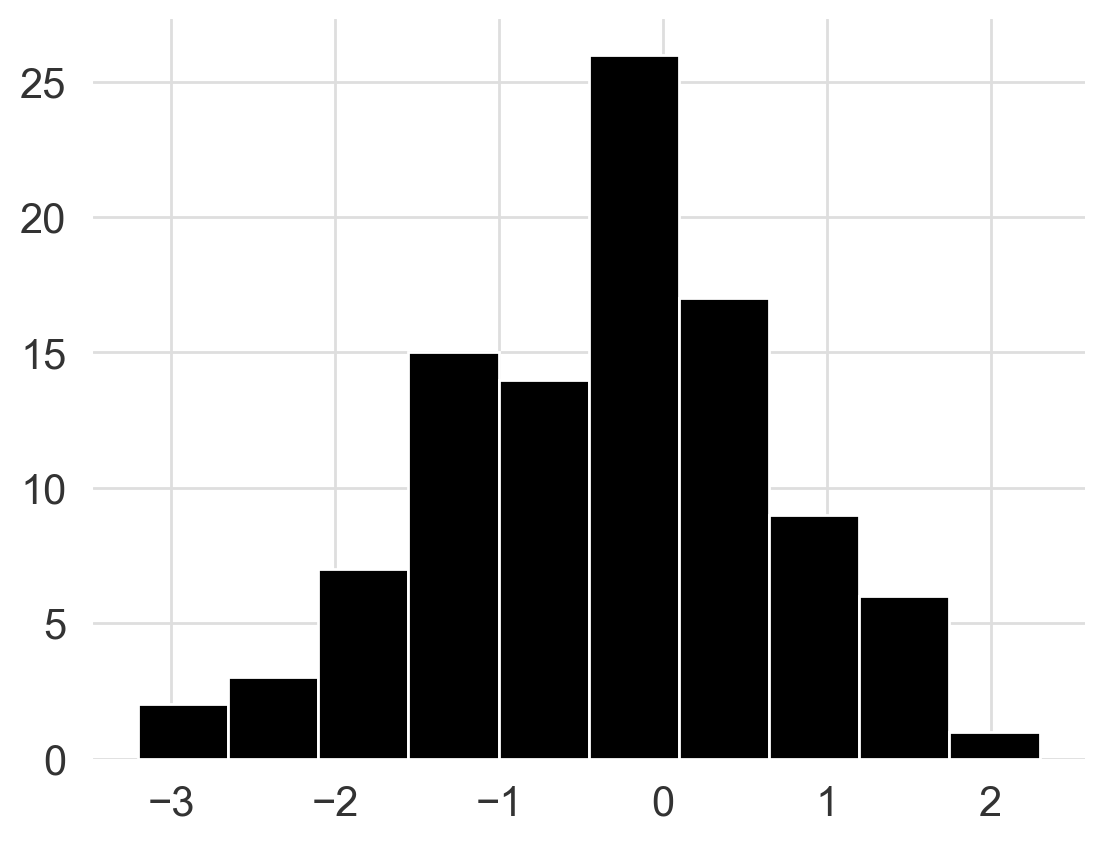

In [33]:
plt.hist(dummy_resid);

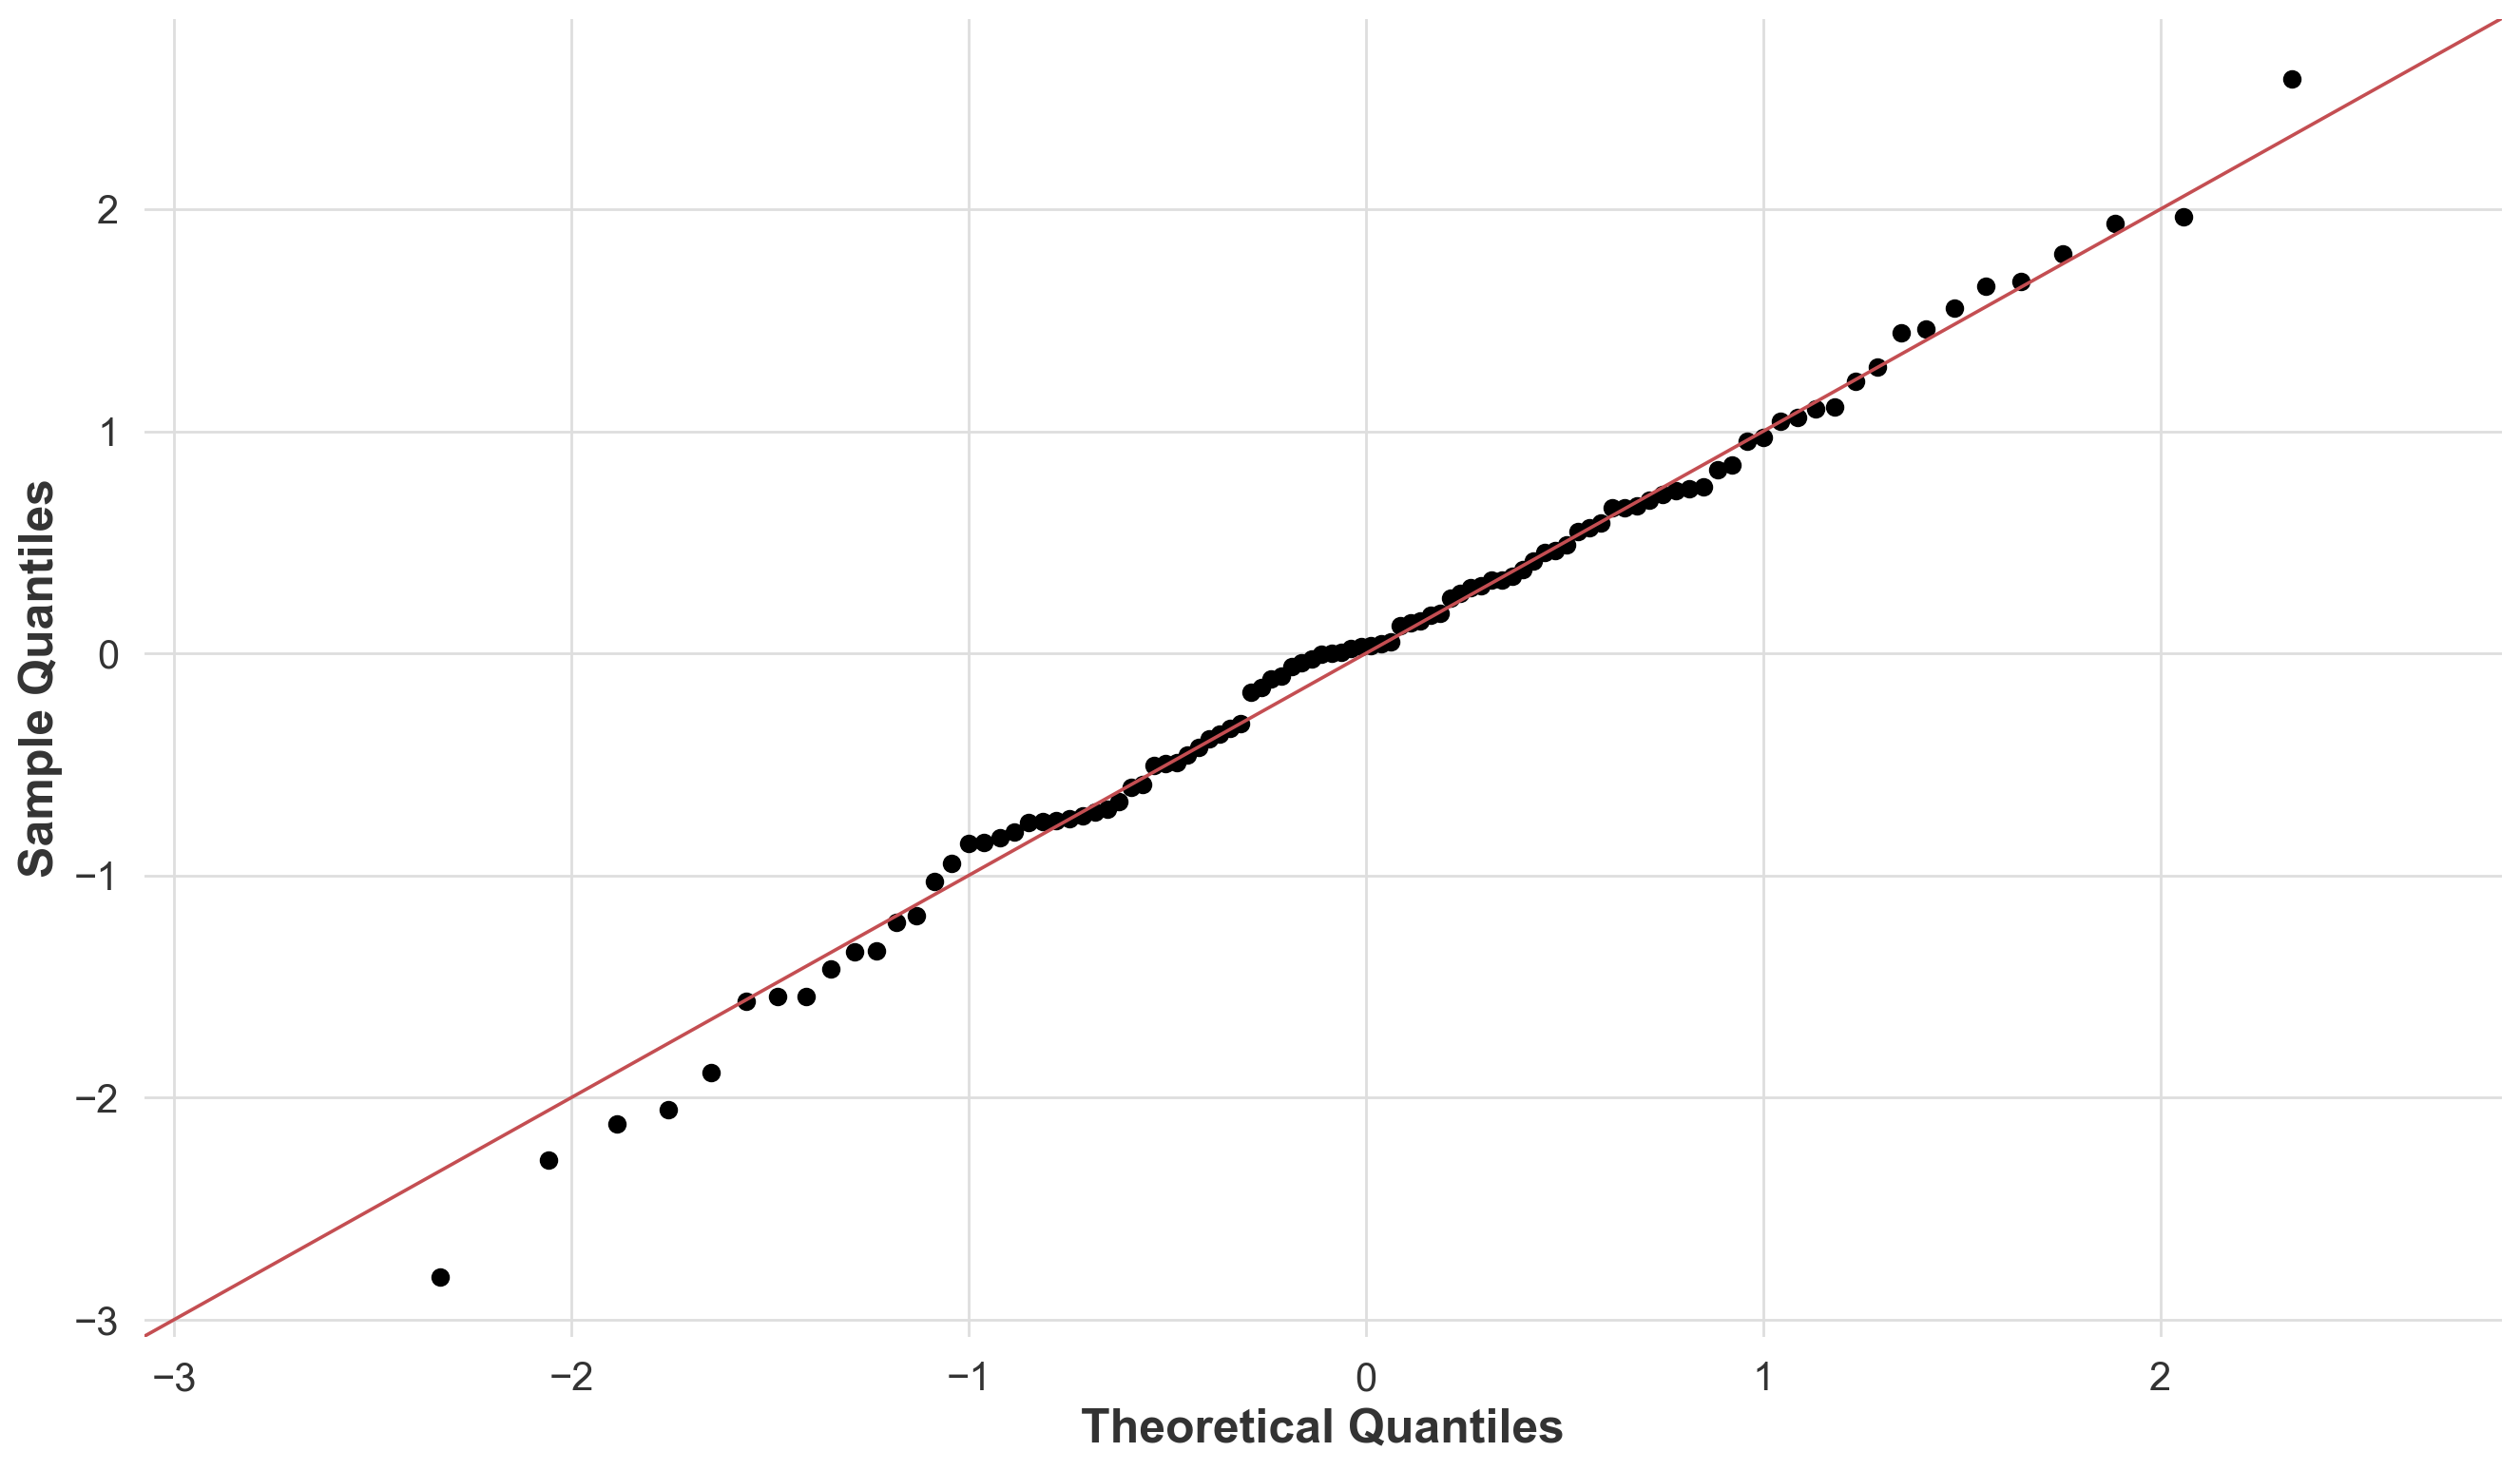

In [34]:
fig, ax = plt.subplots(figsize=(16,9))
sm.qqplot(dummy_resid, ax=ax, fit=True, line="45");

In [35]:
pvalue = sts.shapiro(dummy_resid).pvalue
rejected = pvalue < 0.05
print("normal" if not rejected else "not normal")

normal


In [36]:
pvalue

0.9637436866760254

## Desired properties of residuals: homoscedacity

In [37]:
const_model = ARIMA(p=0, d=0, q=0, seasonal_order=(0, 0, 0, 0), trend="ct")
fcast = const_model.historical_forecasts(
    air_pax, start=2, forecast_horizon=1, start_format="position", show_warnings=False
)
resid = air_pax[fcast.start_time():] - fcast

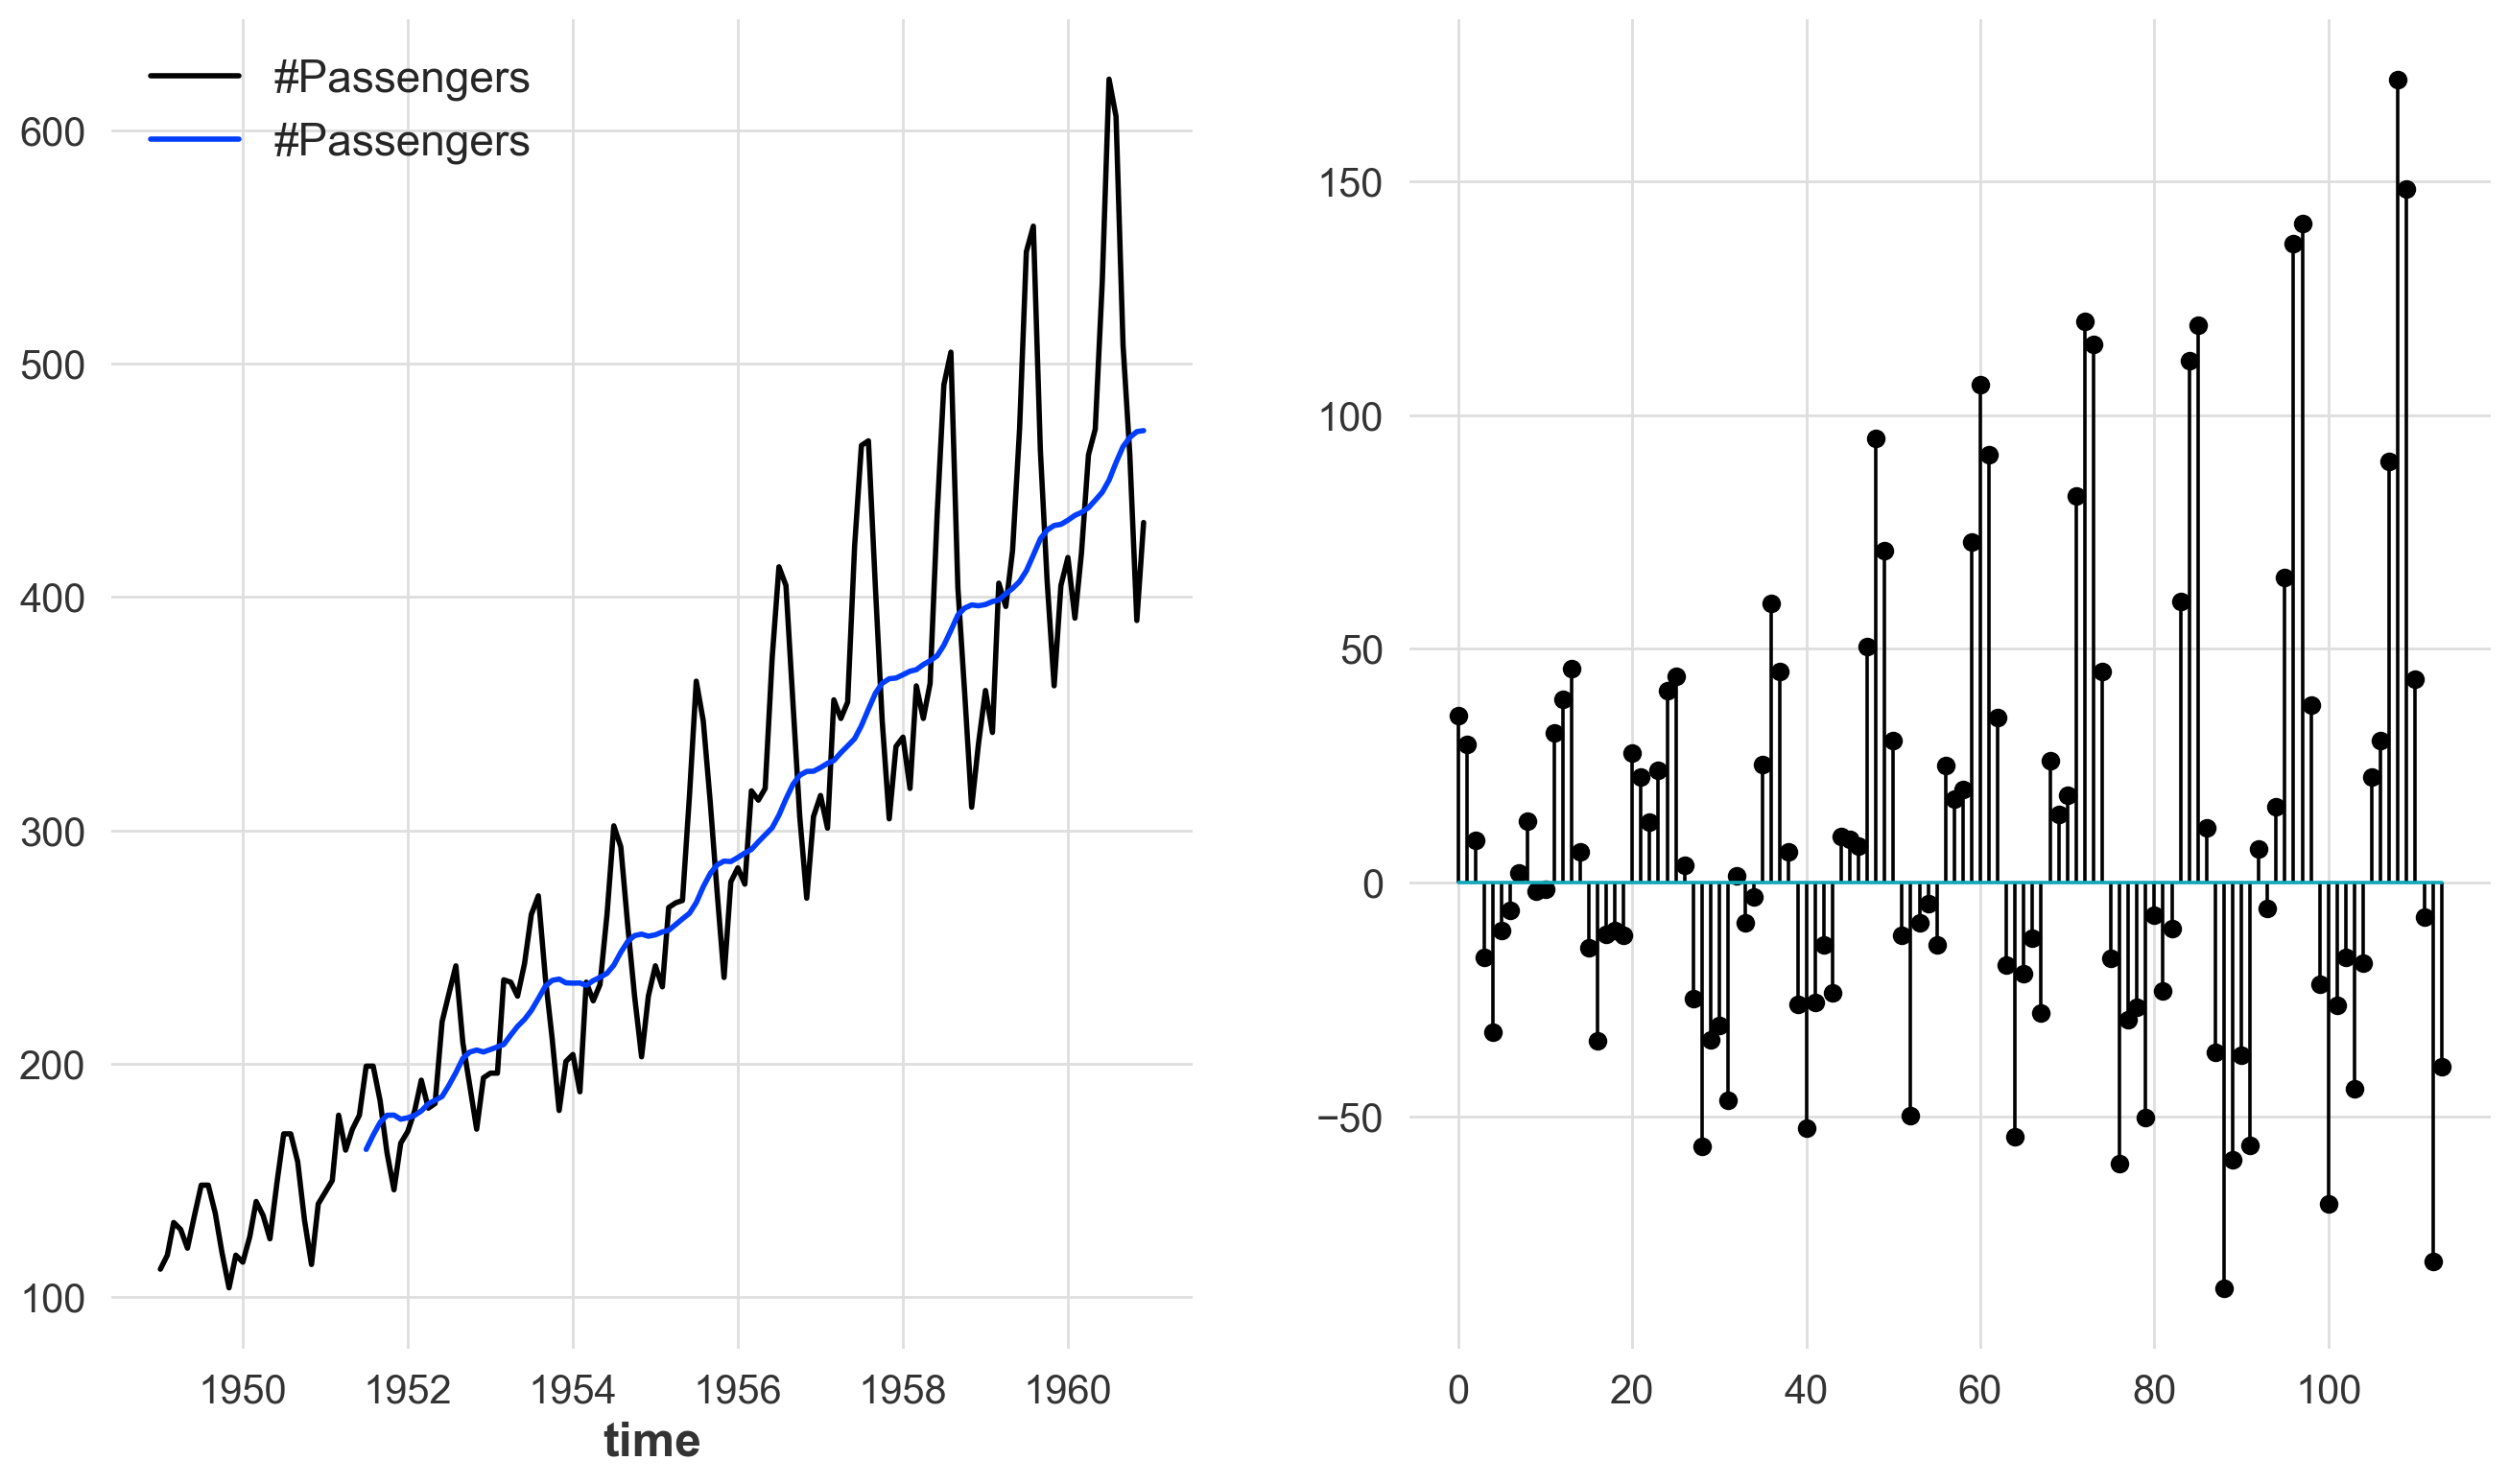

In [38]:
fig, ax = plt.subplots(1,2,figsize=(16,9))
air_pax.plot(ax=ax[0]);
fcast.plot(ax=ax[0]);
ax[1].stem(resid.values());

In [39]:
# pvalue = sm.stats.diagnostic.het_breuschpagan(resid.values(), ...).pvalue
# rejected = pvalue < 0.05
# print("normal" if not rejected else "not normal")